
### Project Objective:
The goal is to develop a robust machine learning model to predict loan default probability. This model will integrate application data, credit history, and financial behavior to generate a probability score for each applicant.

- **Deliverables**: A predictive model capable of assisting lenders in making informed decisions, reducing financial risk, and optimizing loan approval processes.
- **Key Evaluation Metrics**: AUC-ROC, Precision, Recall, and F1-Score. These metrics will provide insights into the model's ability to balance sensitivity (recall) and specificity (precision).



### Approach Summary

Due to memory constraints on my laptop, I encountered memory errors while attempting to merge the three datasets (`application_train`, `bureau`, and `credit_card`). To manage this, I will take the following approach:

1. **EDA on Individual Datasets**:
   - Perform exploratory data analysis on each dataset separately to understand the distribution of features and identify the most significant ones.

2. **Feature Extraction**:
   - Extract the most important features from each dataset based on the insights gathered from the EDA.

3. **Final Merging**:
   - Merge only the selected features into a new main dataset, reducing complexity and managing memory usage effectively.

This approach allows for thorough analysis while maintaining a practical workflow, ultimately leading to a cleaner and more efficient dataset for modeling.

In [2]:
import pandas as pd

def load_dataset(dataset_name):
    """
    Load a dataset from a CSV file into a DataFrame.

    Parameters:
    dataset_name (str): The name of the dataset to load (e.g., 'application_train', 'bureau', 'credit_card').

    Returns:
    DataFrame: A pandas DataFrame containing the loaded data.
    """
    # Construct the file path based on the dataset name
    file_path = f"{dataset_name}.csv"
    
    df = pd.read_csv(file_path)
    
    return df

application_train = load_dataset("application_train")

### Investigating Missing Data ###
Understanding the Causes of Missing Data
Before addressing missing values, it's important to understand why the data is missing. Sometimes it occurs at random, while other times it’s tied to specific patterns within the dataset, or related to the values themselves.

**Initial Approach**

Visualize the missing data to identify any clear patterns.
Check if missing data is more frequent in certain areas, which might suggest an underlying cause.
Based on what I find, I’ll decide how to handle the missing data—whether through imputation, creating new categories, or adjusting features to reflect observed patterns. This ensures that the dataset remains robust and ready for analysis without introducing unnecessary complexity.



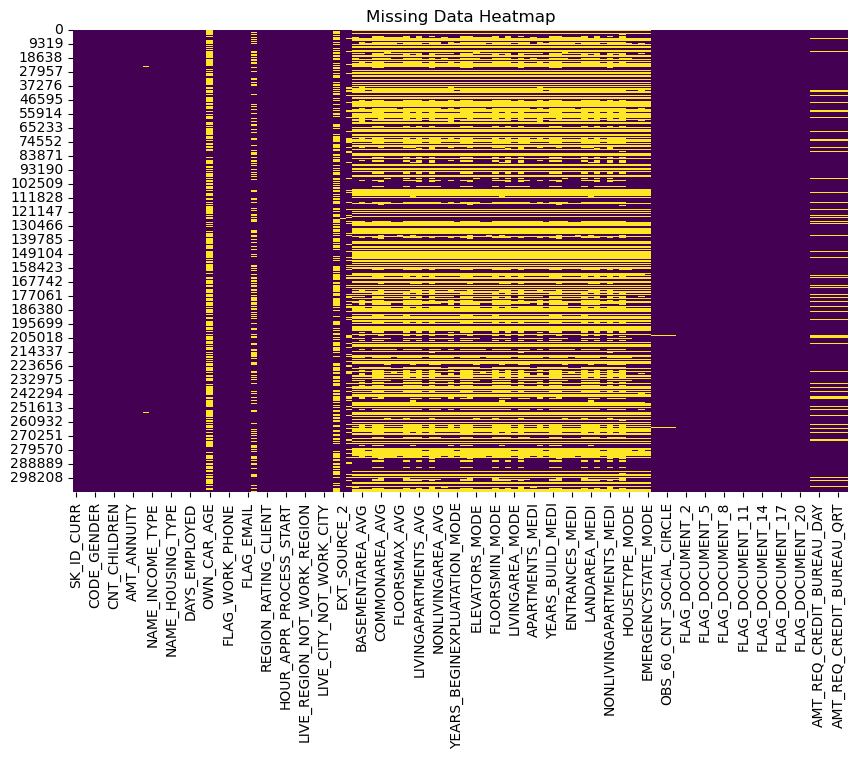

In [11]:
#missing data heat-map
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(application_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [15]:
import pandas as pd
from IPython.display import display
# Calculate the percentage of missing values for each column
missing_percentages = (application_train.isnull().sum() / len(application_train)) * 100
# Filter only columns with missing data
missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
# Convert to a DataFrame for better display control
missing_df = pd.DataFrame(missing_percentages, columns=['Missing Percentage'])
# Display the DataFrame without truncation
pd.set_option('display.max_rows', None)  # Ensures all rows are shown
display(missing_df)



Missing Percentage
COMMONAREA_MEDI                        69.872297
COMMONAREA_AVG                         69.872297
COMMONAREA_MODE                        69.872297
NONLIVINGAPARTMENTS_MEDI               69.432963
NONLIVINGAPARTMENTS_MODE               69.432963
NONLIVINGAPARTMENTS_AVG                69.432963
FONDKAPREMONT_MODE                     68.386172
LIVINGAPARTMENTS_MODE                  68.354953
LIVINGAPARTMENTS_MEDI                  68.354953
LIVINGAPARTMENTS_AVG                   68.354953
FLOORSMIN_MODE                         67.848630
FLOORSMIN_MEDI                         67.848630
FLOORSMIN_AVG                          67.848630
YEARS_BUILD_MODE                       66.497784
YEARS_BUILD_MEDI                       66.497784
YEARS_BUILD_AVG                        66.497784
OWN_CAR_AGE                            65.990810
LANDAREA_AVG                           59.376738
LANDAREA_MEDI                          59.376738
LANDAREA_MODE                          59.376738
BASEMENTAREA_MEDI                      58.515956
BASEMENTAREA_AVG                       58.515956
BASEMENTAREA_MODE                      58.515956
EXT_SOURCE_1                           56.381073
NONLIVINGAREA_MEDI                     55.179164
NONLIVINGAREA_MODE                     55.179164
NONLIVINGAREA_AVG                      55.179164
ELEVATORS_MEDI                         53.295980
ELEVATORS_MODE                         53.295980
ELEVATORS_AVG                          53.295980
WALLSMATERIAL_MODE                     50.840783
APARTMENTS_MODE                        50.749729
APARTMENTS_MEDI                        50.749729
APARTMENTS_AVG                         50.749729
ENTRANCES_MODE                         50.348768
ENTRANCES_AVG                          50.348768
ENTRANCES_MEDI                         50.348768
LIVINGAREA_MEDI                        50.193326
LIVINGAREA_MODE                        50.193326
LIVINGAREA_AVG                         50.193326
HOUSETYPE_MODE                         50.176091
FLOORSMAX_MEDI                         49.760822
FLOORSMAX_AVG                          49.760822
FLOORSMAX_MODE                         49.760822
YEARS_BEGINEXPLUATATION_AVG            48.781019
YEARS_BEGINEXPLUATATION_MEDI           48.781019
YEARS_BEGINEXPLUATATION_MODE           48.781019
TOTALAREA_MODE                         48.268517
EMERGENCYSTATE_MODE                    47.398304
OCCUPATION_TYPE                        31.345545
EXT_SOURCE_3                           19.825307
AMT_REQ_CREDIT_BUREAU_WEEK             13.501631
AMT_REQ_CREDIT_BUREAU_DAY              13.501631
AMT_REQ_CREDIT_BUREAU_MON              13.501631
AMT_REQ_CREDIT_BUREAU_QRT              13.501631
AMT_REQ_CREDIT_BUREAU_HOUR             13.501631
AMT_REQ_CREDIT_BUREAU_YEAR             13.501631
NAME_TYPE_SUITE                         0.420148
DEF_30_CNT_SOCIAL_CIRCLE                0.332021
OBS_60_CNT_SOCIAL_CIRCLE                0.332021
DEF_60_CNT_SOCIAL_CIRCLE                0.332021
OBS_30_CNT_SOCIAL_CIRCLE                0.332021
EXT_SOURCE_2                            0.214626
AMT_GOODS_PRICE                         0.090403
AMT_ANNUITY                             0.003902
CNT_FAM_MEMBERS                         0.000650
DAYS_LAST_PHONE_CHANGE                  0.000325

## Handling Missing Data

**Property Descriptors**
Many columns describing property features (e.g., median, mode of entrances, floors) have missing values due to non-applicability (e.g., most homes don’t have elevators). Rather than dropping these features, we’ll retain them by creating flag columns to show where there originally was data, and then imputing a median value. We will follow a similar approach for other data that is NMAR (Not missing at random)

**Occupation Type**
For columns like occupation type, missing values likely indicate an "unknown" category where the applicant was unwilling to specify. We'll handle this by creating a new category labeled as "unknown" to reflect these cases.(NMAR data)

**External Credit Scores**
Missing values in external credit score columns likely represent applicants without scores. To capture this, we’ll create a new feature, HAS_EXT_SOURCE, to flag these cases, and then impute missing values in the EXT_SOURCE columns with median value. (NMAR data)

**Car Ownership & Age**
For columns like own_car_age, a car ownership flag already exists (currently coded as "Y/N"). We’ll convert this flag to a binary format (1/0) to better integrate with our model.

**Mean imputing missing rows with in columns with minimal missing data (less than 2%)**
Here missing data is more likely to be MAR (Missing at Random) hence basic mean imputation is more applicable


In [33]:


### Here I'll be creating a pipeline to clean the data:

#What Happens in the Pipeline:
#Step 1: Flag missing values in important numerical columns.
#Step 2: Impute missing values based on column-specific strategies (median, 'Unknown', or 0).
#Step 3: Cap outliers in the data so scaling isn't distorted significantly by ultra wealthy loan applications
#Step 4: Scale numerical columns.
#Step 5: Handle any remaining missing values in numeric columns using the mean.
#Step 6: Handle any remaining missing values in categorical columns using the mode.
#missing data in the last two steps is data that makes up a very small % of the column, hence it's far more likely to be MAR (missing at random)


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Create a copy of the original DataFrame to ensure we don't overwrite the original data
application_train_cleaned = application_train.copy()

# Custom transformer to flag missing values
class FlagMissing(BaseEstimator, TransformerMixin):
    """
    Flags missing values by creating a new column for each feature indicating if a value is missing.
    This helps track where data was missing for future analysis.
    """
    def __init__(self, columns_to_flag):
        self.columns_to_flag = columns_to_flag
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()  # Avoid modifying original data during transformation
        for col in self.columns_to_flag:
            X[f'FLAG_{col}'] = np.where(X[col].isnull(), 0, 1)
        return X

# Custom transformer to impute missing values with specified strategies
class ImputeColumns(BaseEstimator, TransformerMixin):
    """
    Imputes missing values using different strategies:
    - Median for selected columns.
    - 'Unknown' for selected categorical columns.
    - Zero for other selected columns.
    """
    def __init__(self, median_columns=None, unknown_columns=None, zero_columns=None):
        self.median_columns = median_columns
        self.unknown_columns = unknown_columns
        self.zero_columns = zero_columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Impute with median for specified columns
        if self.median_columns:
            for col in self.median_columns:
                X[col].fillna(X[col].median(), inplace=True)
        
        # Impute with 'Unknown' for specified categorical columns
        if self.unknown_columns:
            for col in self.unknown_columns:
                X[col].fillna('Unknown', inplace=True)
        
        # Impute with 0 for specified columns
        if self.zero_columns:
            for col in self.zero_columns:
                X[col].fillna(0, inplace=True)
        
        return X

# Custom transformer to cap outliers before scaling
class CapOutliers(BaseEstimator, TransformerMixin):
    """
    Caps outliers for numerical columns by setting values below/above specified percentiles.
    This helps to prevent outliers from distorting scaling.
    """
    def __init__(self, columns_to_cap, lower_percentile=2, upper_percentile=98):
        self.columns_to_cap = columns_to_cap
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.columns_to_cap:
            lower_cap = X[col].quantile(self.lower_percentile / 100)
            upper_cap = X[col].quantile(self.upper_percentile / 100)
            X[col] = X[col].clip(lower=lower_cap, upper=upper_cap)
        return X

# Custom transformer to scale numerical columns
class ScaleNumericFeatures(BaseEstimator, TransformerMixin):
    """
    Scales numerical features using StandardScaler.
    This ensures that all features are on a similar scale, which helps models converge faster.
    """
    def __init__(self, columns_to_scale):
        self.columns_to_scale = columns_to_scale
        self.scaler = StandardScaler()
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns_to_scale])
        return self
    
    def transform(self, X):
        X = X.copy()
        X[self.columns_to_scale] = self.scaler.transform(X[self.columns_to_scale])
        return X

# Custom transformer to impute remaining missing values with mean for numeric columns
class ImputeWithMean(BaseEstimator, TransformerMixin):
    """
    Imputes missing values for numeric columns using the mean of each column.
    This is useful for handling the last few missing values in numeric columns.
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in X.select_dtypes(include=['float64', 'int64']).columns:
            if X[col].isnull().sum() > 0:
                X[col].fillna(X[col].mean(), inplace=True)
        return X

# Custom transformer to impute remaining missing values with mode for non-numeric columns
class ImputeWithMode(BaseEstimator, TransformerMixin):
    """
    Imputes missing values for non-numeric columns using the most frequent value (mode).
    This is useful for categorical data.
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in X.select_dtypes(exclude=['float64', 'int64']).columns:
            if X[col].isnull().sum() > 0:
                X[col].fillna(X[col].mode()[0], inplace=True)
        return X

# Column lists (based on your provided info)
continuous_numerical_cols = ['ELEVATORS_AVG', 'FLOORSMAX_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 
                             'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 
                             'COMMONAREA_AVG', 'APARTMENTS_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 
                             'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
                             'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
median_columns = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                  'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE']
unknown_columns = ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']
zero_columns = [col for col in application_train_cleaned.columns if col.startswith('AMT_REQ_CREDIT_BUREAU')]

# Create the pipeline that chains all the transformations together
application_pipeline = Pipeline(steps=[
    ('flag_missing', FlagMissing(columns_to_flag=continuous_numerical_cols)),
    ('impute', ImputeColumns(median_columns=median_columns, 
                             unknown_columns=unknown_columns, 
                             zero_columns=zero_columns)),
    ('cap_outliers', CapOutliers(columns_to_cap=continuous_numerical_cols)),  # Cap outliers
    ('scale', ScaleNumericFeatures(columns_to_scale=continuous_numerical_cols)),
    ('mean_impute', ImputeWithMean()),   # Impute remaining numeric columns with mean
    ('mode_impute', ImputeWithMode())    # Impute remaining non-numeric columns with mode
])

# Fit and transform the original dataframe, while modifying it in place
application_train_cleaned = application_pipeline.fit_transform(application_train_cleaned)

# Check the result for any remaining missing values and inspect the first few rows
print(application_train_cleaned.isnull().sum())  # Check for remaining missing values
print(application_train_cleaned.head())          # Check the processed data


SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                         0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

## Analysis of Categorical Features in application_train

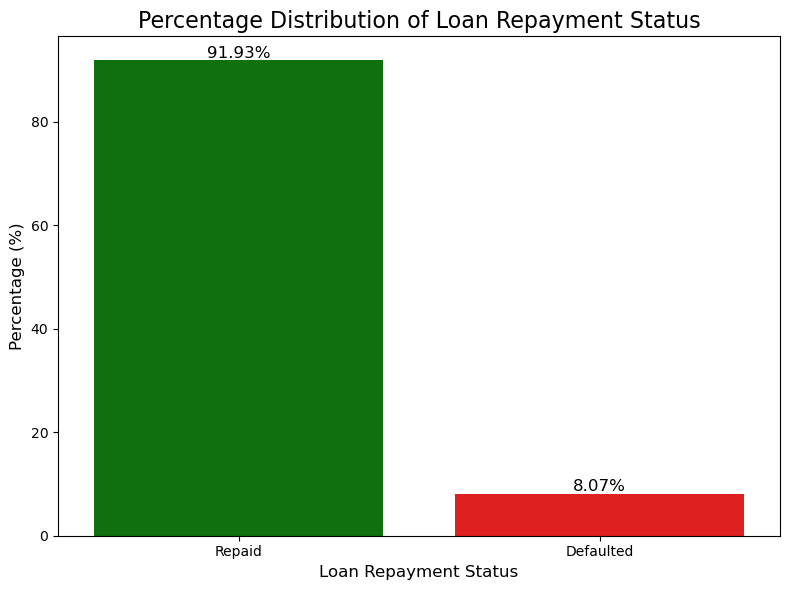

In [8]:
# Modify the bar plot with custom labels and colors
target_labels = ['Repaid', 'Defaulted']
target_colors = ['green', 'red']
# Calculate the percentage distribution of the TARGET variable
target_counts = application_train['TARGET'].value_counts(normalize=True) * 100
target_percentage = target_counts.sort_index()


# Create a seaborn bar plot for the percentage distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_percentage.index, y=target_percentage.values, palette=target_colors)

# Add titles and labels for better clarity
plt.title('Percentage Distribution of Loan Repayment Status', fontsize=16)
plt.xlabel('Loan Repayment Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=target_labels)

# Add percentage labels on top of the bars
for i, v in enumerate(target_percentage.values):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


## Handling an imbalanced dataset ##
In this project, the target variable—whether a client defaults on their loan—is highly imbalanced, with significantly fewer defaults compared to non-defaults. This imbalance can skew the performance of the model, leading it to favor predicting non-defaults since they make up the majority of the data. To address this, we will employ several techniques. First, we will utilize resampling methods such as oversampling the minority class (loan defaults) and/or undersampling the majority class (non-defaults) to balance the data distribution. Additionally, we will explore using models that support class weighting, where misclassifying the minority class (defaults) is penalized more heavily than the majority class. To evaluate model performance, we will avoid relying solely on accuracy and instead focus on metrics like Precision, Recall, F1-Score, and the ROC-AUC curve, which provide better insight into how well the model predicts defaults. This combination of methods will help ensure our model performs well in identifying clients at risk of defaulting, despite the imbalance in the dataset.





NAME_CONTRACT_TYPE
Cash loans         84939
Revolving loans     9460
Name: count, dtype: int64


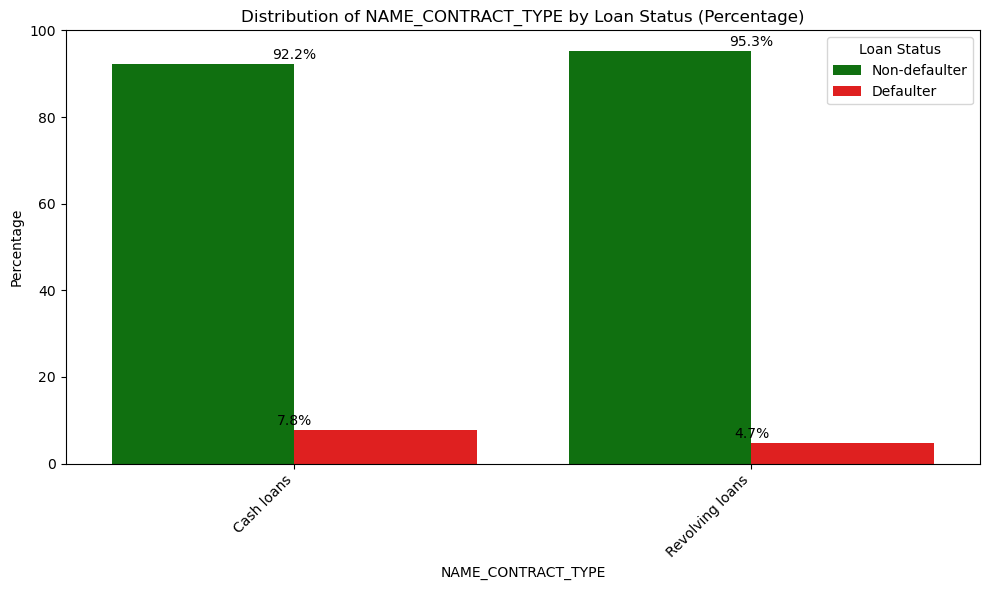

Chi-square Test for NAME_CONTRACT_TYPE:
Chi2 statistic: 115.5843, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (NAME_CONTRACT_TYPE).




CODE_GENDER
M    55074
F    39325
Name: count, dtype: int64


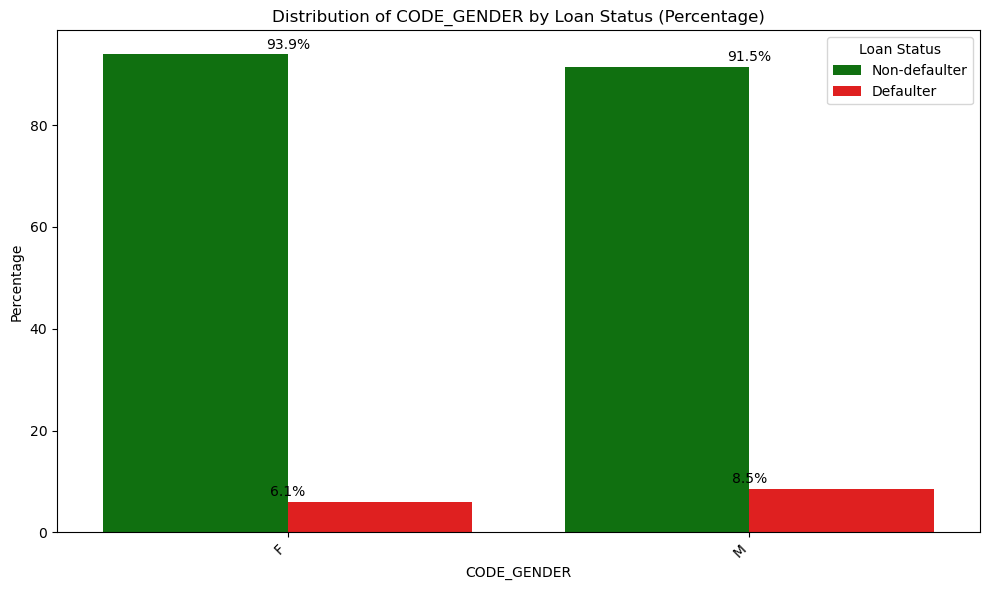

Chi-square Test for CODE_GENDER:
Chi2 statistic: 204.1565, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (CODE_GENDER).




FLAG_OWN_CAR
Y    94399
Name: count, dtype: int64


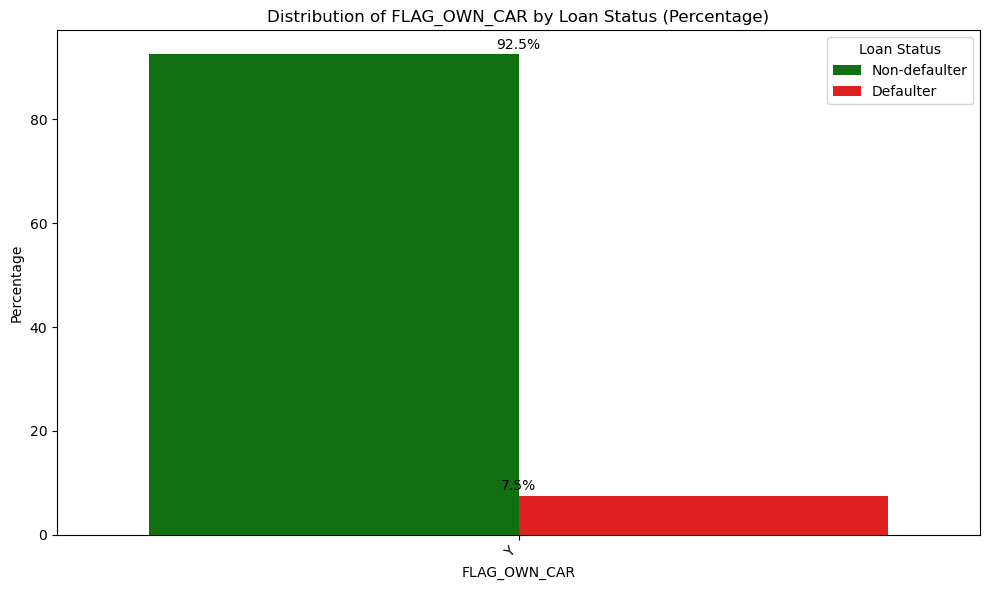

Chi-square Test for FLAG_OWN_CAR:
Chi2 statistic: 0.0000, p-value: 1.0000, Degrees of freedom: 0
No significant difference between defaulters and non-defaulters for this variable (FLAG_OWN_CAR).




FLAG_OWN_REALTY
Y    64619
N    29780
Name: count, dtype: int64


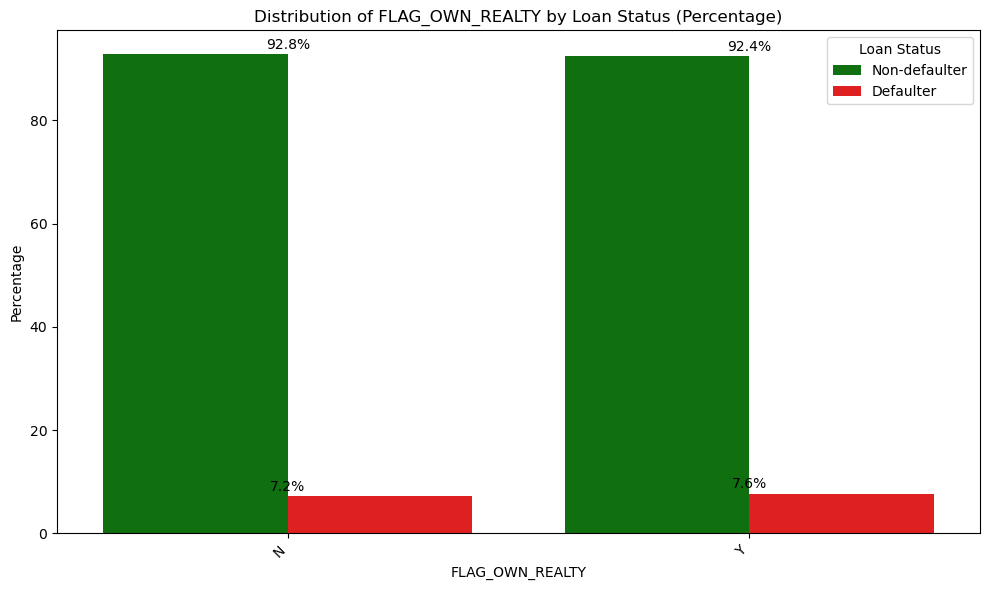

Chi-square Test for FLAG_OWN_REALTY:
Chi2 statistic: 5.1031, p-value: 0.0239, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_OWN_REALTY).




NAME_TYPE_SUITE
Unaccompanied      76272
Family             12070
Spouse, partner     4255
Children             657
Other_B              444
Unknown              374
Other_A              251
Group of people       76
Name: count, dtype: int64


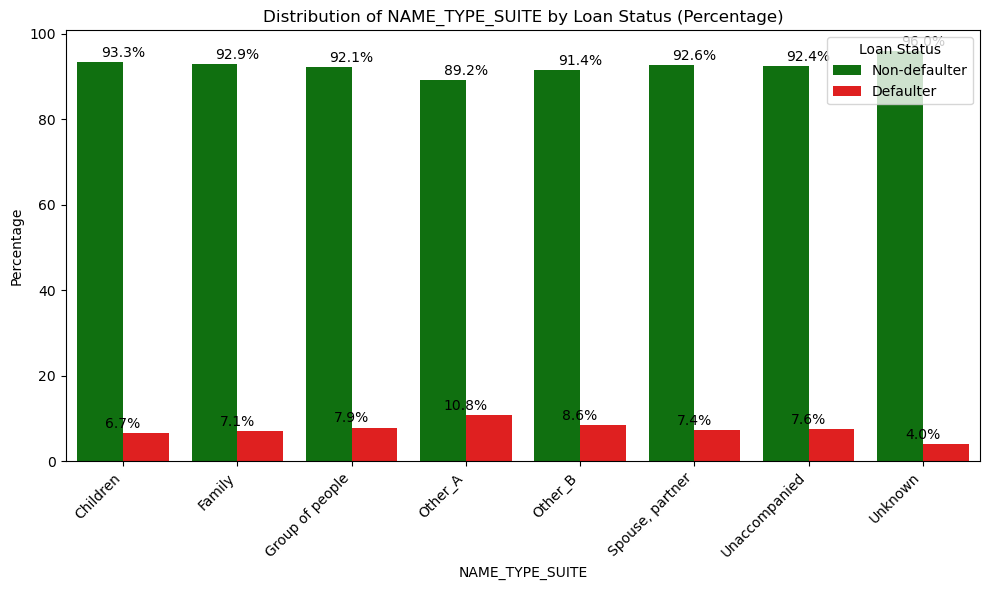

Chi-square Test for NAME_TYPE_SUITE:
Chi2 statistic: 14.7270, p-value: 0.0397, Degrees of freedom: 7
There is a significant difference between defaulters and non-defaulters for this variable (NAME_TYPE_SUITE).




NAME_INCOME_TYPE
Working                 58896
Commercial associate    28037
State servant            7459
Unemployed                  7
Name: count, dtype: int64


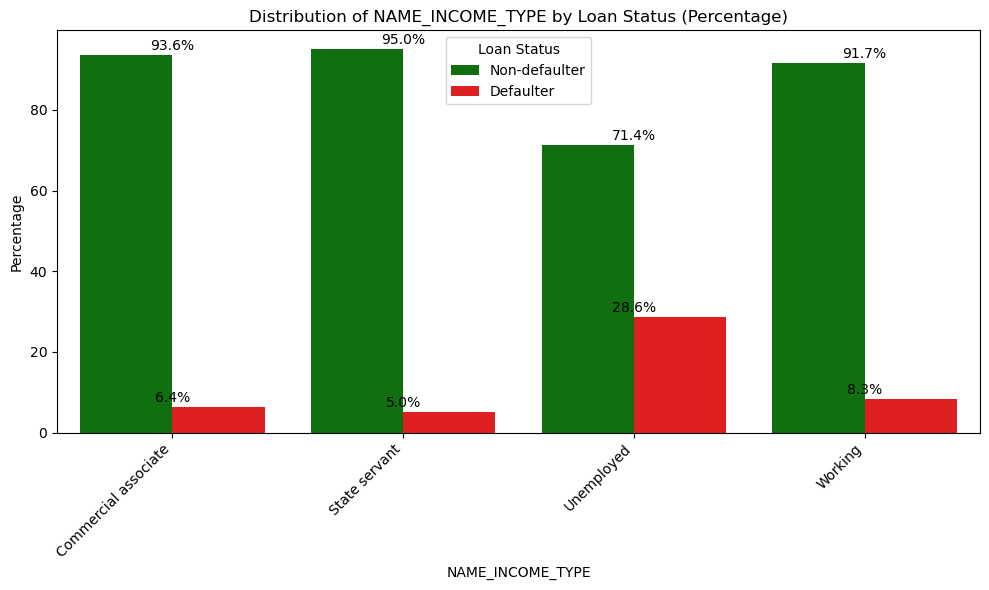

Chi-square Test for NAME_INCOME_TYPE:
Chi2 statistic: 180.4314, p-value: 0.0000, Degrees of freedom: 3
There is a significant difference between defaulters and non-defaulters for this variable (NAME_INCOME_TYPE).




NAME_EDUCATION_TYPE
Secondary / secondary special    60819
Higher education                 29046
Incomplete higher                 3734
Lower secondary                    748
Academic degree                     52
Name: count, dtype: int64


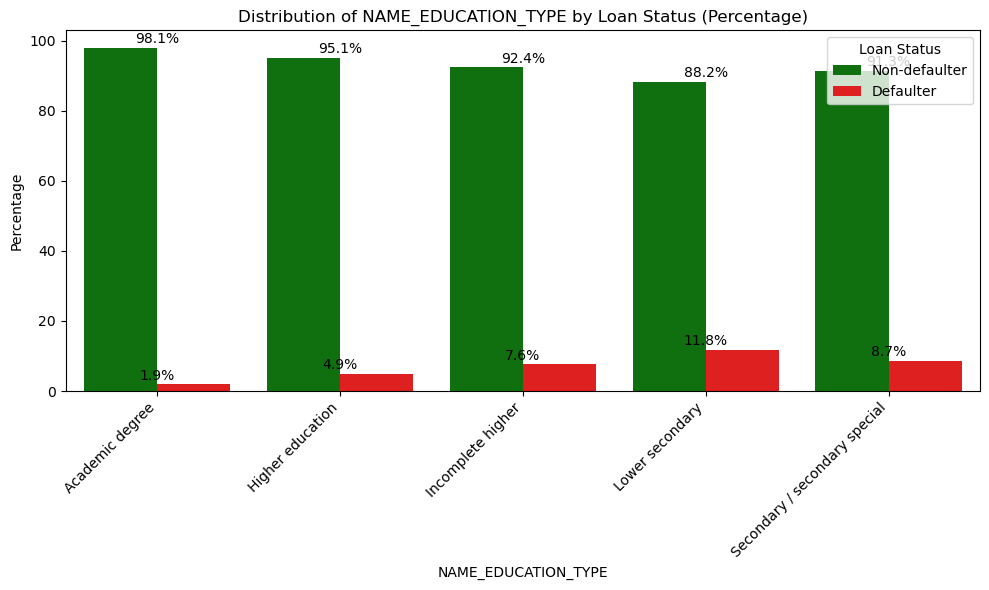

Chi-square Test for NAME_EDUCATION_TYPE:
Chi2 statistic: 431.2327, p-value: 0.0000, Degrees of freedom: 4
There is a significant difference between defaulters and non-defaulters for this variable (NAME_EDUCATION_TYPE).




NAME_FAMILY_STATUS
Married                 69364
Single / not married    11559
Civil marriage           8219
Separated                4202
Widow                    1055
Name: count, dtype: int64


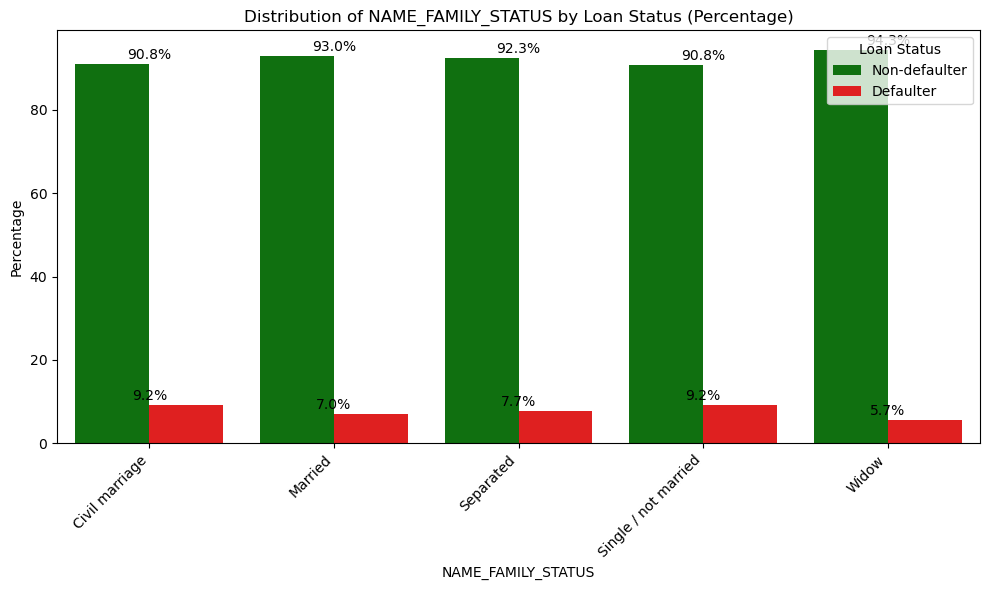

Chi-square Test for NAME_FAMILY_STATUS:
Chi2 statistic: 109.5733, p-value: 0.0000, Degrees of freedom: 4
There is a significant difference between defaulters and non-defaulters for this variable (NAME_FAMILY_STATUS).




NAME_HOUSING_TYPE
House / apartment      83815
With parents            5200
Municipal apartment     2544
Rented apartment        1469
Office apartment         935
Co-op apartment          436
Name: count, dtype: int64


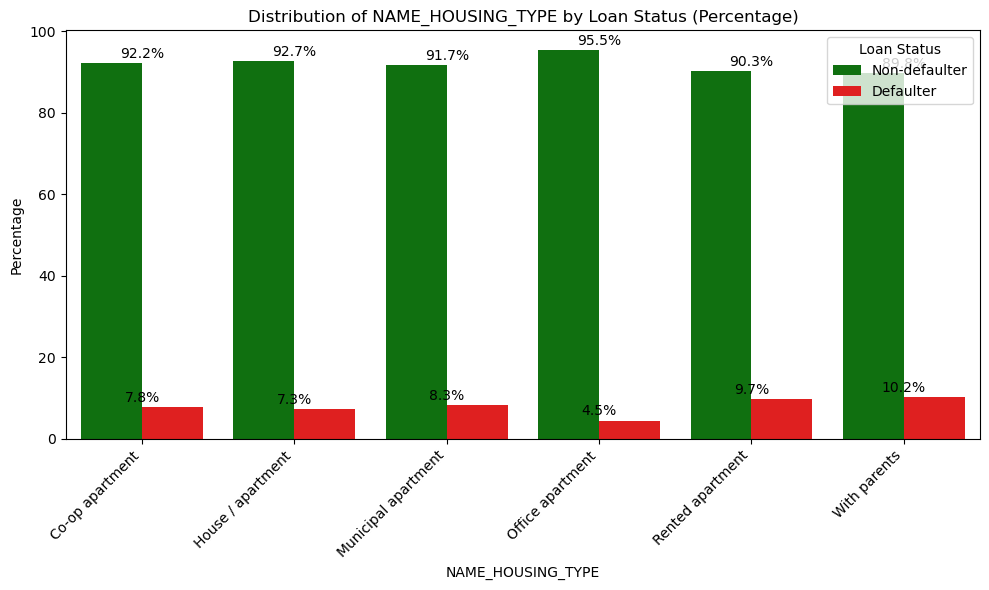

Chi-square Test for NAME_HOUSING_TYPE:
Chi2 statistic: 83.7287, p-value: 0.0000, Degrees of freedom: 5
There is a significant difference between defaulters and non-defaulters for this variable (NAME_HOUSING_TYPE).




OCCUPATION_TYPE
Laborers                 21694
Unknown                  14235
Drivers                  12798
Managers                 11172
Core staff                8977
Sales staff               8624
High skill tech staff     4409
Accountants               3438
Security staff            2638
Medicine staff            1907
Cooking staff             1177
Private service staff      774
Low-skill Laborers         644
Cleaning staff             632
Secretaries                338
Waiters/barmen staff       273
Realty agents              252
IT staff                   230
HR staff                   187
Name: count, dtype: int64


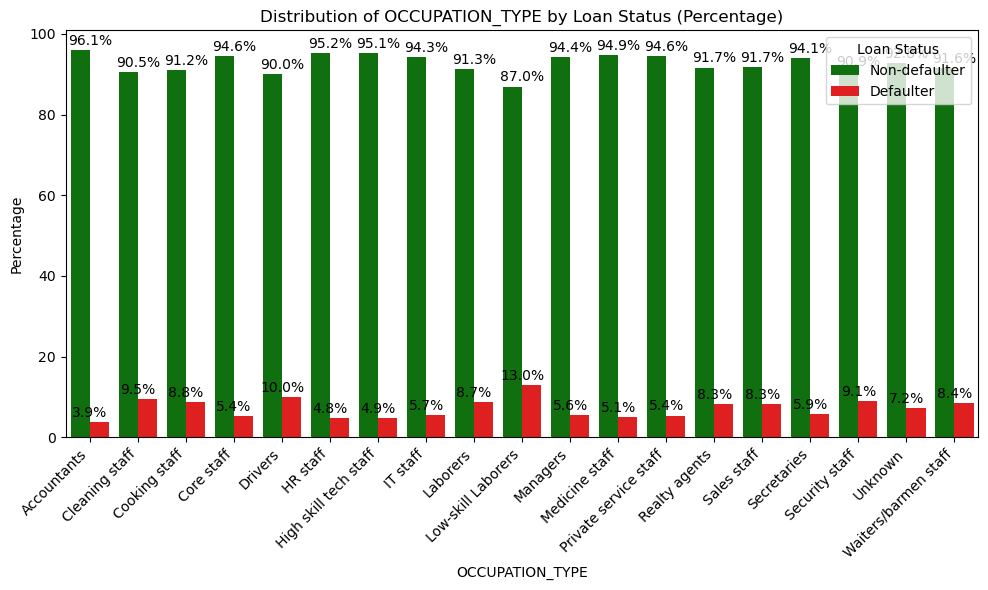

Chi-square Test for OCCUPATION_TYPE:
Chi2 statistic: 463.7916, p-value: 0.0000, Degrees of freedom: 18
There is a significant difference between defaulters and non-defaulters for this variable (OCCUPATION_TYPE).




WEEKDAY_APPR_PROCESS_START
TUESDAY      16411
WEDNESDAY    16002
MONDAY       15675
THURSDAY     15665
FRIDAY       15289
SATURDAY     10273
SUNDAY        5084
Name: count, dtype: int64


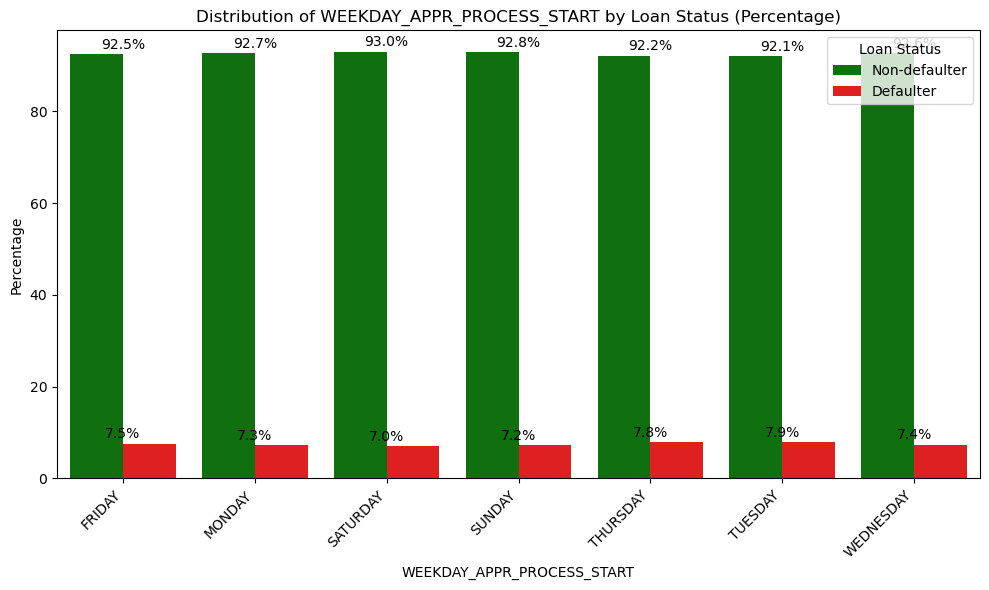

Chi-square Test for WEEKDAY_APPR_PROCESS_START:
Chi2 statistic: 12.1027, p-value: 0.0597, Degrees of freedom: 6
No significant difference between defaulters and non-defaulters for this variable (WEEKDAY_APPR_PROCESS_START).




ORGANIZATION_TYPE
Business Entity Type 3    27453
Other                     16524
Self-employed             14488
Business Entity Type 2     3934
Government                 3555
Construction               3275
Medicine                   2920
Transport: type 4          2788
Trade: type 7              2571
School                     2422
Business Entity Type 1     2203
Industry: type 9           1697
Kindergarten               1476
Security                   1418
Military                   1311
Housing                    1141
Police                     1129
Trade: type 3              1048
Industry: type 3           1032
Transport: type 2          1010
Agriculture                1004
Name: count, dtype: int64


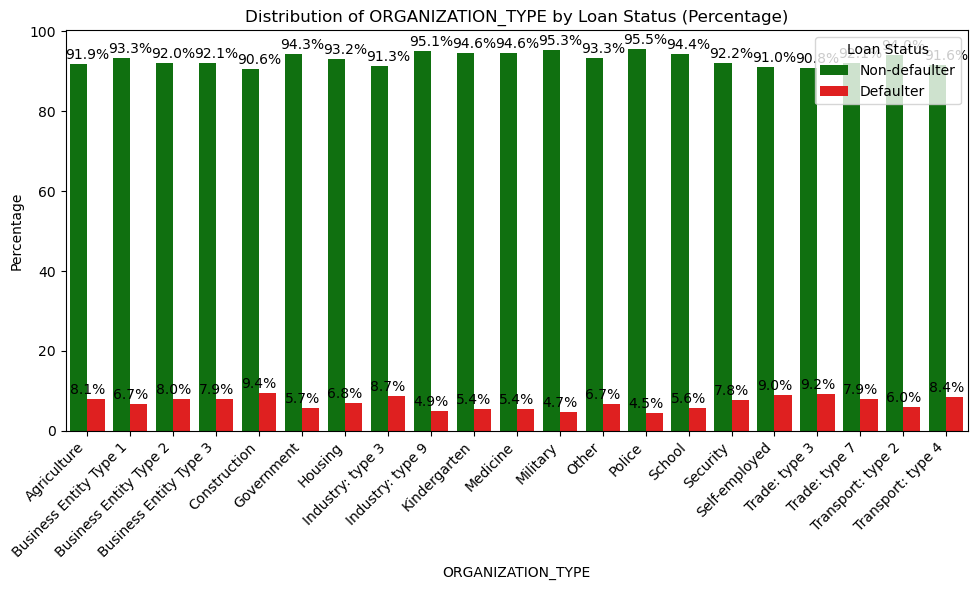

Chi-square Test for ORGANIZATION_TYPE:
Chi2 statistic: 207.3344, p-value: 0.0000, Degrees of freedom: 20
There is a significant difference between defaulters and non-defaulters for this variable (ORGANIZATION_TYPE).


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency




def plot_categorical_distribution(df, column_name, target='TARGET'):
    """Plots the distribution of a categorical feature against the target variable with percentages."""
    print("\n" * 3)
    print(application_train_cleaned[column_name].value_counts())
    # Create a normalized crosstab to calculate the percentages
    percentages = (
        pd.crosstab(df[column_name], df[target], normalize='index') * 100
    )
    # Reshape the data for plotting
    percentages = percentages.reset_index().melt(
        id_vars=column_name, 
        value_vars=[0, 1], 
        var_name='Loan Status', 
        value_name='Percentage'
    )
    
    # Map the values for better readability
    percentages['Loan Status'] = percentages['Loan Status'].map({0: 'Non-defaulter', 1: 'Defaulter'})
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=column_name, 
        y='Percentage', 
        hue='Loan Status', 
        data=percentages, 
        palette={'Non-defaulter': 'green', 'Defaulter': 'red'}
    )
    
    # Add percentages on top of the bars
    for index, row in percentages.iterrows():
        plt.text(
            x=index % len(percentages[column_name].unique()), 
            y=row['Percentage'] + 0.5,  # Adjust for better visibility
            s=f"{row['Percentage']:.1f}%", 
            ha='center', 
            va='bottom'
        )
    
    plt.title(f'Distribution of {column_name} by Loan Status (Percentage)')
    plt.xlabel(column_name)
    plt.ylabel('Percentage')
    plt.legend(title='Loan Status')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def chi_square_test(df, column_name, target='TARGET'):
    """Performs a chi-square test of independence between a categorical feature and the target."""
    # Create a contingency table
    contingency_table = pd.crosstab(df[column_name], df[target])
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Display the results
    print(f'Chi-square Test for {column_name}:')
    print(f'Chi2 statistic: {chi2:.4f}, p-value: {p:.4f}, Degrees of freedom: {dof}')
    
    if p < 0.05:
        print(f"There is a significant difference between defaulters and non-defaulters for this variable ({column_name}).")
    else:
        print(f"No significant difference between defaulters and non-defaulters for this variable ({column_name}).")



def categorical_analysis(df, column_name, target='TARGET'):
    plot_categorical_distribution(df, column_name, target)
    chi_square_test(df, column_name, target )


# Drop rows where CODE_GENDER is "XNA" in the cleaned DataFrame
application_train_cleaned = application_train_cleaned[application_train_cleaned['CODE_GENDER'] != 'XNA']



income_types_to_drop = ['Businessman', 'Student', 'Pensioner', 'Maternity leave'] # dropped due to very low value counts 1-8
# Drop rows where NAME_INCOME_TYPE is in the specified list
application_train_cleaned = application_train_cleaned[
    ~application_train_cleaned['NAME_INCOME_TYPE'].isin(income_types_to_drop)
]

organization_counts = application_train_cleaned['ORGANIZATION_TYPE'].value_counts()
organizations_to_replace = organization_counts[organization_counts < 1000].index
# Replace the identified values with 'Other'
application_train_cleaned['ORGANIZATION_TYPE'] = application_train_cleaned['ORGANIZATION_TYPE'].replace(organizations_to_replace, 'Other')


for col in categorical_columns:
    categorical_analysis(application_train_cleaned,col)






OCCUPATION_TYPE
Laborers                 21694
Unknown                  14235
Drivers                  12798
Managers                 11172
Core staff                8977
Sales staff               8624
High skill tech staff     4409
Accountants               3438
Security staff            2638
Medicine staff            1907
Cooking staff             1177
Private service staff      774
Low-skill Laborers         644
Cleaning staff             632
Secretaries                338
Waiters/barmen staff       273
Realty agents              252
IT staff                   230
HR staff                   187
Name: count, dtype: int64


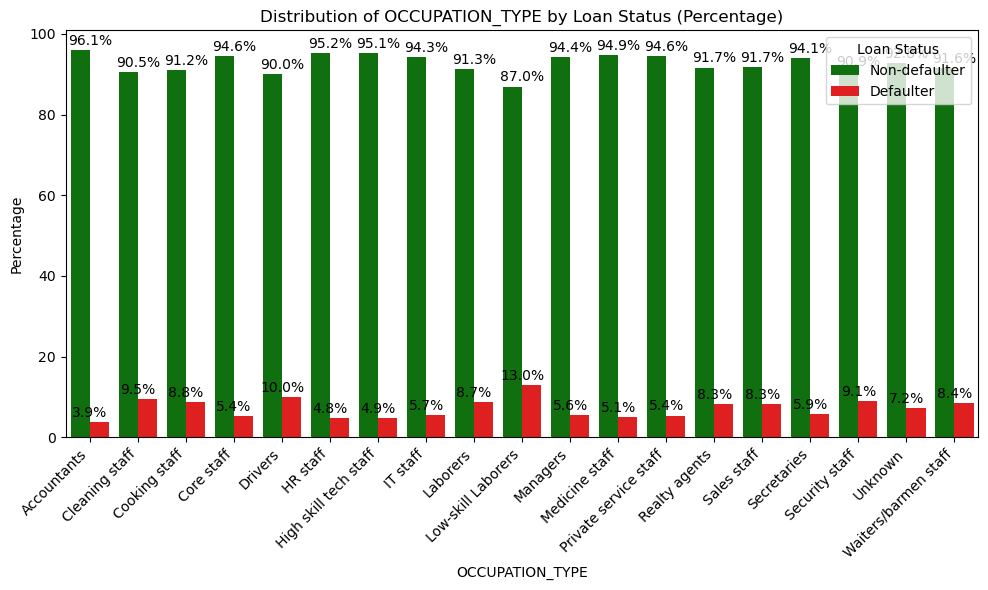

Chi-square Test for OCCUPATION_TYPE:
Chi2 statistic: 463.7916, p-value: 0.0000, Degrees of freedom: 18
There is a significant difference between defaulters and non-defaulters for this variable (OCCUPATION_TYPE).


In [11]:
categorical_analysis(application_train_cleaned, "OCCUPATION_TYPE")

### Summary of Categorical variables in relation to target

#### Significant Differences:
- **NAME_CONTRACT_TYPE**: Significant difference (p-value: 0.0000). Certain contract types are more associated with default risk.
- **CODE_GENDER**: Significant difference (p-value: 0.0000). Gender correlates with varying default rates, possibly due to different financial behaviors.
- **FLAG_OWN_REALTY**: Significant difference (p-value: 0.0249). Real estate ownership slightly influences default risk.
- **NAME_TYPE_SUITE**: Significant difference (p-value: 0.0401). Relationship may reflect social support's impact on financial stability.
- **NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, ORGANIZATION_TYPE**: Highly significant (p-value: 0.0000). These reflect socio-economic factors impacting default risk, such as income stability and job security.

#### Not Significant Differences:
- **FLAG_OWN_CAR**: No significant difference (p-value: 1.0000). Car ownership does not impact default risk.
- **WEEKDAY_APPR_PROCESS_START**: No significant difference (p-value: 0.0582). The weekday of loan application processing has little effect on default probability.

#### Conclusion:
- **Key Predictors**: `NAME_EDUCATION_TYPE`, `OCCUPATION_TYPE`, and `NAME_INCOME_TYPE` are strong predictors due to their high significance.
- **Less Informative Variables**: `FLAG_OWN_CAR` and `WEEKDAY_APPR_PROCESS_START` could be excluded in feature selection.
- The analysis highlights socio-economic factors as crucial in assessing creditworthiness and default risk.






FLAG_OWN_CAR
Y    94399
Name: count, dtype: int64


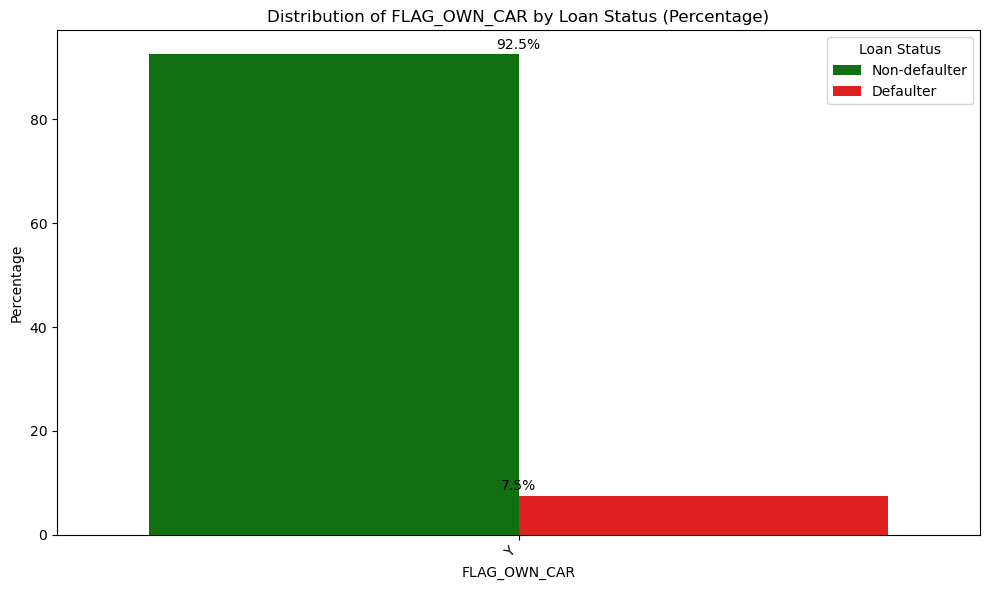

Chi-square Test for FLAG_OWN_CAR:
Chi2 statistic: 0.0000, p-value: 1.0000, Degrees of freedom: 0
No significant difference between defaulters and non-defaulters for this variable (FLAG_OWN_CAR).




FLAG_OWN_REALTY
Y    64619
N    29780
Name: count, dtype: int64


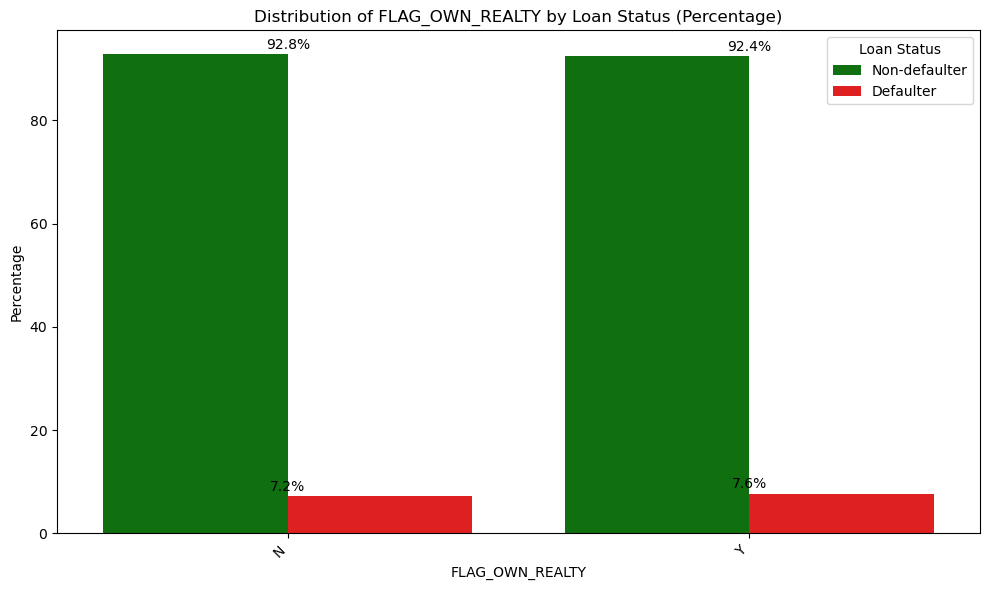

Chi-square Test for FLAG_OWN_REALTY:
Chi2 statistic: 5.1031, p-value: 0.0239, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_OWN_REALTY).




FLAG_MOBIL
1    94399
Name: count, dtype: int64


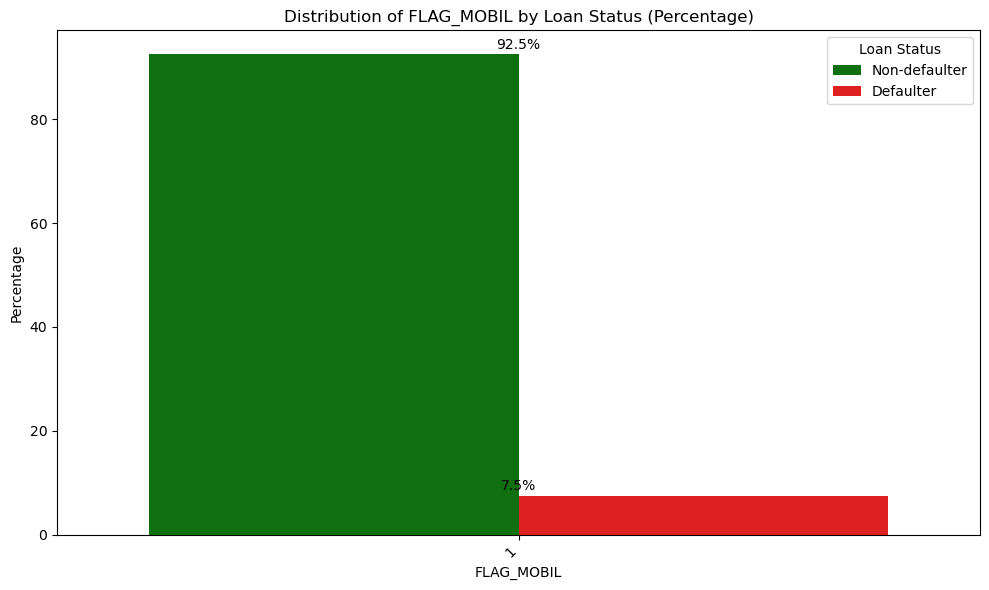

Chi-square Test for FLAG_MOBIL:
Chi2 statistic: 0.0000, p-value: 1.0000, Degrees of freedom: 0
No significant difference between defaulters and non-defaulters for this variable (FLAG_MOBIL).




FLAG_EMP_PHONE
1    94383
0       16
Name: count, dtype: int64


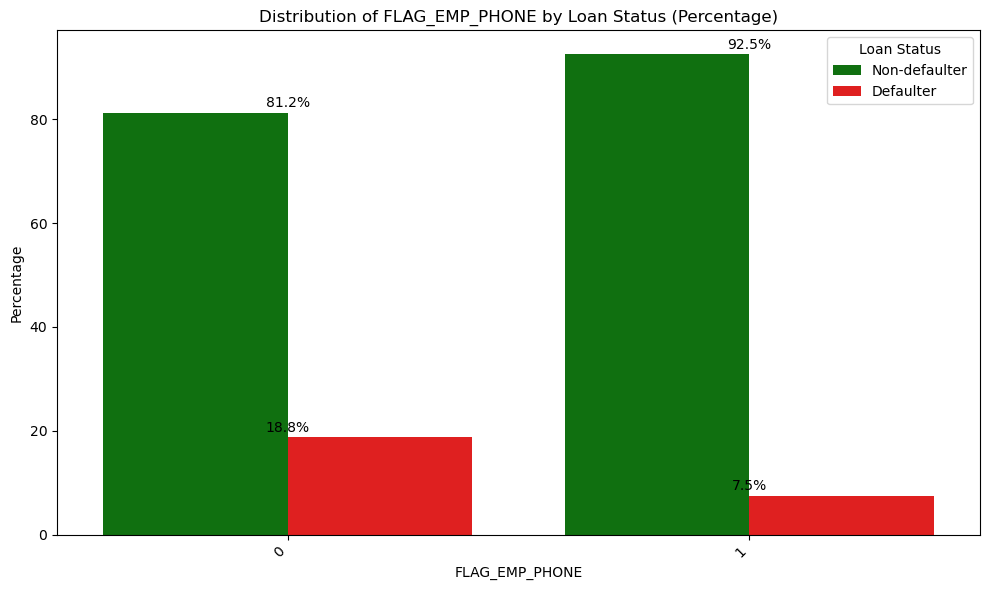

Chi-square Test for FLAG_EMP_PHONE:
Chi2 statistic: 1.5210, p-value: 0.2175, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_EMP_PHONE).




FLAG_WORK_PHONE
0    72886
1    21513
Name: count, dtype: int64


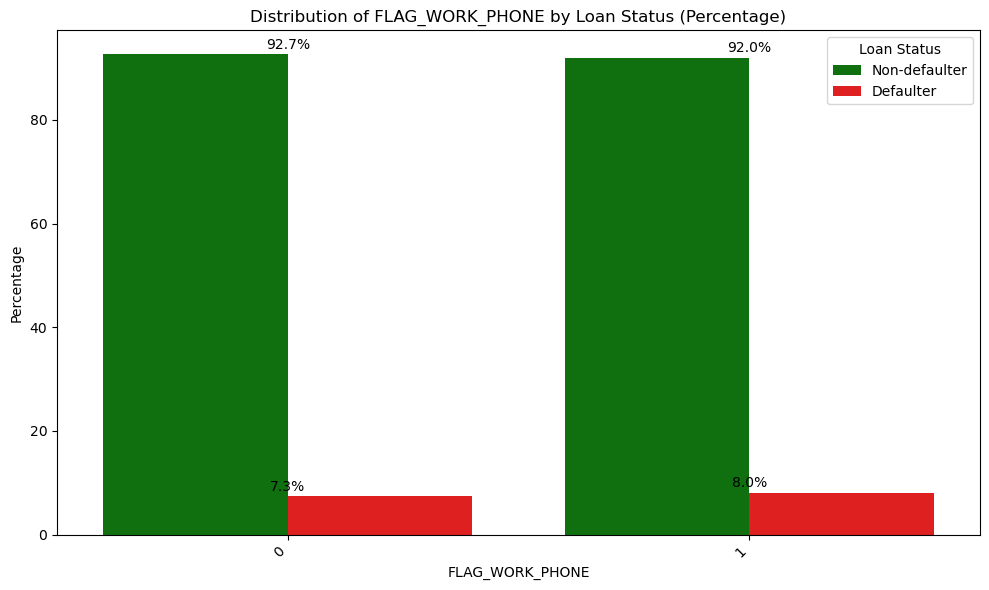

Chi-square Test for FLAG_WORK_PHONE:
Chi2 statistic: 10.9444, p-value: 0.0009, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_WORK_PHONE).




FLAG_CONT_MOBILE
1    94174
0      225
Name: count, dtype: int64


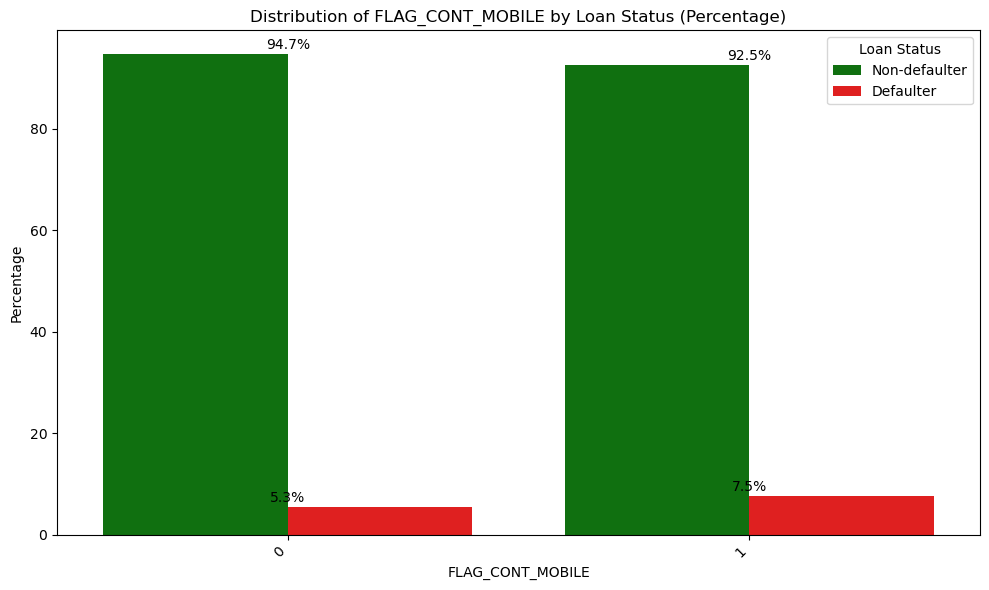

Chi-square Test for FLAG_CONT_MOBILE:
Chi2 statistic: 1.2328, p-value: 0.2669, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_CONT_MOBILE).




FLAG_PHONE
0    68659
1    25740
Name: count, dtype: int64


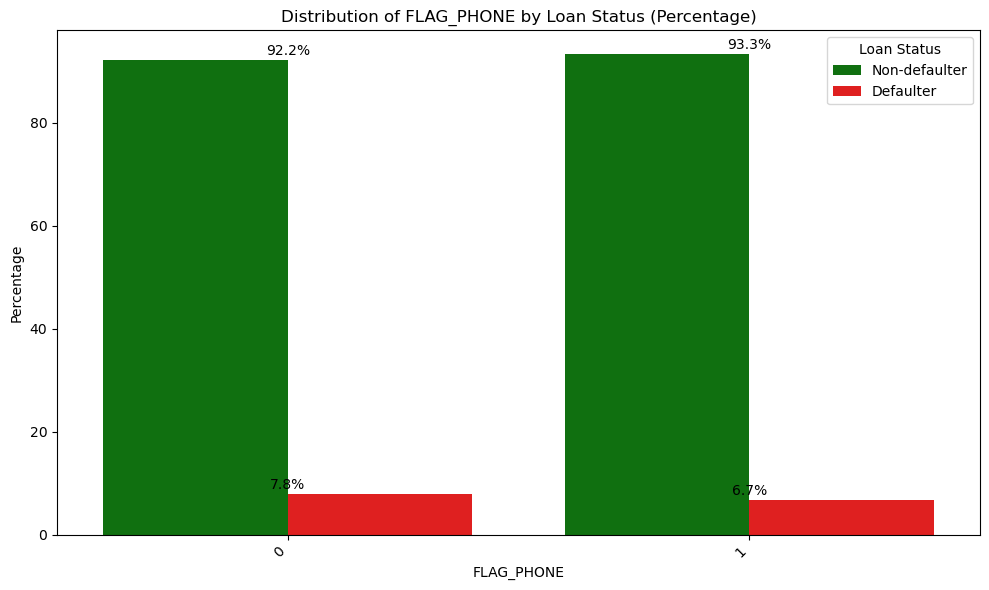

Chi-square Test for FLAG_PHONE:
Chi2 statistic: 35.8544, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_PHONE).




FLAG_EMAIL
0    87720
1     6679
Name: count, dtype: int64


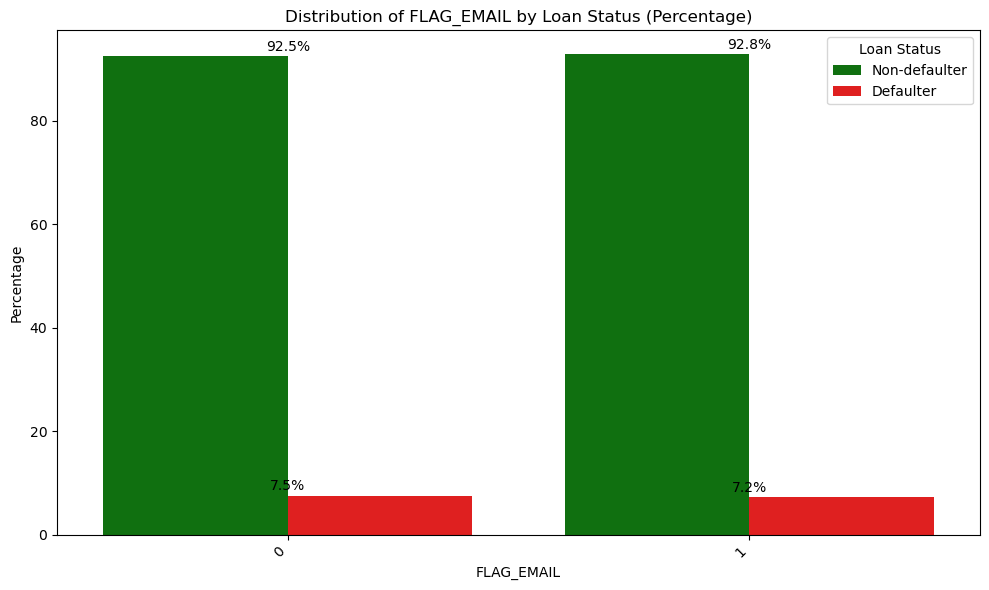

Chi-square Test for FLAG_EMAIL:
Chi2 statistic: 1.0874, p-value: 0.2970, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_EMAIL).




FLAG_DOCUMENT_2
0    94395
1        4
Name: count, dtype: int64


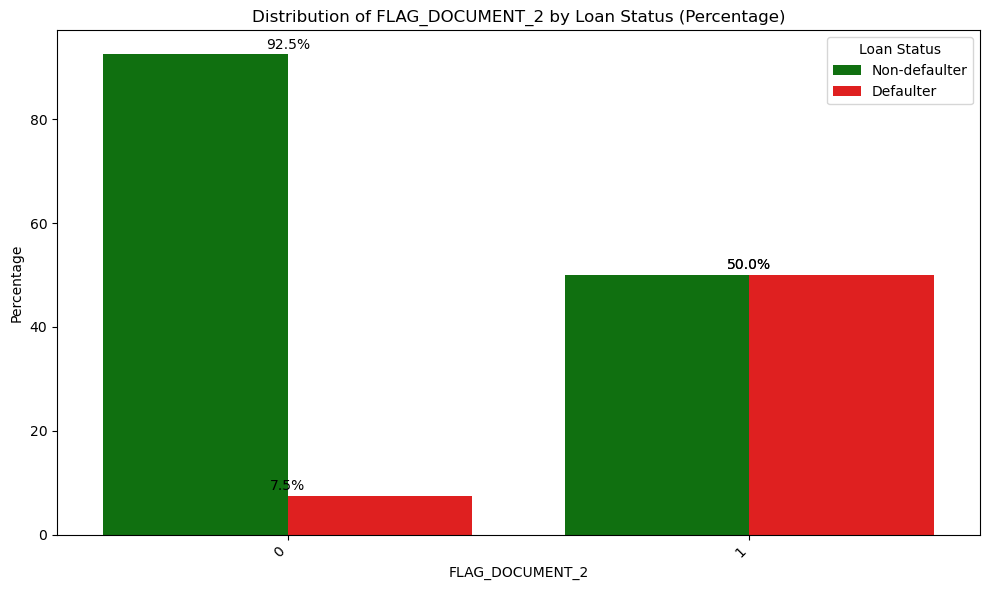

Chi-square Test for FLAG_DOCUMENT_2:
Chi2 statistic: 5.1862, p-value: 0.0228, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_2).




FLAG_DOCUMENT_3
1    64989
0    29410
Name: count, dtype: int64


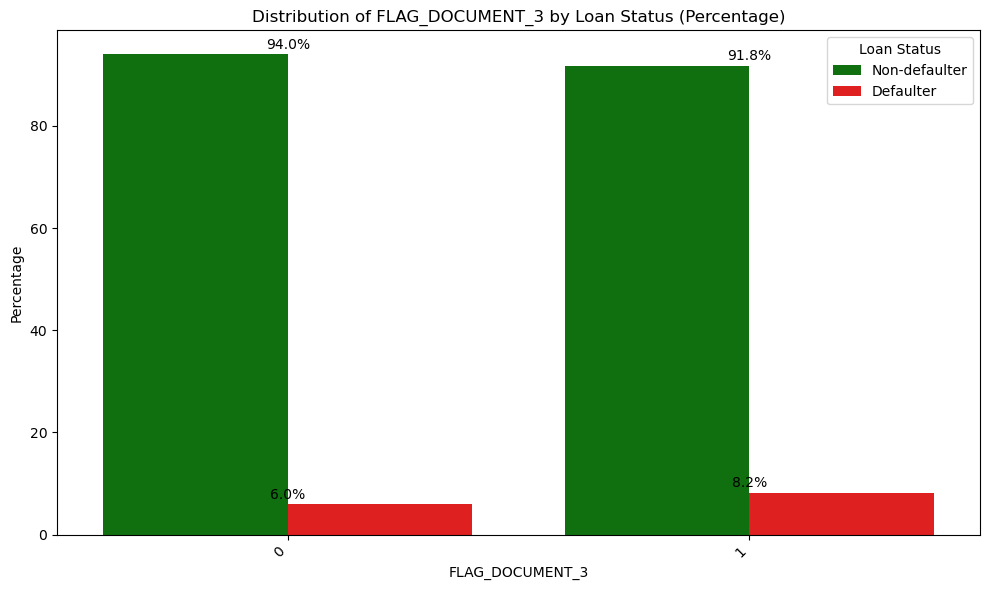

Chi-square Test for FLAG_DOCUMENT_3:
Chi2 statistic: 144.2390, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_3).




FLAG_DOCUMENT_4
0    94392
1        7
Name: count, dtype: int64


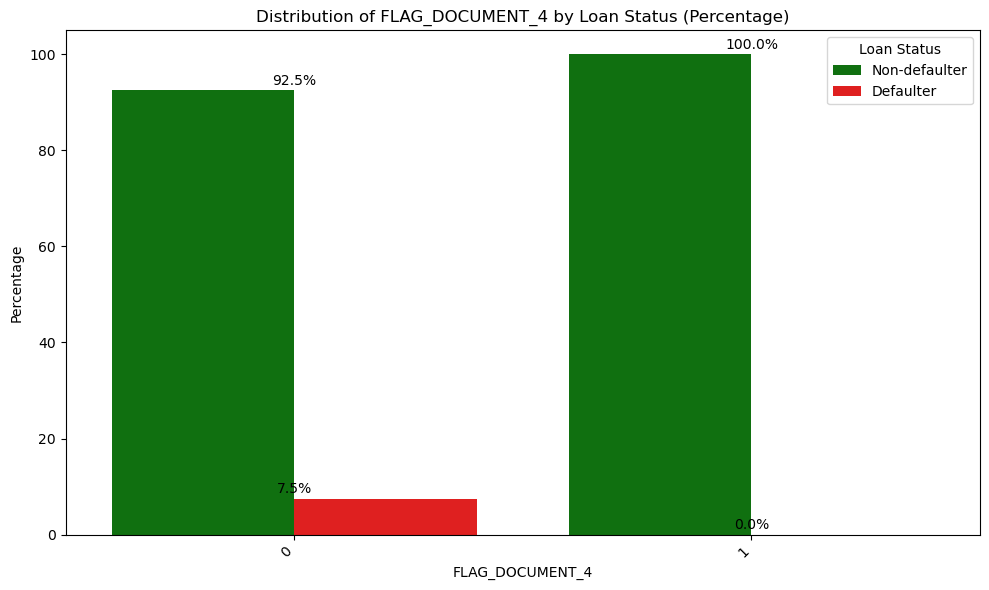

Chi-square Test for FLAG_DOCUMENT_4:
Chi2 statistic: 0.0013, p-value: 0.9711, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_4).




FLAG_DOCUMENT_5
0    93171
1     1228
Name: count, dtype: int64


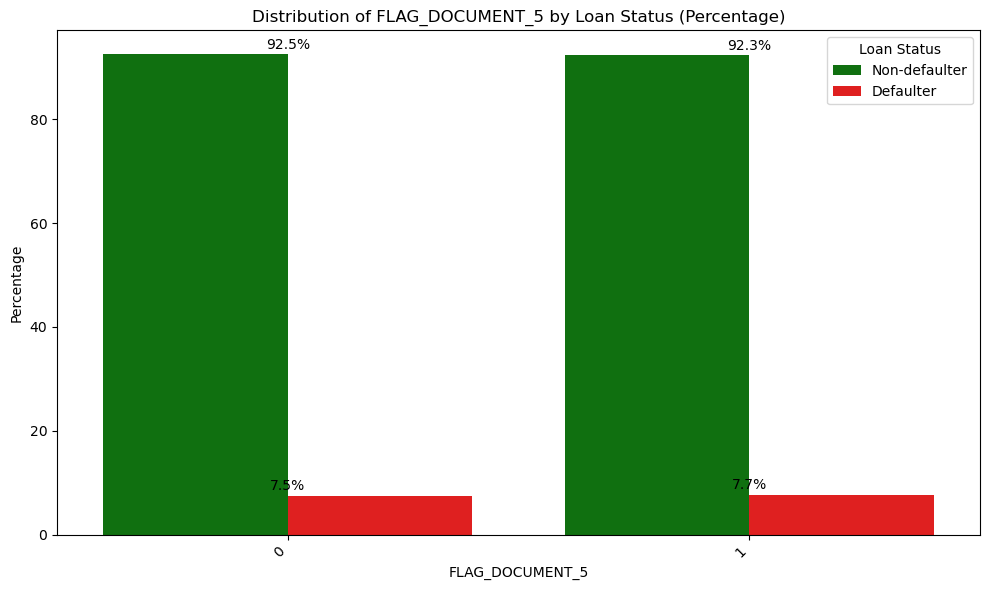

Chi-square Test for FLAG_DOCUMENT_5:
Chi2 statistic: 0.0220, p-value: 0.8821, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_5).




FLAG_DOCUMENT_6
0    93880
1      519
Name: count, dtype: int64


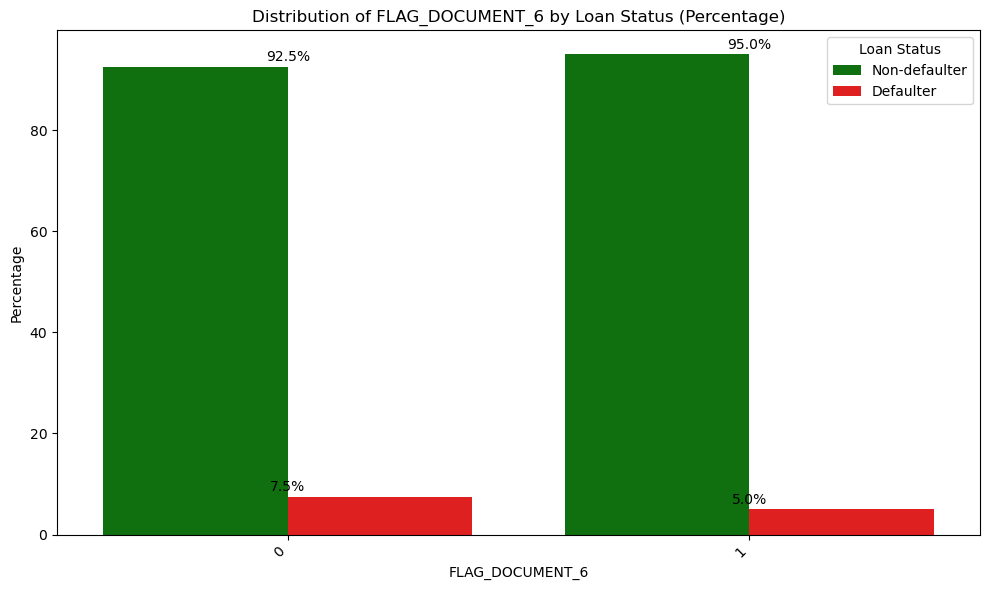

Chi-square Test for FLAG_DOCUMENT_6:
Chi2 statistic: 4.3214, p-value: 0.0376, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_6).




FLAG_DOCUMENT_7
0    94380
1       19
Name: count, dtype: int64


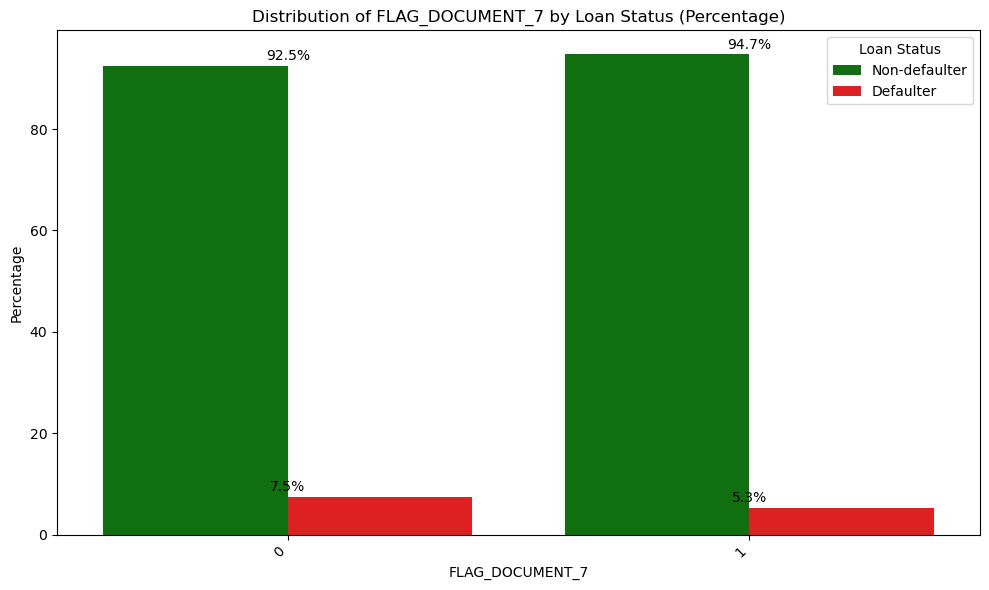

Chi-square Test for FLAG_DOCUMENT_7:
Chi2 statistic: 0.0000, p-value: 1.0000, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_7).




FLAG_DOCUMENT_8
0    77233
1    17166
Name: count, dtype: int64


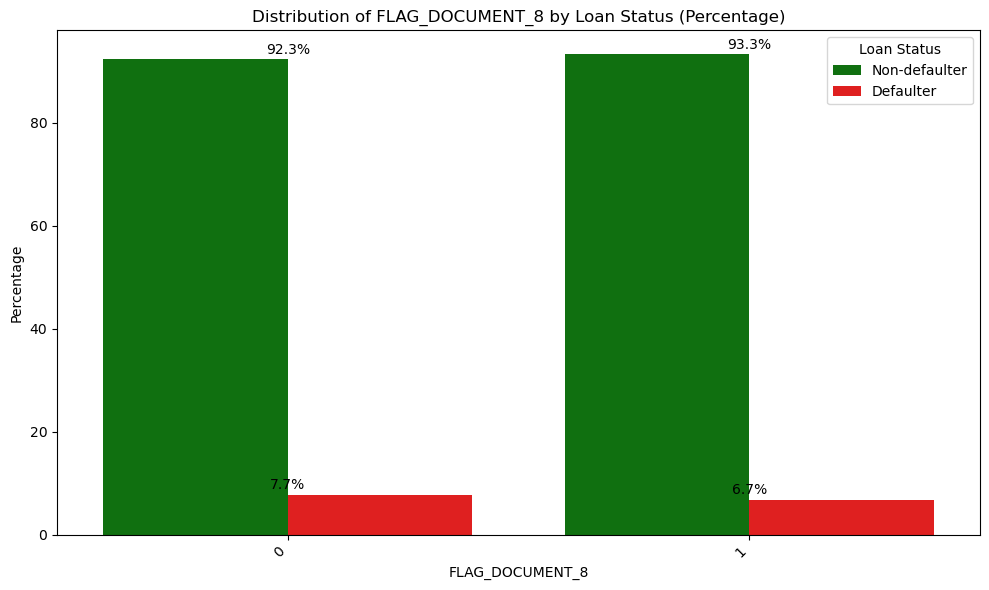

Chi-square Test for FLAG_DOCUMENT_8:
Chi2 statistic: 19.1180, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_8).




FLAG_DOCUMENT_9
0    94099
1      300
Name: count, dtype: int64


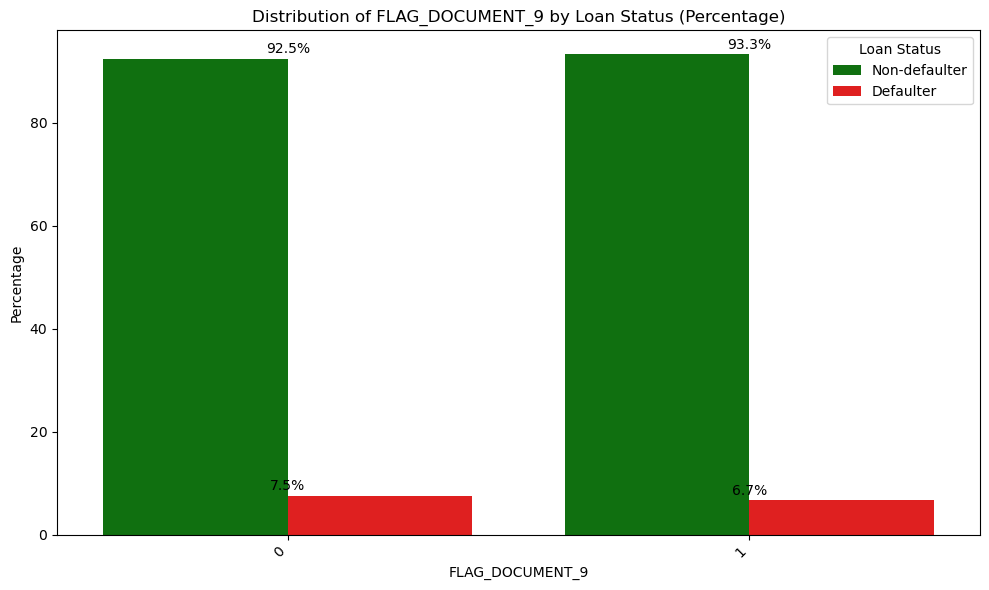

Chi-square Test for FLAG_DOCUMENT_9:
Chi2 statistic: 0.1946, p-value: 0.6591, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_9).




FLAG_DOCUMENT_10
0    94396
1        3
Name: count, dtype: int64


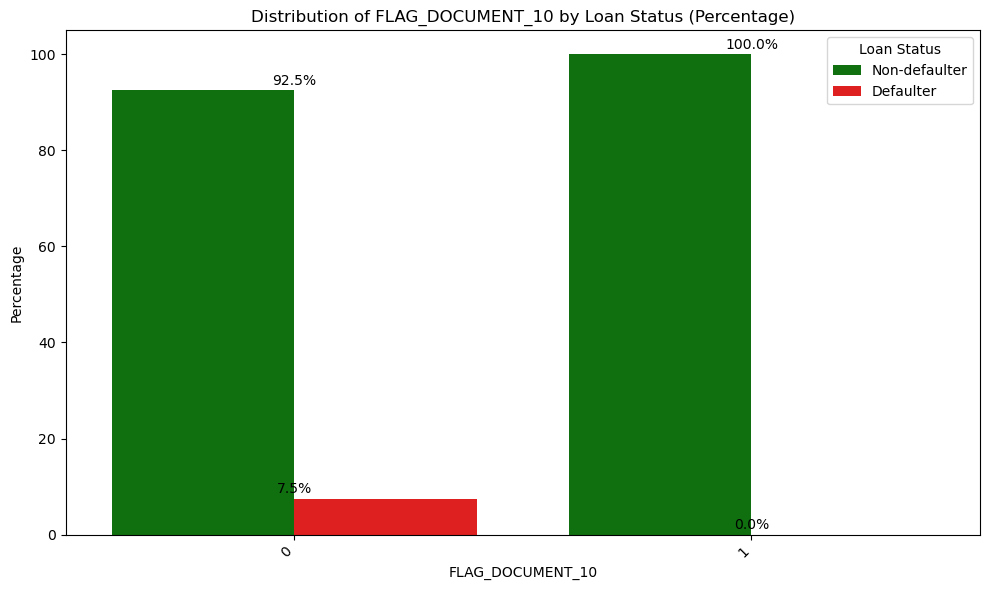

Chi-square Test for FLAG_DOCUMENT_10:
Chi2 statistic: 0.0000, p-value: 1.0000, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_10).




FLAG_DOCUMENT_11
0    93994
1      405
Name: count, dtype: int64


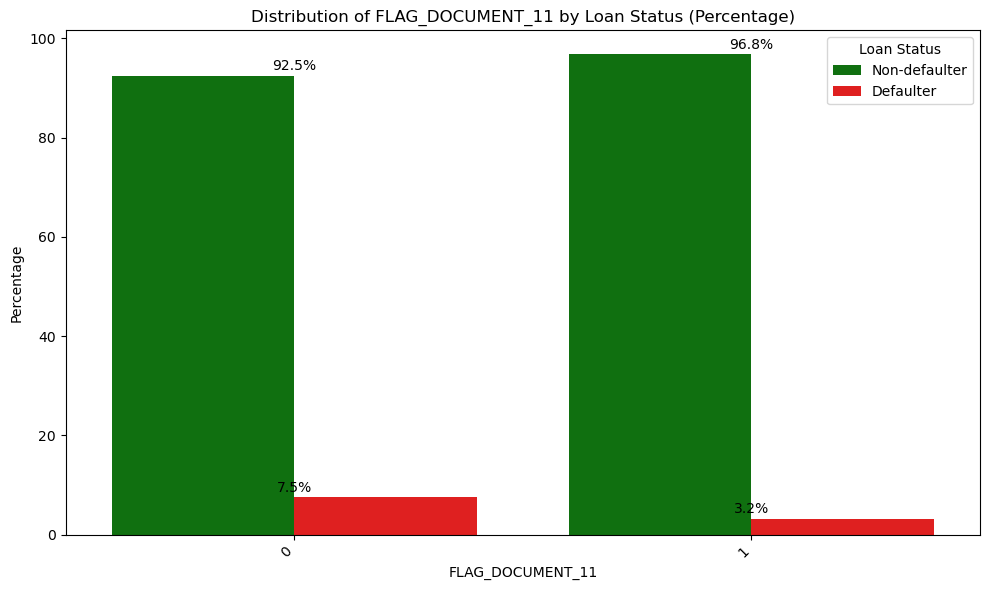

Chi-square Test for FLAG_DOCUMENT_11:
Chi2 statistic: 10.1907, p-value: 0.0014, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_11).




FLAG_DOCUMENT_12
0    94397
1        2
Name: count, dtype: int64


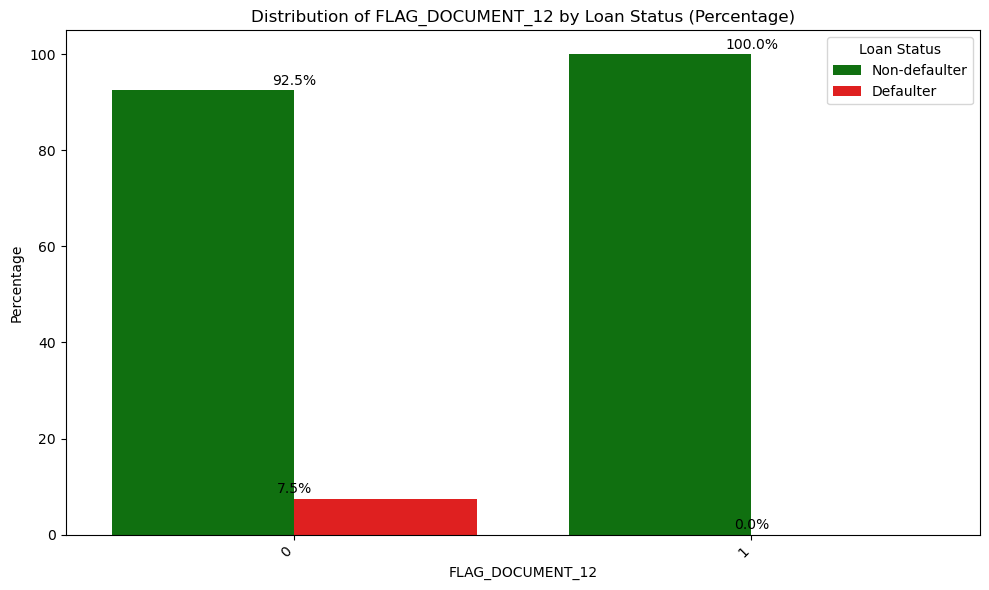

Chi-square Test for FLAG_DOCUMENT_12:
Chi2 statistic: 0.0000, p-value: 1.0000, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_12).




FLAG_DOCUMENT_13
0    93348
1     1051
Name: count, dtype: int64


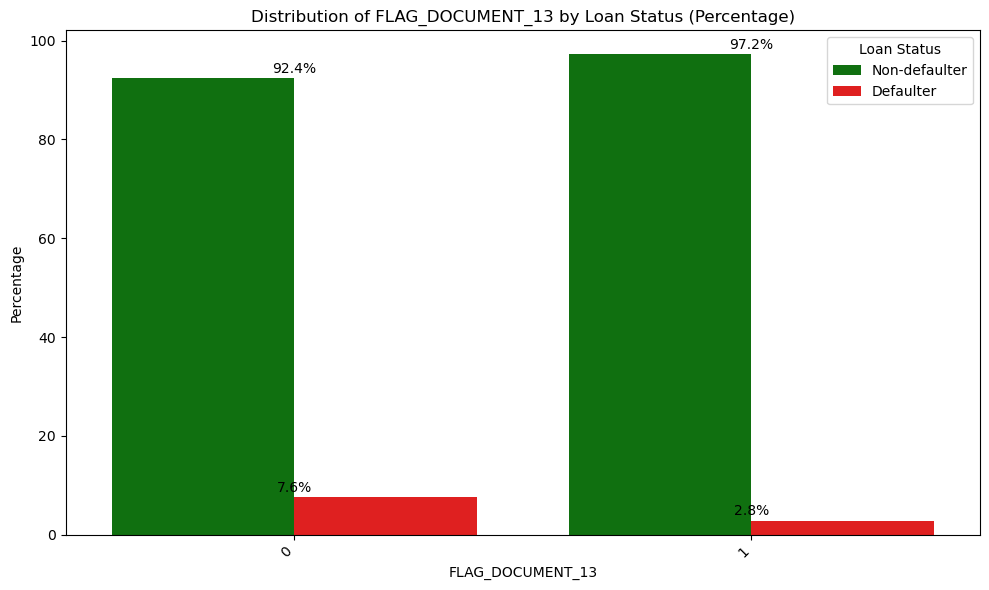

Chi-square Test for FLAG_DOCUMENT_13:
Chi2 statistic: 33.7769, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_13).




FLAG_DOCUMENT_14
0    94072
1      327
Name: count, dtype: int64


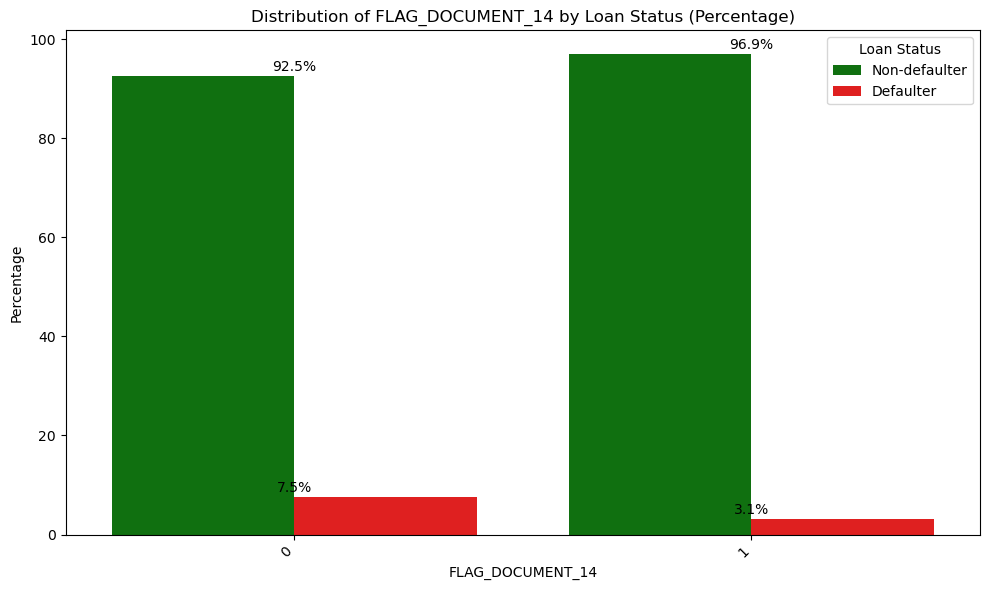

Chi-square Test for FLAG_DOCUMENT_14:
Chi2 statistic: 8.7106, p-value: 0.0032, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_14).




FLAG_DOCUMENT_15
0    94048
1      351
Name: count, dtype: int64


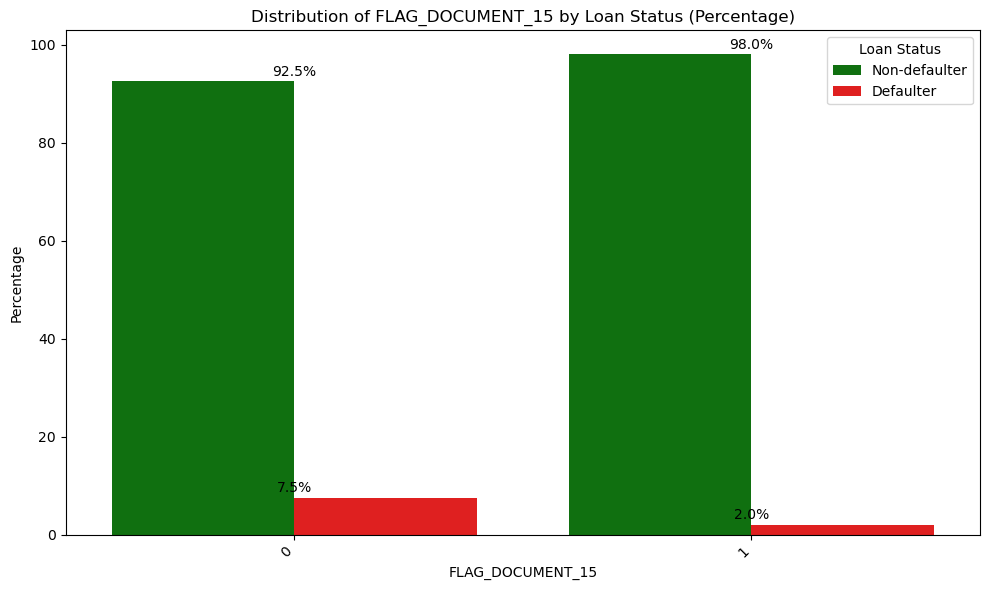

Chi-square Test for FLAG_DOCUMENT_15:
Chi2 statistic: 14.6195, p-value: 0.0001, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_15).




FLAG_DOCUMENT_16
0    93343
1     1056
Name: count, dtype: int64


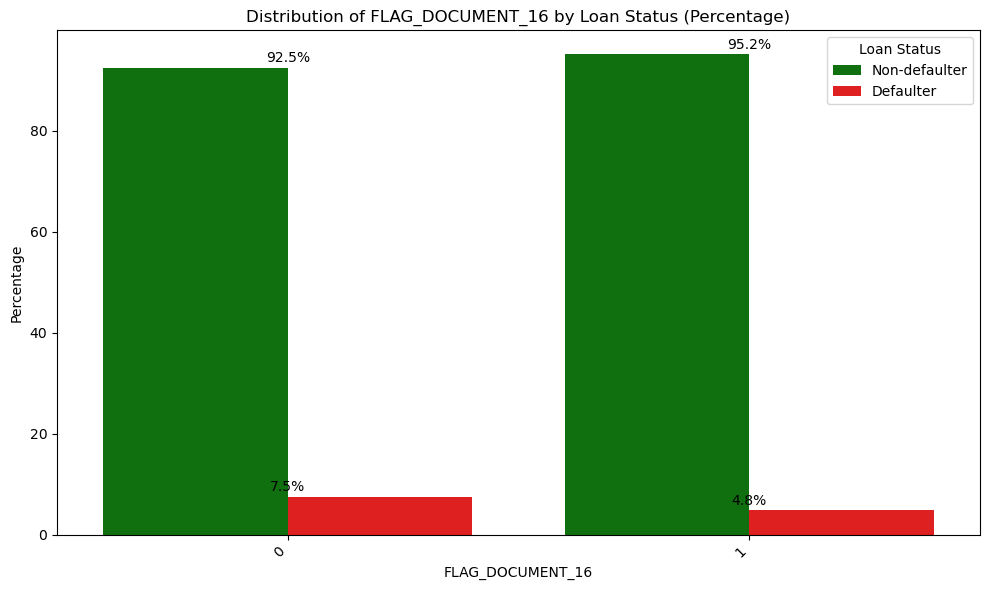

Chi-square Test for FLAG_DOCUMENT_16:
Chi2 statistic: 10.6141, p-value: 0.0011, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_16).




FLAG_DOCUMENT_17
0    94378
1       21
Name: count, dtype: int64


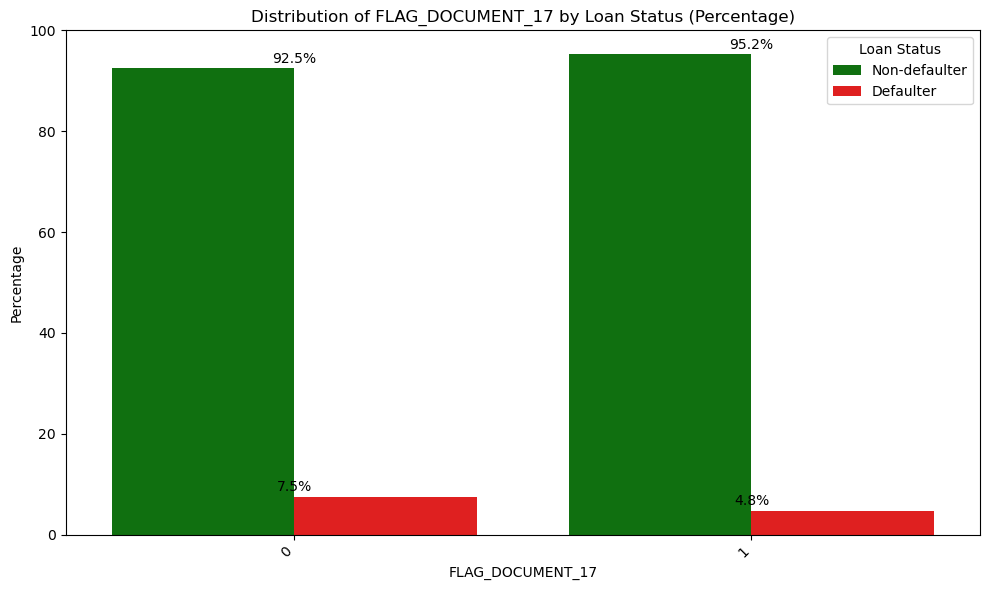

Chi-square Test for FLAG_DOCUMENT_17:
Chi2 statistic: 0.0039, p-value: 0.9500, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_17).




FLAG_DOCUMENT_18
0    93558
1      841
Name: count, dtype: int64


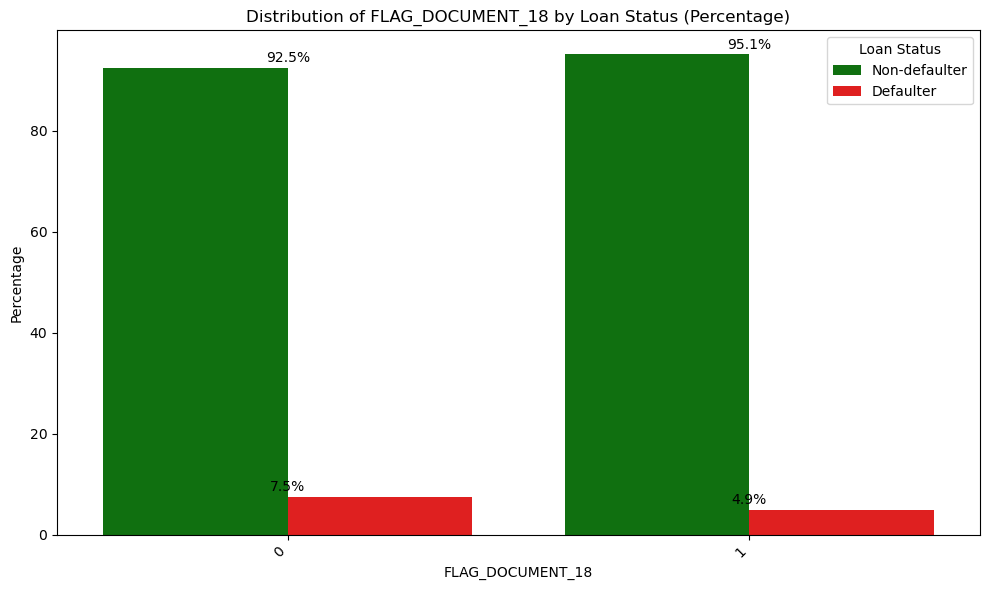

Chi-square Test for FLAG_DOCUMENT_18:
Chi2 statistic: 8.0671, p-value: 0.0045, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_18).




FLAG_DOCUMENT_19
0    94332
1       67
Name: count, dtype: int64


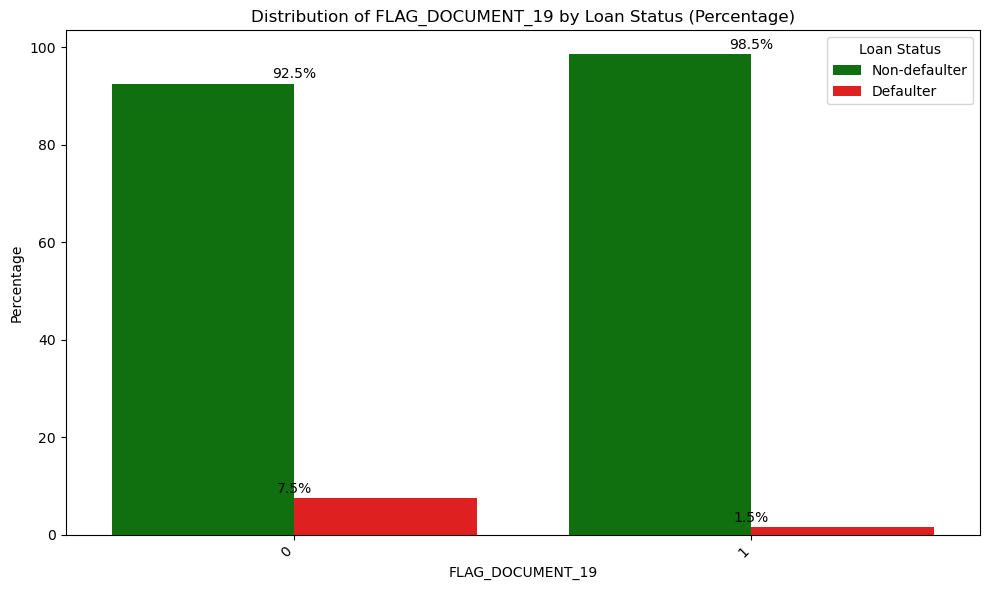

Chi-square Test for FLAG_DOCUMENT_19:
Chi2 statistic: 2.6774, p-value: 0.1018, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_19).




FLAG_DOCUMENT_20
0    94322
1       77
Name: count, dtype: int64


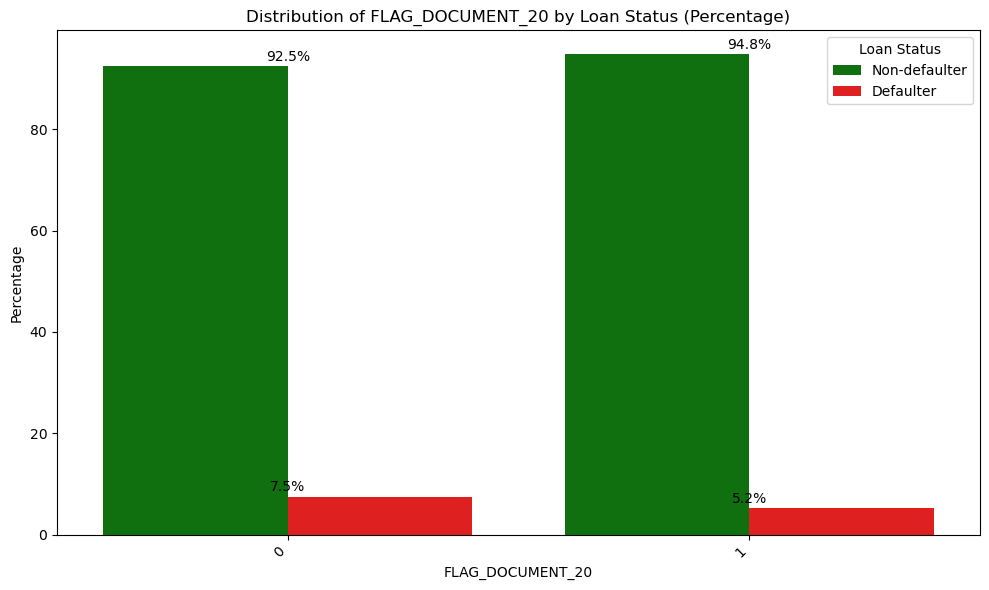

Chi-square Test for FLAG_DOCUMENT_20:
Chi2 statistic: 0.3056, p-value: 0.5804, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_20).




FLAG_DOCUMENT_21
0    94346
1       53
Name: count, dtype: int64


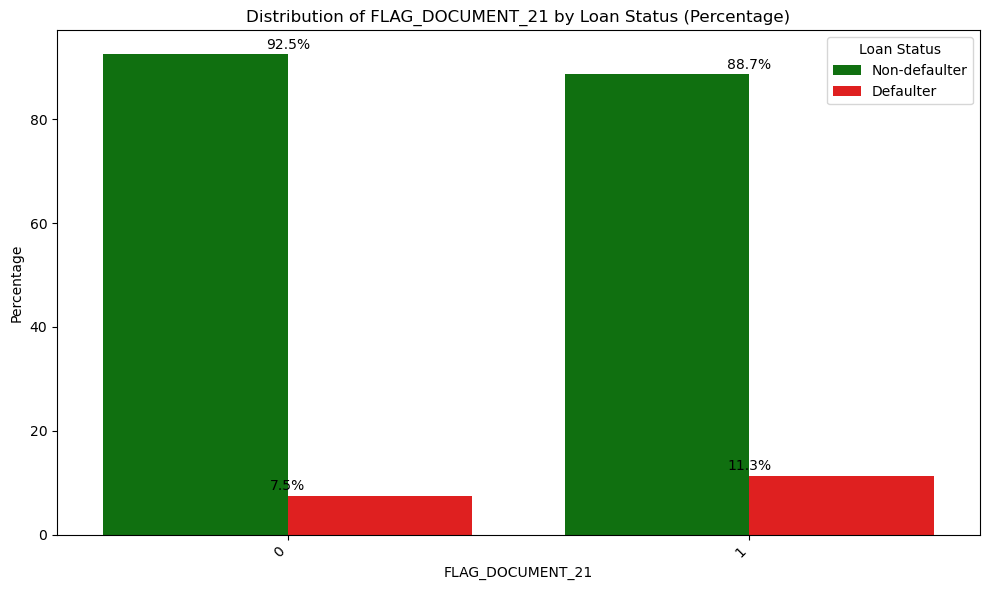

Chi-square Test for FLAG_DOCUMENT_21:
Chi2 statistic: 0.6312, p-value: 0.4269, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_DOCUMENT_21).




FLAG_ELEVATORS_AVG
0    51623
1    42776
Name: count, dtype: int64


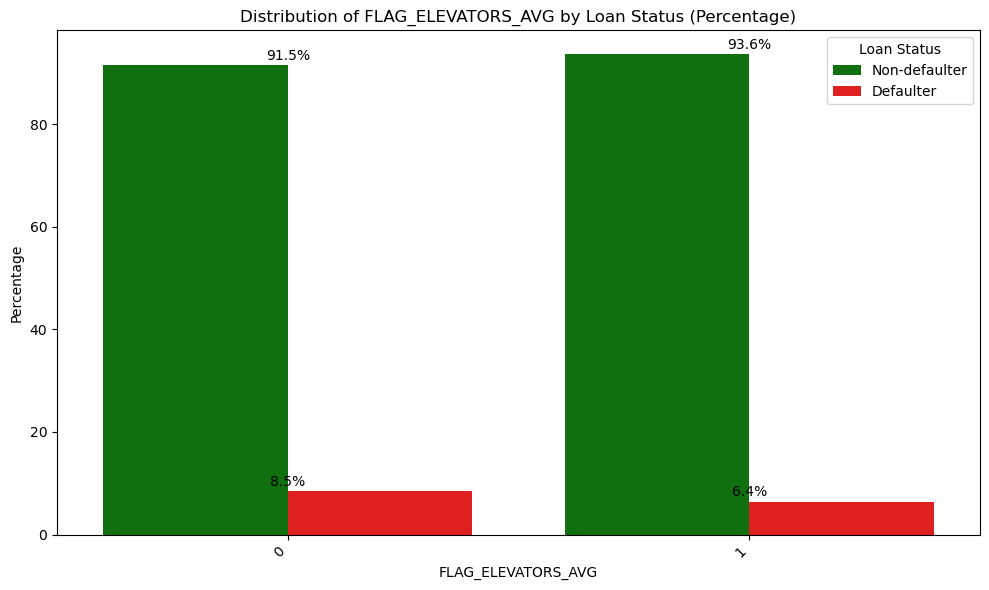

Chi-square Test for FLAG_ELEVATORS_AVG:
Chi2 statistic: 147.3436, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_ELEVATORS_AVG).




FLAG_FLOORSMAX_AVG
0    48685
1    45714
Name: count, dtype: int64


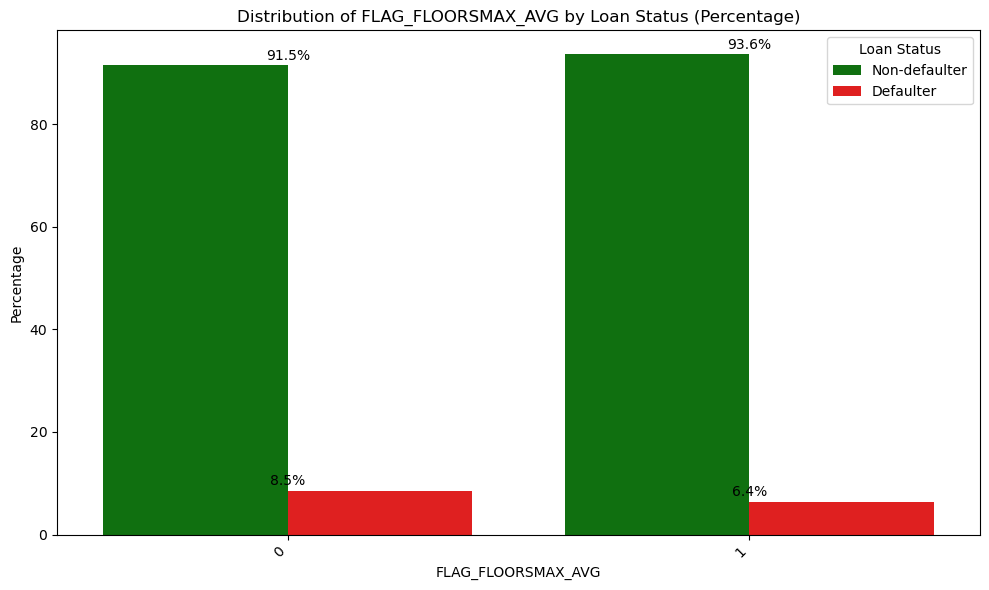

Chi-square Test for FLAG_FLOORSMAX_AVG:
Chi2 statistic: 150.6793, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_FLOORSMAX_AVG).




FLAG_ENTRANCES_AVG
0    49230
1    45169
Name: count, dtype: int64


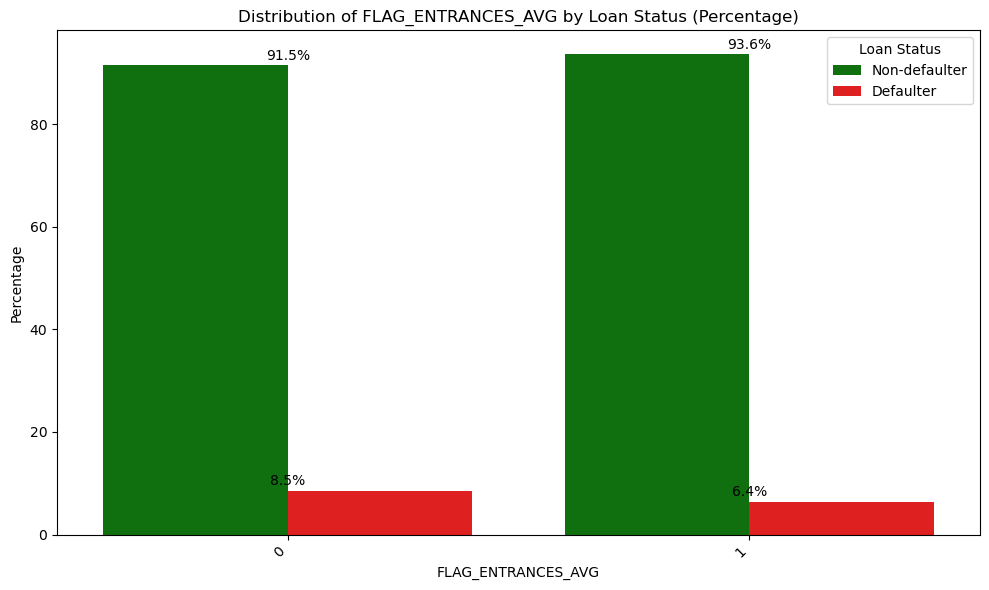

Chi-square Test for FLAG_ENTRANCES_AVG:
Chi2 statistic: 152.7025, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_ENTRANCES_AVG).




FLAG_FLOORSMIN_AVG
0    64806
1    29593
Name: count, dtype: int64


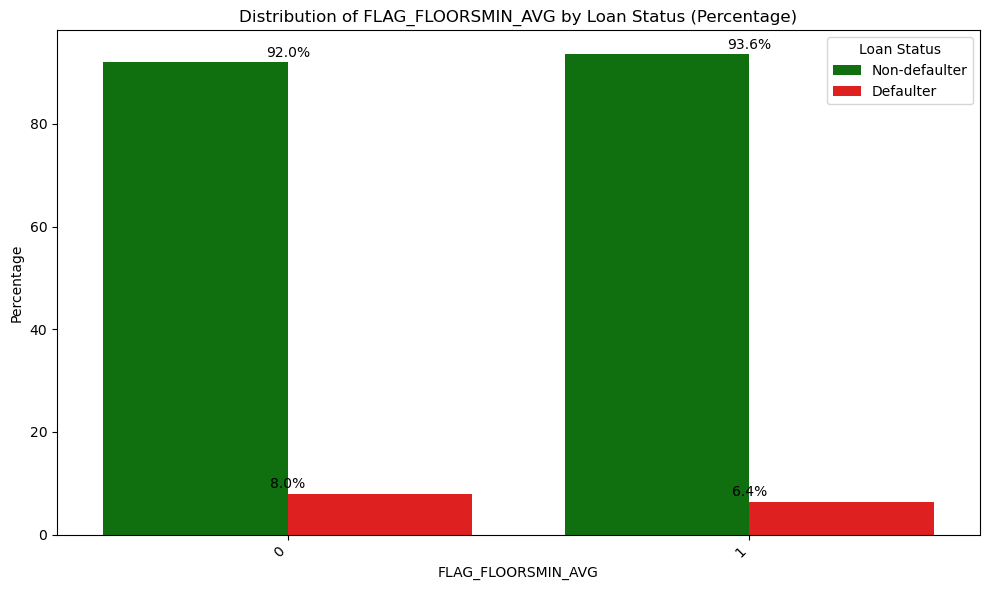

Chi-square Test for FLAG_FLOORSMIN_AVG:
Chi2 statistic: 71.2423, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_FLOORSMIN_AVG).




FLAG_BASEMENTAREA_AVG
0    56555
1    37844
Name: count, dtype: int64


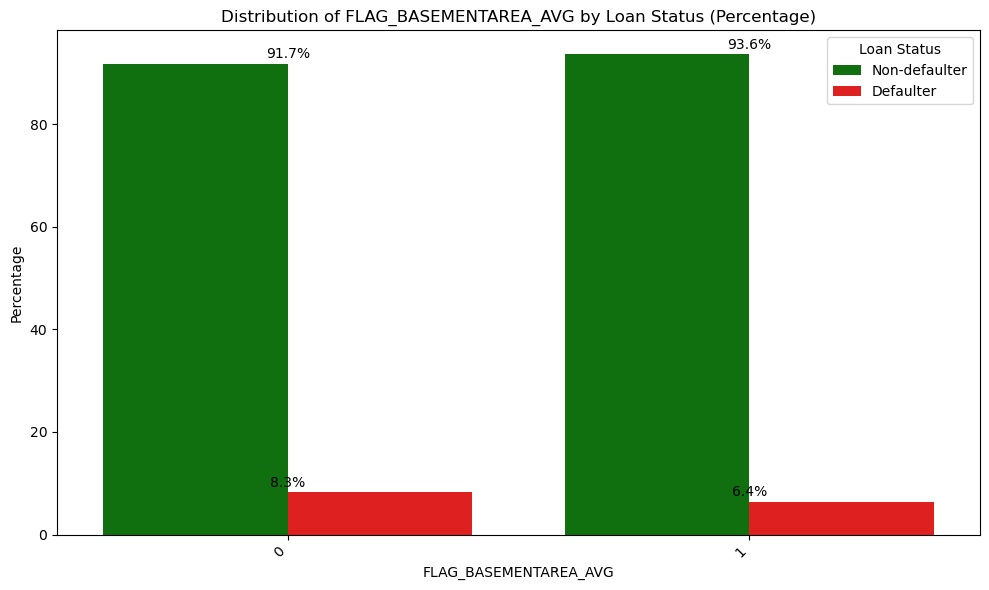

Chi-square Test for FLAG_BASEMENTAREA_AVG:
Chi2 statistic: 116.9779, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_BASEMENTAREA_AVG).




FLAG_YEARS_BEGINEXPLUATATION_AVG
0    47852
1    46547
Name: count, dtype: int64


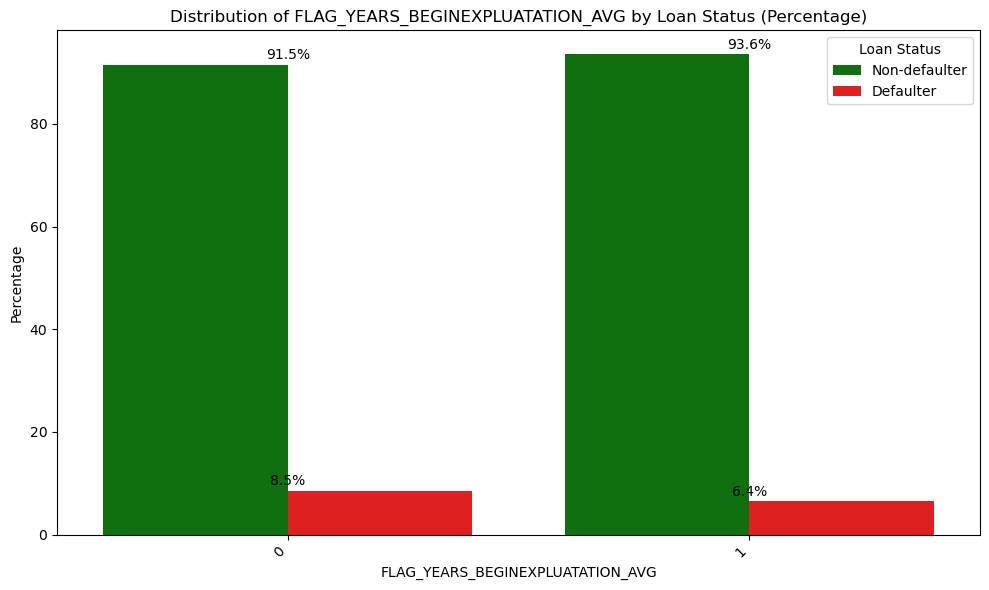

Chi-square Test for FLAG_YEARS_BEGINEXPLUATATION_AVG:
Chi2 statistic: 146.6441, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_YEARS_BEGINEXPLUATATION_AVG).




FLAG_YEARS_BUILD_AVG
0    63617
1    30782
Name: count, dtype: int64


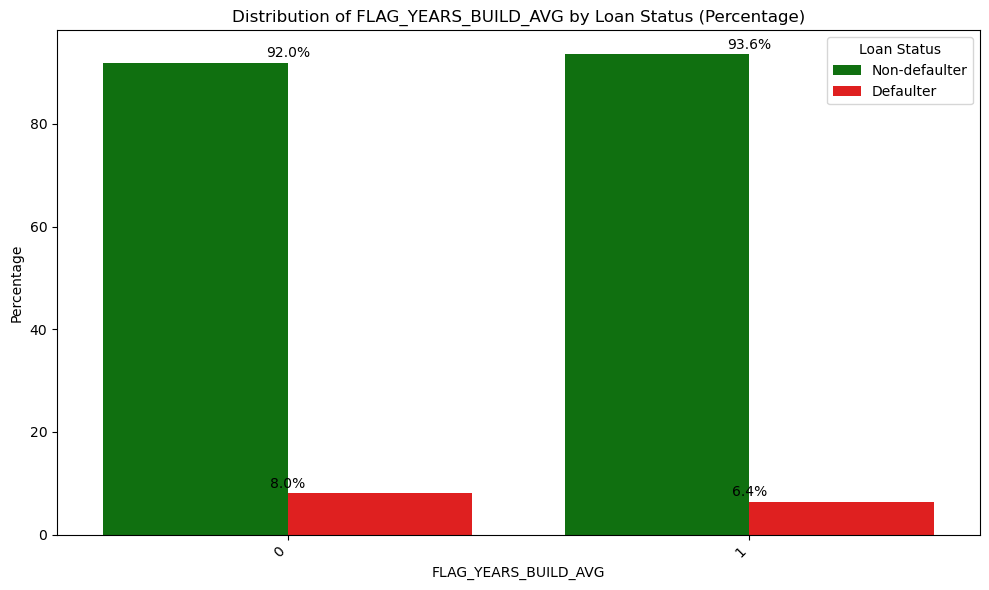

Chi-square Test for FLAG_YEARS_BUILD_AVG:
Chi2 statistic: 75.7096, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_YEARS_BUILD_AVG).




FLAG_COMMONAREA_AVG
0    66616
1    27783
Name: count, dtype: int64


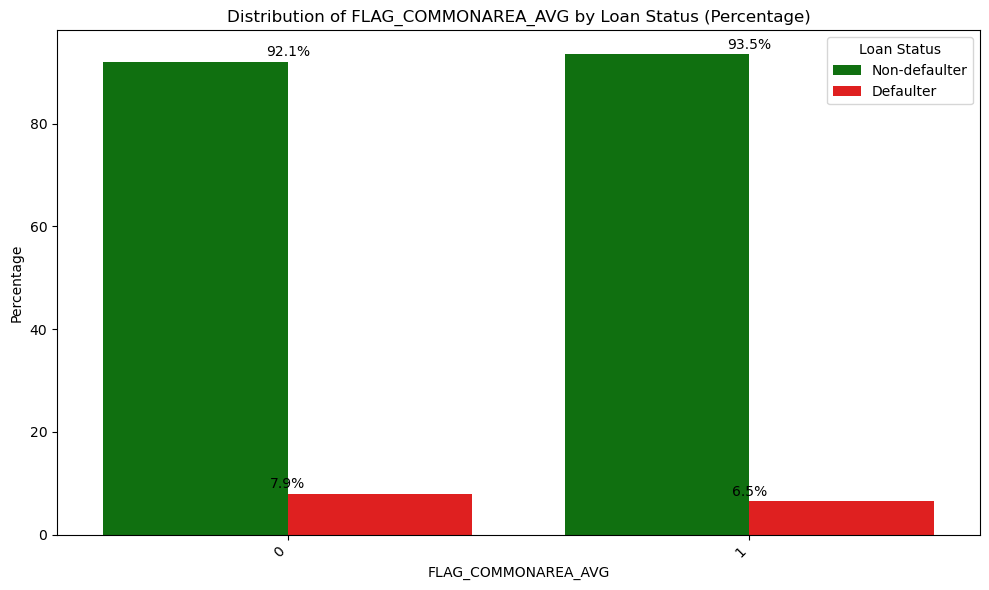

Chi-square Test for FLAG_COMMONAREA_AVG:
Chi2 statistic: 58.0828, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_COMMONAREA_AVG).




FLAG_APARTMENTS_AVG
0    49555
1    44844
Name: count, dtype: int64


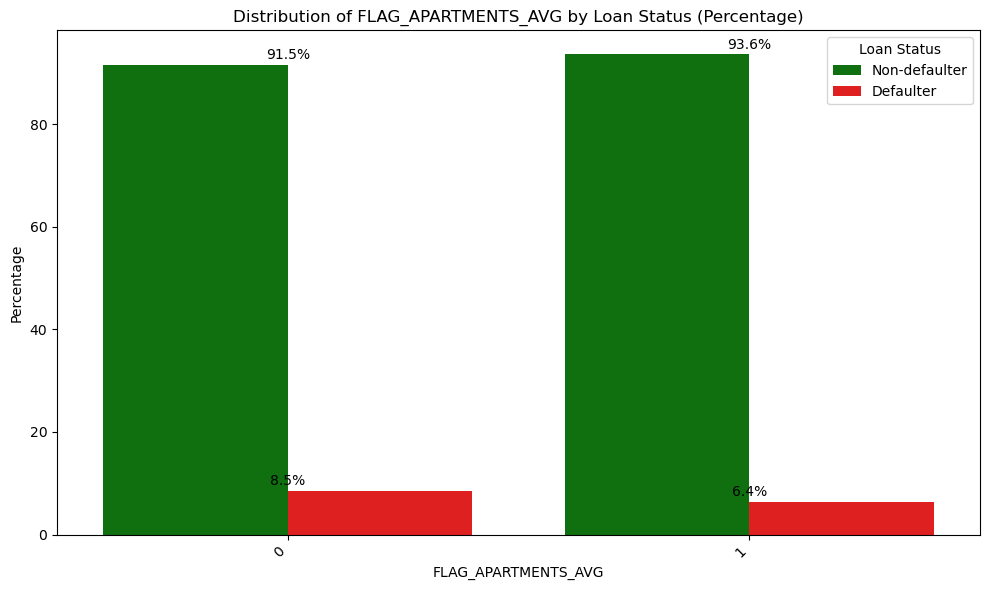

Chi-square Test for FLAG_APARTMENTS_AVG:
Chi2 statistic: 147.7146, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_APARTMENTS_AVG).




FLAG_LANDAREA_AVG
0    57533
1    36866
Name: count, dtype: int64


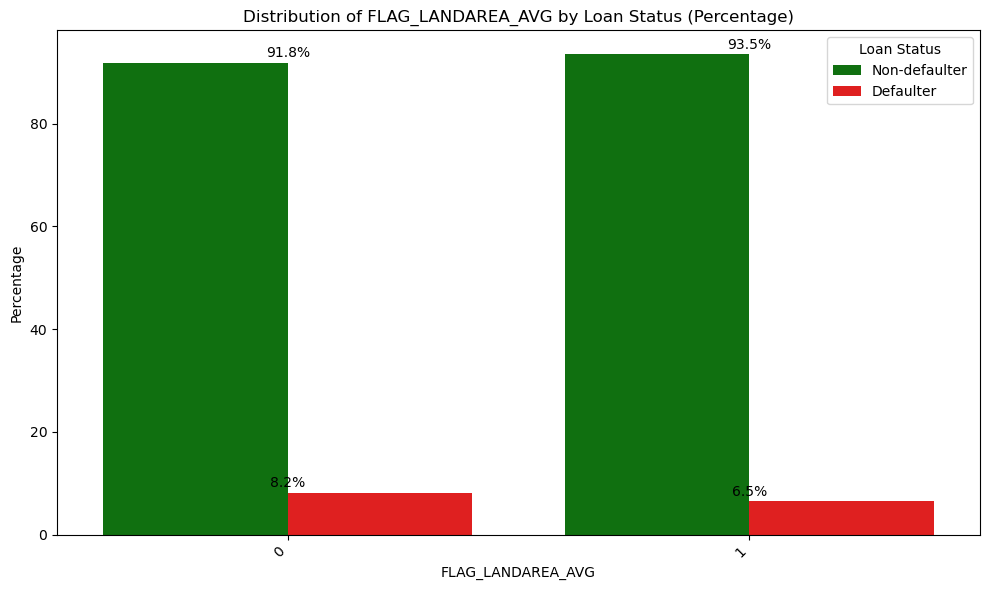

Chi-square Test for FLAG_LANDAREA_AVG:
Chi2 statistic: 92.4308, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_LANDAREA_AVG).




FLAG_LIVINGAPARTMENTS_AVG
0    65227
1    29172
Name: count, dtype: int64


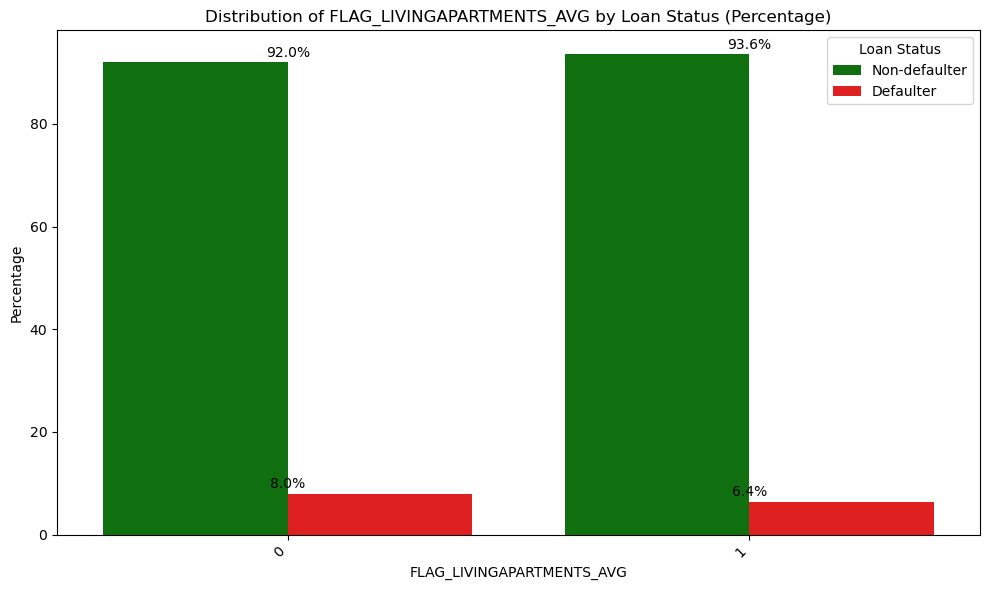

Chi-square Test for FLAG_LIVINGAPARTMENTS_AVG:
Chi2 statistic: 69.7399, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_LIVINGAPARTMENTS_AVG).




FLAG_LIVINGAREA_AVG
0    49069
1    45330
Name: count, dtype: int64


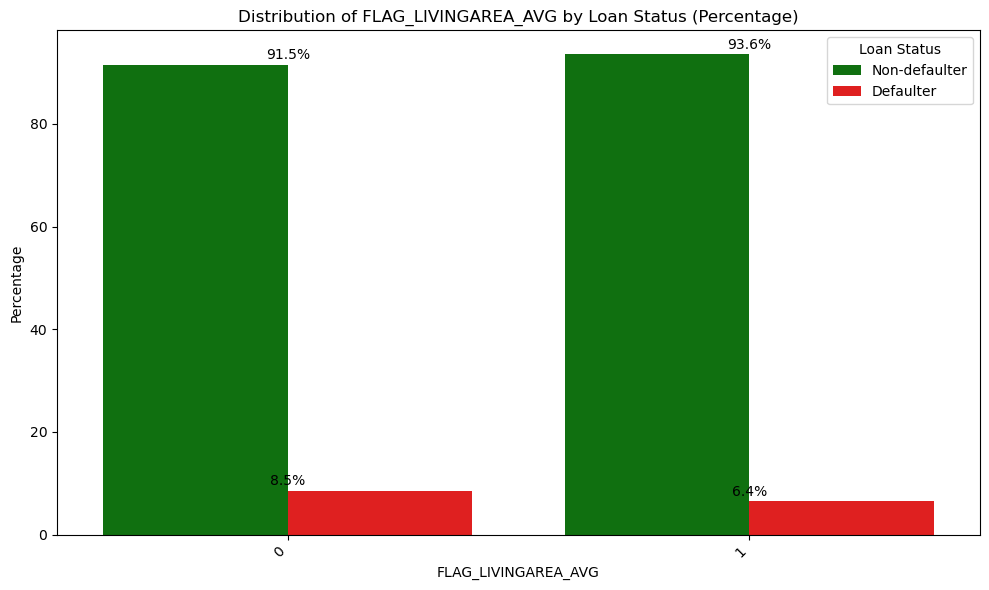

Chi-square Test for FLAG_LIVINGAREA_AVG:
Chi2 statistic: 141.9056, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_LIVINGAREA_AVG).




FLAG_NONLIVINGAPARTMENTS_AVG
0    66158
1    28241
Name: count, dtype: int64


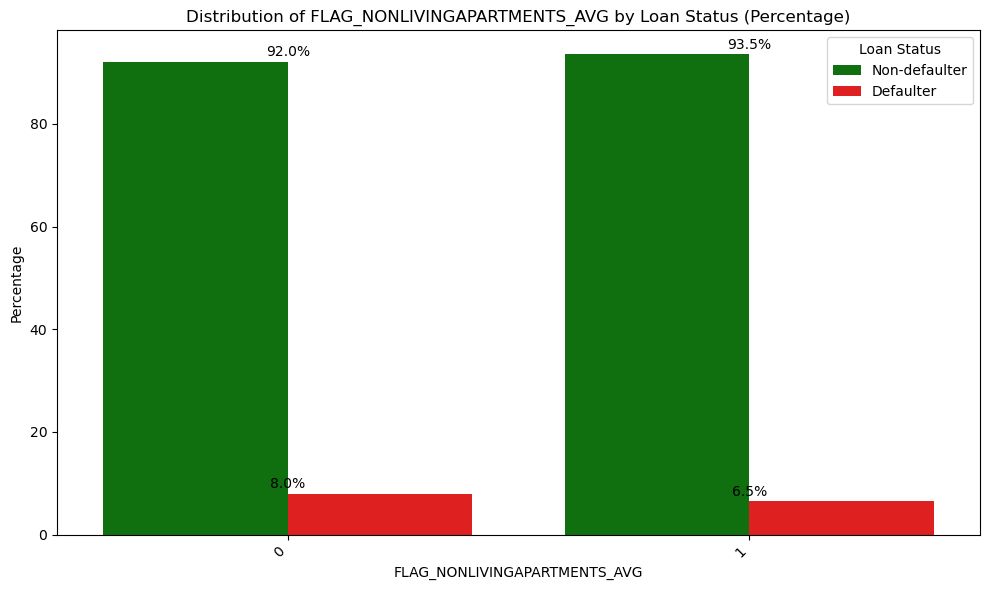

Chi-square Test for FLAG_NONLIVINGAPARTMENTS_AVG:
Chi2 statistic: 63.9975, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_NONLIVINGAPARTMENTS_AVG).




FLAG_NONLIVINGAREA_AVG
0    53327
1    41072
Name: count, dtype: int64


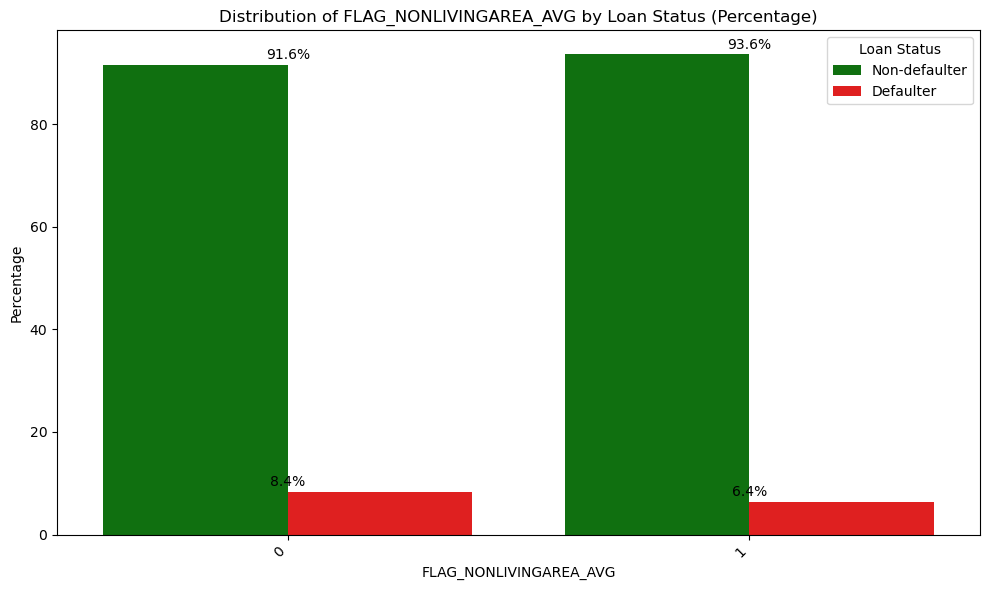

Chi-square Test for FLAG_NONLIVINGAREA_AVG:
Chi2 statistic: 134.4152, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_NONLIVINGAREA_AVG).




FLAG_EXT_SOURCE_1
0    48203
1    46196
Name: count, dtype: int64


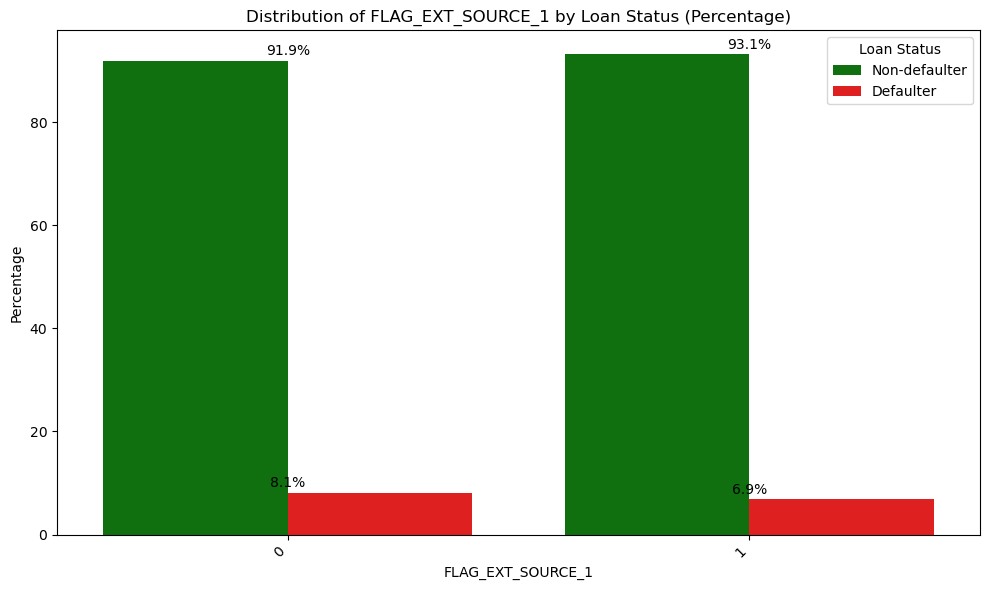

Chi-square Test for FLAG_EXT_SOURCE_1:
Chi2 statistic: 54.1358, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_EXT_SOURCE_1).




FLAG_EXT_SOURCE_2
1    94244
0      155
Name: count, dtype: int64


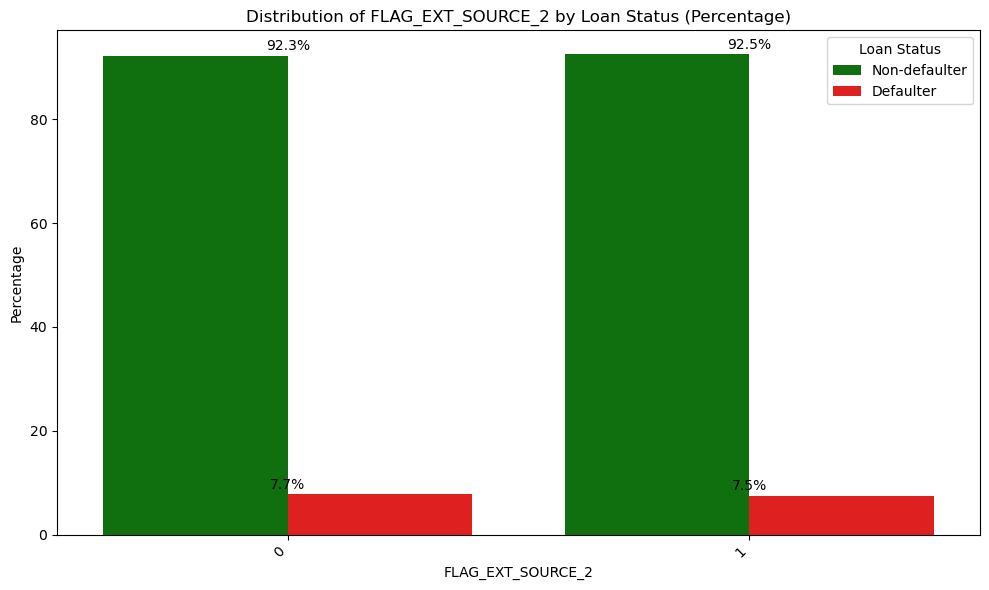

Chi-square Test for FLAG_EXT_SOURCE_2:
Chi2 statistic: 0.0000, p-value: 1.0000, Degrees of freedom: 1
No significant difference between defaulters and non-defaulters for this variable (FLAG_EXT_SOURCE_2).




FLAG_EXT_SOURCE_3
1    77859
0    16540
Name: count, dtype: int64


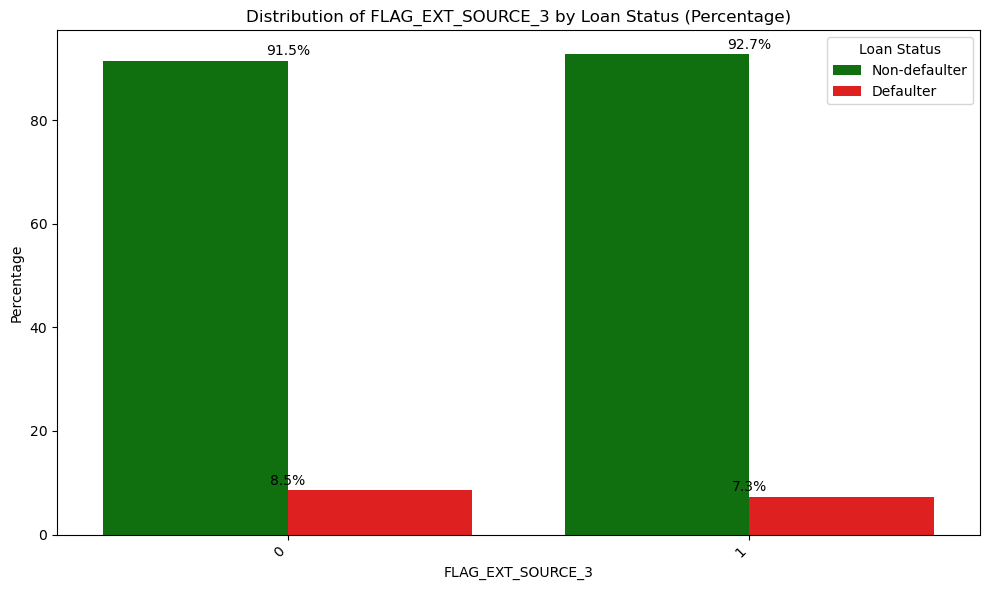

Chi-square Test for FLAG_EXT_SOURCE_3:
Chi2 statistic: 29.9741, p-value: 0.0000, Degrees of freedom: 1
There is a significant difference between defaulters and non-defaulters for this variable (FLAG_EXT_SOURCE_3).


In [12]:
# Gather all columns that start with "FLAG"
flag_columns = [col for col in application_train_cleaned.columns if col.startswith('FLAG')]
for col in flag_columns:
    categorical_analysis(application_train_cleaned,col)


### Summary of Chi-Square Tests for FLAG Variables:

#### Not Significant:
- **FLAG_OWN_CAR** (p-value: 1.0000): Car ownership does not impact default risk, likely due to widespread ownership across both groups.
- **FLAG_MOBIL** (p-value: 1.0000): No difference in default rates between those with or without mobile phones, as nearly everyone owns one.
- **FLAG_EMP_PHONE** (p-value: 1.0000): The presence of an employer's phone does not correlate with default behavior.
- **FLAG_CONT_MOBILE** (p-value: 0.2672), **FLAG_EMAIL** (p-value: 0.2806): Continuity of mobile service and email availability have no significant relationship with default risk.
- **FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_7, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_12, FLAG_DOCUMENT_17, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21**: These document flags do not significantly differentiate defaulters from non-defaulters, suggesting these documents are common among all borrowers.

#### Significant Differences:
- **FLAG_OWN_REALTY** (p-value: 0.0249): Real estate ownership is slightly associated with lower default rates, potentially due to asset stability.
- **FLAG_WORK_PHONE** (p-value: 0.0009), **FLAG_PHONE** (p-value: 0.0000): Access to a work phone or general phone availability shows a difference in default rates, perhaps reflecting employment stability.
- **Document Flags (e.g., FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_6, FLAG_DOCUMENT_8, FLAG_DOCUMENT_11, FLAG_DOCUMENT_13-16, FLAG_DOCUMENT_18)**: Significant differences suggest that certain document types might be more closely scrutinized or correlated with risk assessment processes.
- **FLAG_ELEVATORS_AVG, FLAG_FLOORSMAX_AVG, FLAG_ENTRANCES_AVG, FLAG_FLOORSMIN_AVG, FLAG_BASEMENTAREA_AVG, FLAG_YEARS_BEGINEXPLUATATION_AVG, FLAG_YEARS_BUILD_AVG, FLAG_COMMONAREA_AVG, FLAG_APARTMENTS_AVG, FLAG_LANDAREA_AVG, FLAG_LIVINGAPARTMENTS_AVG, FLAG_LIVINGAREA_AVG, FLAG_NONLIVINGAPARTMENTS_AVG, FLAG_NONLIVINGAREA_AVG**: These housing-related variables indicate a correlation between property characteristics and default risk, likely due to differences in housing conditions that affect financial stability.
- **External Sources**:
  - **FLAG_EXT_SOURCE_1** (p-value: 0.0000), **FLAG_EXT_SOURCE_3** (p-value: 0.0000): Indicates significant predictive power, suggesting that external data sources may contain valuable information about a borrower’s stability.

#### Conclusion:
- **Key Predictors**: Property-related flags, access to specific documents, and some external source indicators are valuable for understanding default risk.
- **Less Informative**: Common indicators like car ownership, mobile phone presence, and certain document types show little differentiation between defaulters and non-defaulters, and may be less valuable for predictive modeling.


In [13]:
irrelevant_columns = [
    'FLAG_OWN_CAR', 
    'FLAG_MOBIL', 
    'FLAG_EMP_PHONE', 
    'FLAG_CONT_MOBILE', 
    'FLAG_EMAIL', 
    'FLAG_DOCUMENT_4', 
    'FLAG_DOCUMENT_5', 
    'FLAG_DOCUMENT_7', 
    'FLAG_DOCUMENT_9', 
    'FLAG_DOCUMENT_10', 
    'FLAG_DOCUMENT_12', 
    'FLAG_DOCUMENT_17', 
    'FLAG_DOCUMENT_19', 
    'FLAG_DOCUMENT_20', 
    'FLAG_DOCUMENT_21', 
    'FLAG_EXT_SOURCE_2',
    'WEEKDAY_APPR_PROCESS_START']

#these columns may be dropped later although some could be feature engineered together for instance number of documents supplied or number of ext sources given.


## Encoding Categoricals

In [18]:
#encoding categorical columns: 
# List all categorical columns in the DataFrame
categorical_columns = application_train_cleaned.select_dtypes(include=['object', 'category']).columns

# Display the categorical columns
print(categorical_columns)

# Loop through each categorical column and print the unique categories
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Categories: {application_train_cleaned[col].unique()}")
    print("\n")  # Adds a line break for better readability

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
Column: NAME_CONTRACT_TYPE
Categories: ['Cash loans' 'Revolving loans']


Column: CODE_GENDER
Categories: ['M' 'F' 'XNA']


Column: FLAG_OWN_CAR
Categories: ['N' 'Y']


Column: FLAG_OWN_REALTY
Categories: ['Y' 'N']


Column: NAME_TYPE_SUITE
Categories: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Unknown'
 'Other_B' 'Group of people']


Column: NAME_INCOME_TYPE
Categories: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']


Column: NAME_EDUCATION_TYPE
Categories: ['Secondary / secondary special' 'Higher education' 

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Custom transformer for binary encoding
class EncodeBinaryVariables(BaseEstimator, TransformerMixin):
    def __init__(self, binary_columns):
        self.binary_columns = binary_columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        label_encoder = LabelEncoder()
        
        for col in self.binary_columns:
            if col in X.columns:  # Check if column exists
                X[col] = label_encoder.fit_transform(X[col])
        
        return X

# Custom transformer for ordinal encoding
class EncodeOrdinalVariables(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_column, mapping_dict, default_value=None):
        self.ordinal_column = ordinal_column
        self.mapping_dict = mapping_dict
        self.default_value = default_value
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        if self.ordinal_column in X.columns:  # Check if column exists
            X[self.ordinal_column] = X[self.ordinal_column].map(self.mapping_dict)
            if self.default_value is not None:
                X[self.ordinal_column] = X[self.ordinal_column].fillna(self.default_value)
        
        return X

# Custom transformer for nominal encoding
class EncodeNominalVariables(BaseEstimator, TransformerMixin):
    def __init__(self, nominal_columns, drop_first=True):
        self.nominal_columns = nominal_columns
        self.drop_first = drop_first
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Only apply get_dummies if the columns are still in the DataFrame
        for col in self.nominal_columns:
            if col in X.columns:
                X = pd.get_dummies(X, columns=[col], drop_first=self.drop_first)
        
        return X





In [35]:
# List of columns to encode
binary_columns = ['CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR']
ordinal_mapping = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}
nominal_columns = [
    'NAME_TYPE_SUITE', 
    'NAME_INCOME_TYPE', 
    'NAME_FAMILY_STATUS', 
    'NAME_HOUSING_TYPE', 
    'ORGANIZATION_TYPE', 
    'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START'
]

# Create the pipeline
encoding_pipeline = Pipeline(steps=[
    ('binary_encoder', EncodeBinaryVariables(binary_columns=binary_columns)),
    ('ordinal_encoder', EncodeOrdinalVariables(ordinal_column='NAME_EDUCATION_TYPE', mapping_dict=ordinal_mapping, default_value=0)),
    ('nominal_encoder', EncodeNominalVariables(nominal_columns=nominal_columns))
])


# Apply the pipeline (can run multiple times without issues)
application_train_cleaned = encoding_pipeline.fit_transform(application_train_cleaned)

# Check the result
print(application_train_cleaned.head())  # Check the processed data

   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   ...  OCCUPATION_TYPE_Secretaries  OCCUPATION_TYPE_Security staff  \
0  ...               

In [29]:
pd.set_option('display.max_rows', None)
print(application_train_cleaned.dtypes)



SK_ID_CURR                                    int64
TARGET                                        int64
NAME_CONTRACT_TYPE                            int64
CODE_GENDER                                   int64
FLAG_OWN_CAR                                  int64
FLAG_OWN_REALTY                               int64
CNT_CHILDREN                                  int64
AMT_INCOME_TOTAL                            float64
AMT_CREDIT                                  float64
AMT_ANNUITY                                 float64
AMT_GOODS_PRICE                             float64
NAME_EDUCATION_TYPE                         float64
REGION_POPULATION_RELATIVE                  float64
DAYS_BIRTH                                    int64
DAYS_EMPLOYED                                 int64
DAYS_REGISTRATION                           float64
DAYS_ID_PUBLISH                               int64
OWN_CAR_AGE                                 float64
FLAG_MOBIL                                    int64
FLAG_EMP_PHO

# Analysis of Numerical Features

Normality Assessment for AMT_INCOME_TOTAL (<= 100th Percentile):
Jarque-Bera Statistic: 471279821765169.1250, p-value: 0.0000
Skewness: 391.5577
Kurtosis: 191786.4360
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



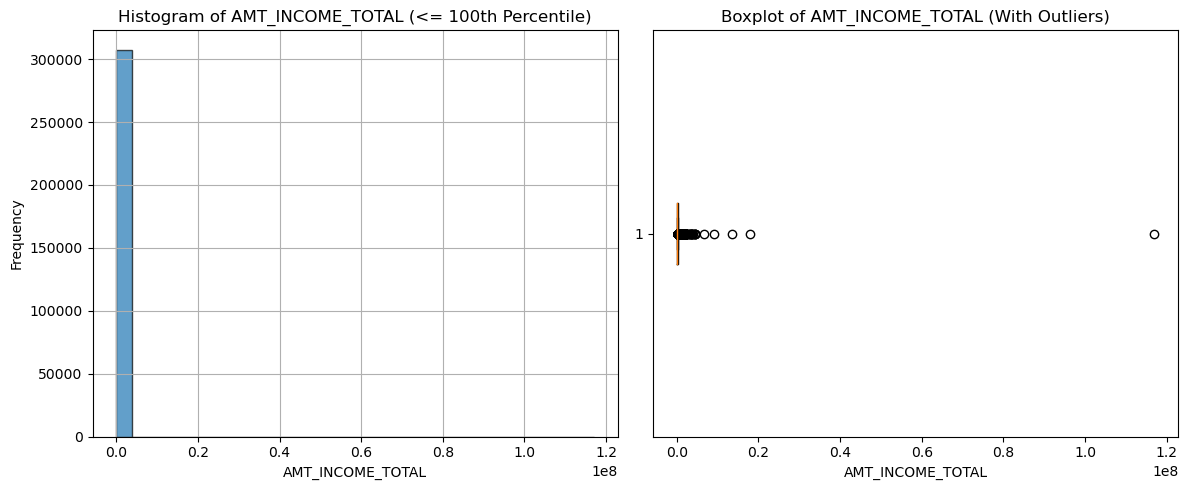

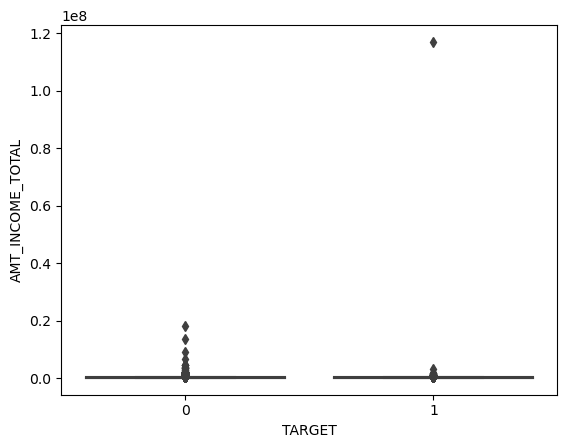

Percentile limit: 100th
Mean for target=0: 169077.72226581787
Mean for target=1: 165611.76090634443
t-statistic: 2.2081011084695983, p-value: 0.027237960879677118
There is a significant difference between the groups. 

Normality Assessment for AMT_INCOME_TOTAL (<= 99th Percentile):
Jarque-Bera Statistic: 101683.2683, p-value: 0.0000
Skewness: 1.1779
Kurtosis: 4.5699
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



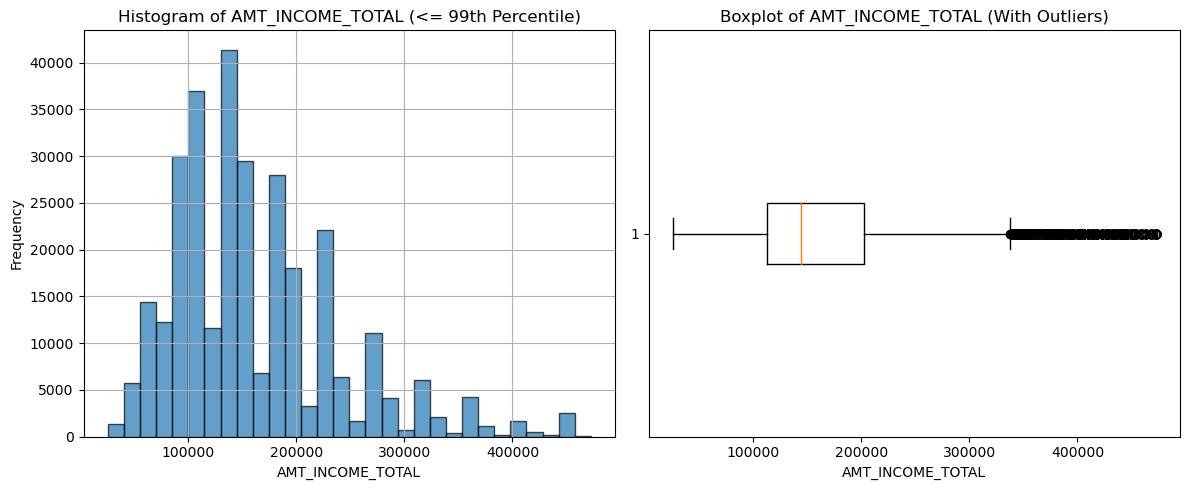

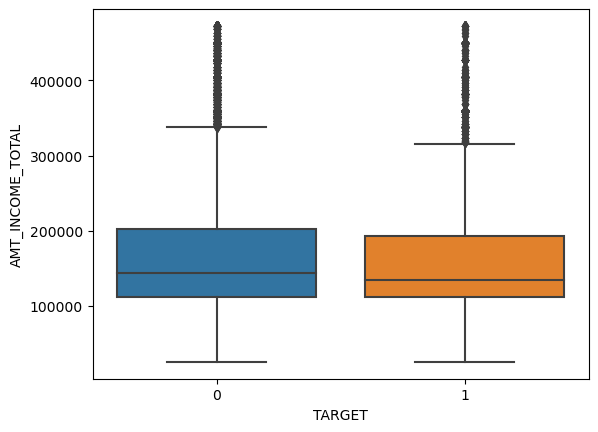

Percentile limit: 99th
Mean for target=0: 163481.589765486
Mean for target=1: 157441.3175404452
t-statistic: 11.714281109047256, p-value: 1.0940299542775955e-31
There is a significant difference between the groups. 

Normality Assessment for AMT_INCOME_TOTAL (<= 75th Percentile):
Jarque-Bera Statistic: 6688.4534, p-value: 0.0000
Skewness: 0.0031
Kurtosis: 2.1752
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



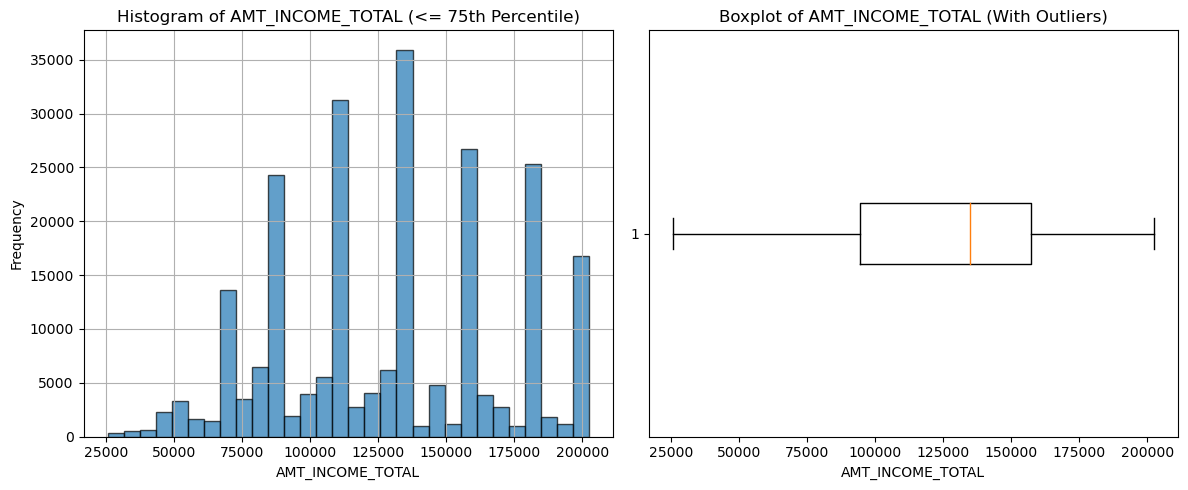

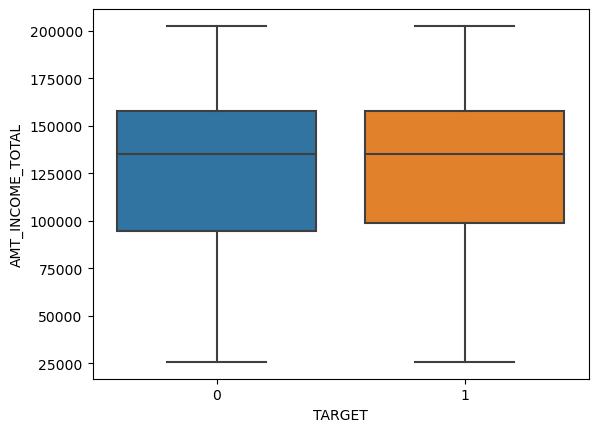

Percentile limit: 75th
Mean for target=0: 129569.3111813773
Mean for target=1: 129726.88429232471
t-statistic: -0.5178586743541969, p-value: 0.6045573625845206
No significant difference between the groups. 

Normality Assessment for AMT_INCOME_TOTAL (<= 50th Percentile):
Jarque-Bera Statistic: 8727.5683, p-value: 0.0000
Skewness: -0.4784
Kurtosis: 2.3316
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



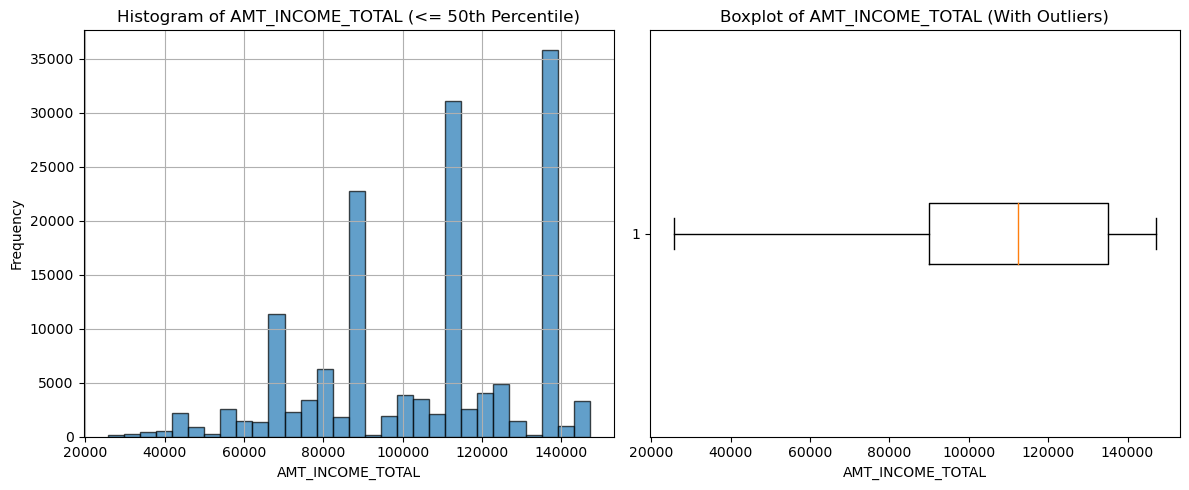

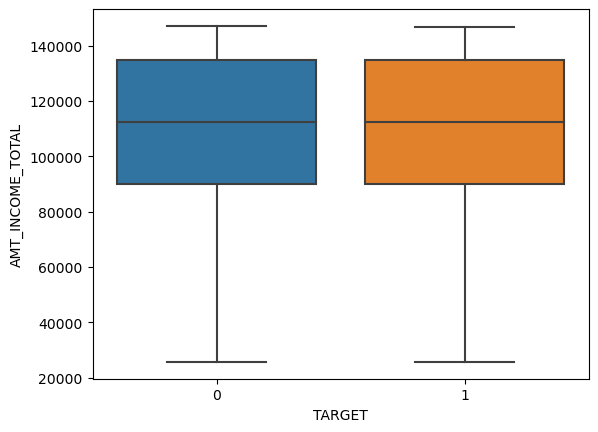

Percentile limit: 50th
Mean for target=0: 104910.27870762894
Mean for target=1: 105582.49946070879
t-statistic: -2.790562980422927, p-value: 0.005262294313162581
There is a significant difference between the groups. 

Normality Assessment for AMT_INCOME_TOTAL (<= 25th Percentile):
Jarque-Bera Statistic: 6887.2141, p-value: 0.0000
Skewness: -0.5992
Kurtosis: 2.5446
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



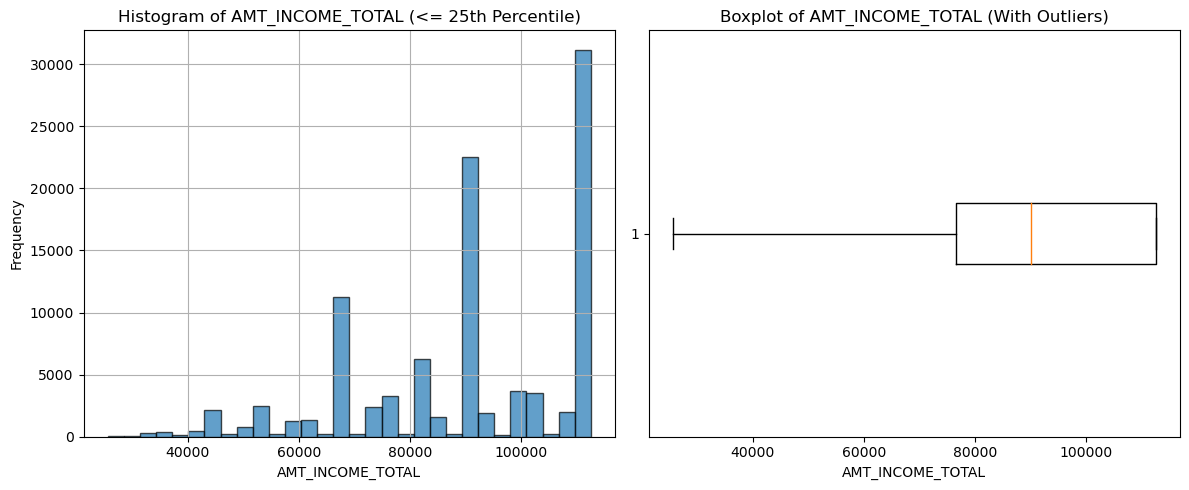

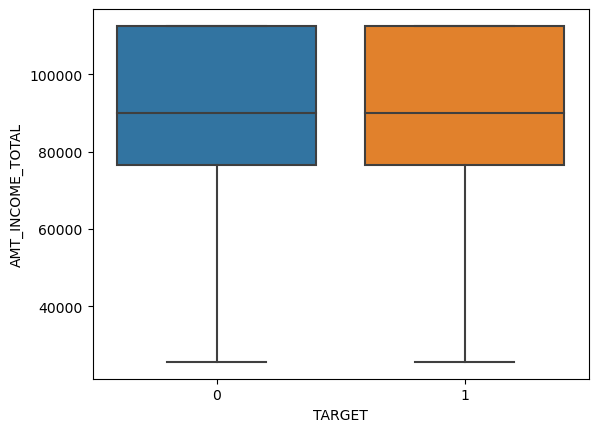

Percentile limit: 25th
Mean for target=0: 90202.63067021218
Mean for target=1: 91037.86479924197
t-statistic: -3.6303604636553612, p-value: 0.0002831660170950988
There is a significant difference between the groups. 



In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


# Function to plot histogram and boxplot with percentile filtering, while still showing outliers
def plot_histogram_and_boxplot(df, column_name, percentile=100):
    if column_name in df.columns and pd.api.types.is_numeric_dtype(df[column_name]):
        # Filter out extreme values above a given percentile, but still show outliers in boxplot
        threshold = np.percentile(df[column_name], percentile)
        filtered_data = df[df[column_name] <= threshold]
        
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        
        # Histogram
        axes[0].hist(filtered_data[column_name], bins=30, edgecolor='k', alpha=0.7)
        axes[0].set_title(f'Histogram of {column_name} (<= {percentile}th Percentile)')
        axes[0].set_xlabel(column_name)
        axes[0].set_ylabel('Frequency')
        axes[0].grid(True)
        
        # Boxplot with outliers still shown
        axes[1].boxplot(filtered_data[column_name], vert=False, showfliers=True)
        axes[1].set_title(f'Boxplot of {column_name} (With Outliers)')
        axes[1].set_xlabel(column_name)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"{column_name} is either not a column in the dataframe or not numeric.")

from scipy.stats import jarque_bera
from scipy.stats import skew, kurtosis

# Function to assess normality using Jarque-Bera test, skewness, and kurtosis, with percentile filtering
def assess_normality(df, column_name, percentile=100):
    if column_name in df.columns and pd.api.types.is_numeric_dtype(df[column_name]):
        # Filter the data to exclude values above a given percentile
        threshold = np.percentile(df[column_name], percentile)
        filtered_data = df[df[column_name] <= threshold][column_name].dropna()
        
        # Jarque-Bera test
        jb_stat, jb_pvalue = jarque_bera(filtered_data)
        
        # Descriptive statistics
        skewness = skew(filtered_data)
        kurt_value = kurtosis(filtered_data, fisher=False)
        
        # Display results
        print(f"Normality Assessment for {column_name} (<= {percentile}th Percentile):")
        print(f"Jarque-Bera Statistic: {jb_stat:.4f}, p-value: {jb_pvalue:.4f}")
        print(f"Skewness: {skewness:.4f}")
        print(f"Kurtosis: {kurt_value:.4f}")
        
        if jb_pvalue < 0.05:
            print("Conclusion: The data is likely not normally distributed (reject null hypothesis). \n")
        else:
            print("Conclusion: The data appears to be normally distributed (fail to reject null hypothesis). \n")
    else:
        print(f"{column_name} is either not a column in the dataframe or not numeric.")

import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np

# Function for bivariate analysis
def bivariate_analysis(df, numerical_feature, target, percentile=100):
    if numerical_feature in df.columns and pd.api.types.is_numeric_dtype(df[numerical_feature]):
        # Filter the data to exclude values above a given percentile
        threshold = np.percentile(df[numerical_feature], percentile)
        filtered_df = df[df[numerical_feature] <= threshold]
        
        # Boxplot to visualize the relationship
        sns.boxplot(x=target, y=numerical_feature, data=filtered_df)
        plt.show()  
        
        # Group means
        group_0 = filtered_df[filtered_df[target] == 0][numerical_feature]
        group_1 = filtered_df[filtered_df[target] == 1][numerical_feature]
        
        # t-test to check if means are significantly different
        t_stat, p_value = ttest_ind(group_0, group_1, nan_policy='omit')
        
        print(f"Percentile limit: {percentile}th")
        print(f"Mean for target=0: {group_0.mean()}")
        print(f"Mean for target=1: {group_1.mean()}")
        print(f"t-statistic: {t_stat}, p-value: {p_value}")
        
        if p_value < 0.05:
            print("There is a significant difference between the groups. \n")
        else:
            print("No significant difference between the groups. \n")
    else:
        print(f"{numerical_feature} is either not a column in the dataframe or not numeric.")


def numerical_analysis(df, column, target_column, percentile):
    """
    Perform a comprehensive numerical analysis on a specified column of a DataFrame.

    Parameters:
    - df: DataFrame to analyse
    - column: The name of the column for analysis
    - target_column: The target variable name for bivariate analysis
    - percentile: The percentile limit for analysis

    Returns:
    - None
    """
    # Assess normality
    assess_normality(df, column, percentile)

    # Plot histogram and boxplot
    plot_histogram_and_boxplot(df, column, percentile)

    # Perform bivariate analysis
    bivariate_analysis(df, column, target_column, percentile)



# Example usage:




numerical_analysis(application_train_cleaned, 'AMT_INCOME_TOTAL', "TARGET", 100)
numerical_analysis(application_train_cleaned, 'AMT_INCOME_TOTAL', "TARGET", 99)
numerical_analysis(application_train_cleaned, 'AMT_INCOME_TOTAL', "TARGET", 75)
numerical_analysis(application_train_cleaned, 'AMT_INCOME_TOTAL', "TARGET", 50)
numerical_analysis(application_train_cleaned, 'AMT_INCOME_TOTAL', 'TARGET', 25)


Observation : The income data has a strong positive skew due to a small number of very high-income individuals, which heavily distorts the distribution.
As you restrict the data by excluding the top percentiles (e.g., top 5% or top 10%), the distribution moves closer to normality. This is especially true for the 90th percentile, where skewness and kurtosis values suggest that the data is much more symmetrical and lacks extreme outliers.

### Observations:

- **Income Significance**: Income shows a **significant difference** in repayment probability above the 50th percentile, but it **diminishes in importance** when only looking up to the 75th percentile. Interestingly, income becomes significant again below the 50th and 25th percentiles.

#### Key Insights:
1. **Higher Income Correlation**:
   - Above the 75th percentile, income is **strongly correlated** with loan repayment probability, indicating that higher-income individuals are less likely to default.

2. **Diminished Predictive Power**:
   - Income **loses predictive power** up to the 75th percentiles, suggesting that other factors may play a more significant role in determining default probability within this range.

3. **Lower Income Significance**:
   - Below the 50th percentile, income **regains significance**. This suggests that for the lower earners, income is again a key factor in repayment probability.

4. **Threshold Effect**:
   - There seems to be a **nonlinear relationship** between income and repayment probability, with income mattering more for extreme high or low earners and less for the middle-income range.

5. **Intuition**:
   - **High-income borrowers** likely have more financial buffers, which lowers their default risk.
   - **Lower-income borrowers** may face other constraints, such as increased debt burden or less access to resources, which makes income alone more predictive of default risk.

#### Why Income Matters at Different Percentiles:

- **Above 75th Percentile**: Higher-income individuals are more likely to have disposable income and financial stability, making them less prone to default.
  
- **50th to 75th Percentile**: For mid-range income earners, **income variations may not be as impactful** on repayment probability, as other factors such as lifestyle, expenditures, or external support might offset income effects.

- **Below 50th Percentile**: Income becomes a **critical factor** for low earners, as their repayment ability is likely more sensitive to income variations. Factors such as limited financial safety nets and higher debt-to-income ratios play a role here.

#### Conclusion:
- Income is a **significant predictor** of repayment probability at both extremes (above the 75th percentile and below the 50th percentile). In the middle-income range, other factors may be more influential in determining default risk.



Normality Assessment for AMT_CREDIT (<= 100th Percentile):
Jarque-Bera Statistic: 31762.1916, p-value: 0.0000
Skewness: 1.1550
Kurtosis: 4.6550
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



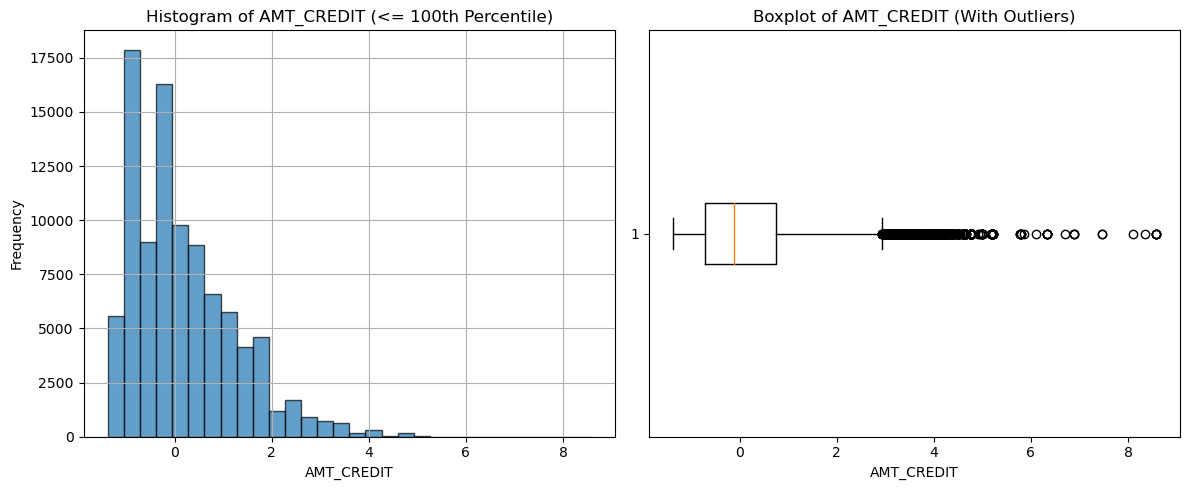

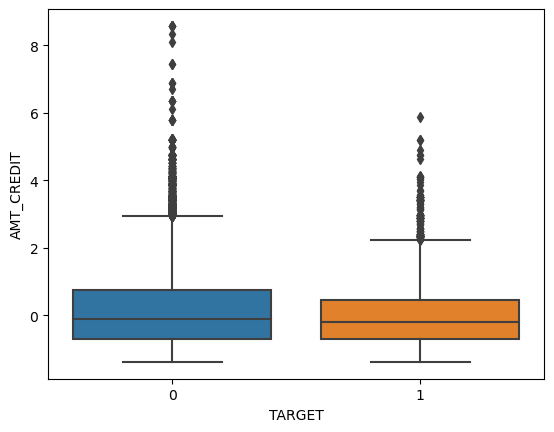

Percentile limit: 100th
Mean for target=0: 0.179056649812576
Mean for target=1: 0.012330981199246546
t-statistic: 12.525798920685657, p-value: 5.7622969777478896e-36
There is a significant difference between the groups. 

Normality Assessment for AMT_CREDIT (<= 99th Percentile):
Jarque-Bera Statistic: 12440.6969, p-value: 0.0000
Skewness: 0.8818
Kurtosis: 3.2823
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



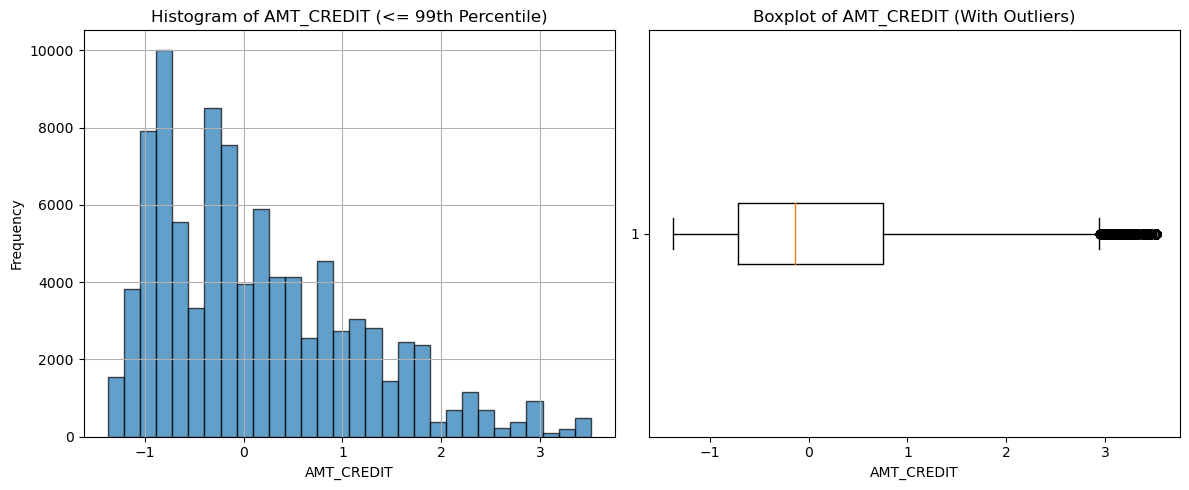

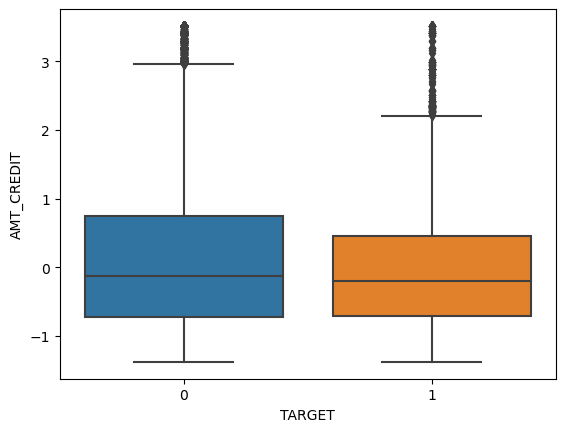

Percentile limit: 99th
Mean for target=0: 0.1418055136176506
Mean for target=1: -0.0003583519944261733
t-statistic: 11.374513098676209, p-value: 5.861393074745497e-30
There is a significant difference between the groups. 

Normality Assessment for AMT_CREDIT (<= 75th Percentile):
Jarque-Bera Statistic: 3927.1229, p-value: 0.0000
Skewness: 0.2457
Kurtosis: 1.9628
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



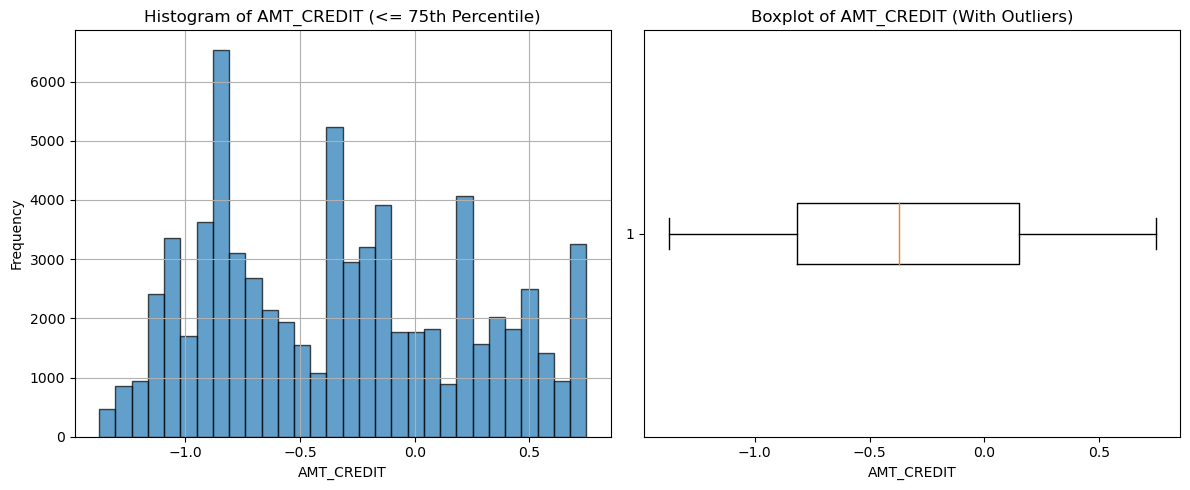

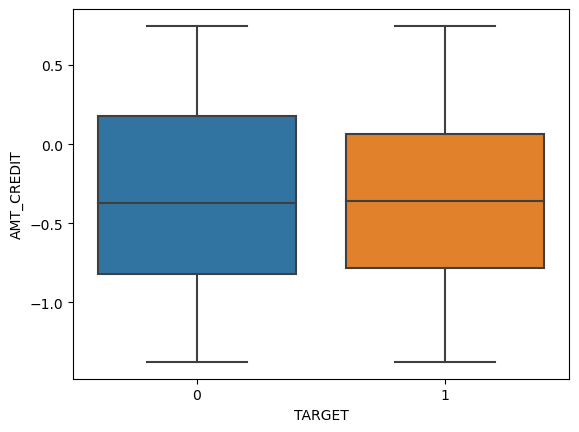

Percentile limit: 75th
Mean for target=0: -0.32673615084445135
Mean for target=1: -0.32342487967028055
t-statistic: -0.43036364948721, p-value: 0.6669324296364032
No significant difference between the groups. 

Normality Assessment for AMT_CREDIT (<= 50th Percentile):
Jarque-Bera Statistic: 2622.0324, p-value: 0.0000
Skewness: 0.0527
Kurtosis: 1.8502
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



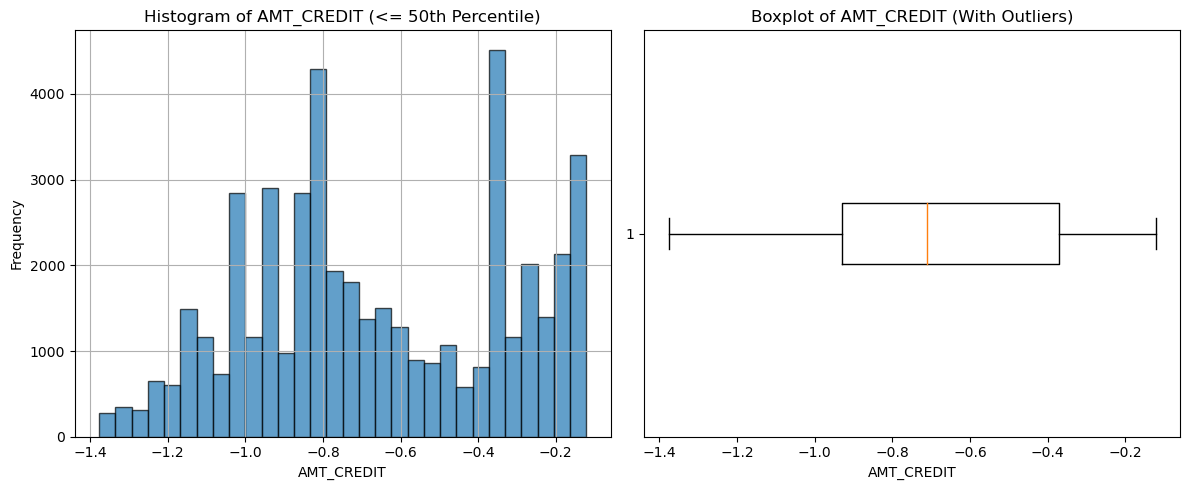

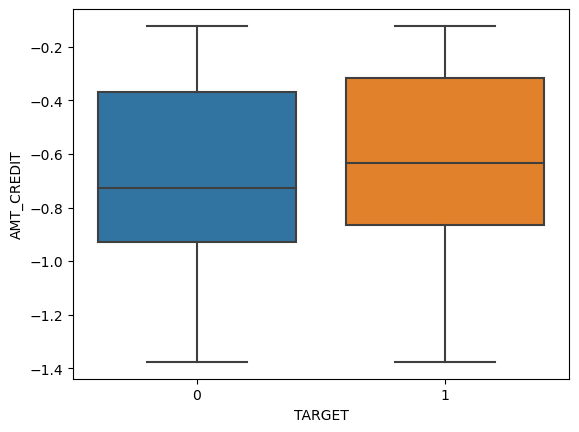

Percentile limit: 50th
Mean for target=0: -0.6694940004775516
Mean for target=1: -0.6113398077584267
t-statistic: -10.608825926427828, p-value: 2.902617933220273e-26
There is a significant difference between the groups. 

Normality Assessment for AMT_CREDIT (<= 25th Percentile):
Jarque-Bera Statistic: 1807.3114, p-value: 0.0000
Skewness: -0.6411
Kurtosis: 2.5681
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



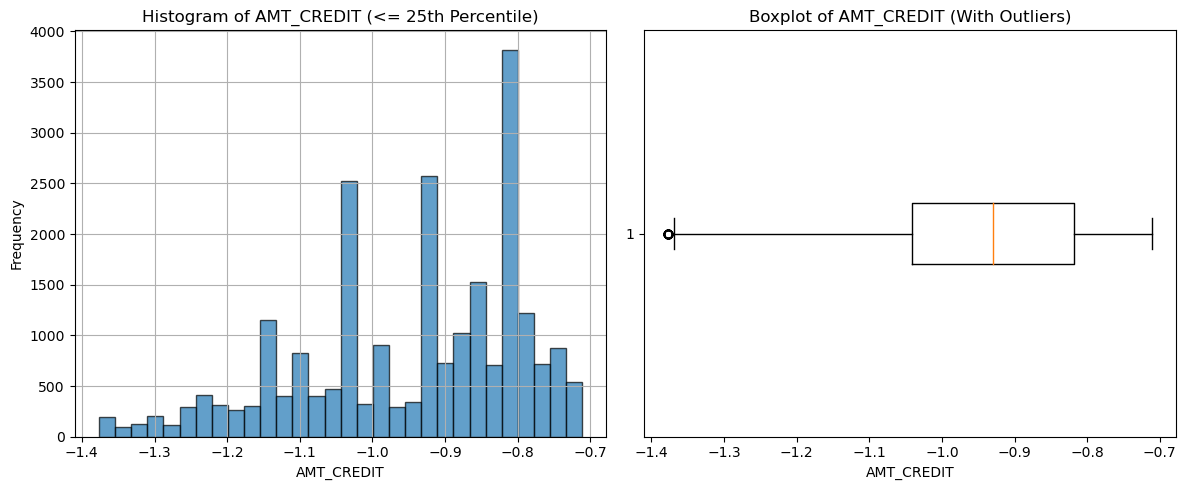

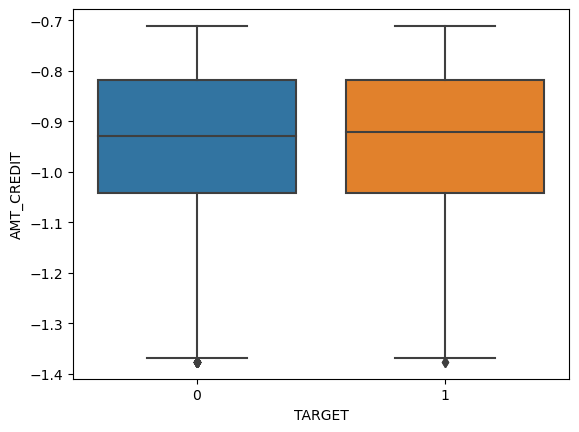

Percentile limit: 25th
Mean for target=0: -0.9493493690844598
Mean for target=1: -0.935724480117699
t-statistic: -3.551792742303061, p-value: 0.00038335851729548546
There is a significant difference between the groups. 



In [18]:

 
numerical_analysis(application_train_cleaned, 'AMT_CREDIT', "TARGET", 100)
numerical_analysis(application_train_cleaned, 'AMT_CREDIT', "TARGET", 99)
numerical_analysis(application_train_cleaned, 'AMT_CREDIT', "TARGET", 75)
numerical_analysis(application_train_cleaned, 'AMT_CREDIT', "TARGET", 50)
numerical_analysis(application_train_cleaned, 'AMT_CREDIT', "TARGET", 25)




### Observations:
`AMT_CREDIT` refers to the total loan or credit amount requested by borrowers.

### Normality Assessment:
- Across all percentiles, the data for AMT_CREDIT is **non-normal**, with high skewness and kurtosis indicating that a small number of borrowers request very high credit amounts.
- **100th Percentile**: Positive skew, heavy tail.
- As extreme values are removed, the skewness decreases but remains non-normal.

### Relationship to Target:
**Across all data**:
  Significant difference between defaulters and non-defaulters, with those not defaulting requesting higher average credits

**up to the 75th Percentile**:
  Significant difference vanishes here, defaulters and non defaulters on average are taking similar sized loans

**up to the 50th Percentile**:
  Below the median, a significant relationship emerges again, where defaulters are taking larger loans than non-defaulters

**up to the 25th Percentile**:
  In the lower quartile of the data, there is a significant difference, with defaulters requesting slightly higher credit amounts than non-defaulters

### Interpretation:
- Generally across all the data AMT_CREDIT is has a significant impact on default likelihood, with the only exception beiing ...
- At the **upper-middle class borowers** (50th-75th percentiles), borrowers might occupy a financial "gray zone," where they qualify for larger loans but may not have the full stability to ensure repayment. This increases the likelihood of default when granted higher credit loans, explaining the significance in this middle range.
- In the **lower quartile**, the presence of a significant relationship suggests that even smaller loan amounts can impact default probability. The difference in credit amounts here could reflect stricter lending practices, where only slightly larger loans among this group might correlate with higher risk, likely due to tighter financial margins.


Normality Assessment for AMT_ANNUITY (<= 100th Percentile):
Jarque-Bera Statistic: 409716.2042, p-value: 0.0000
Skewness: 1.6878
Kurtosis: 12.6318
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



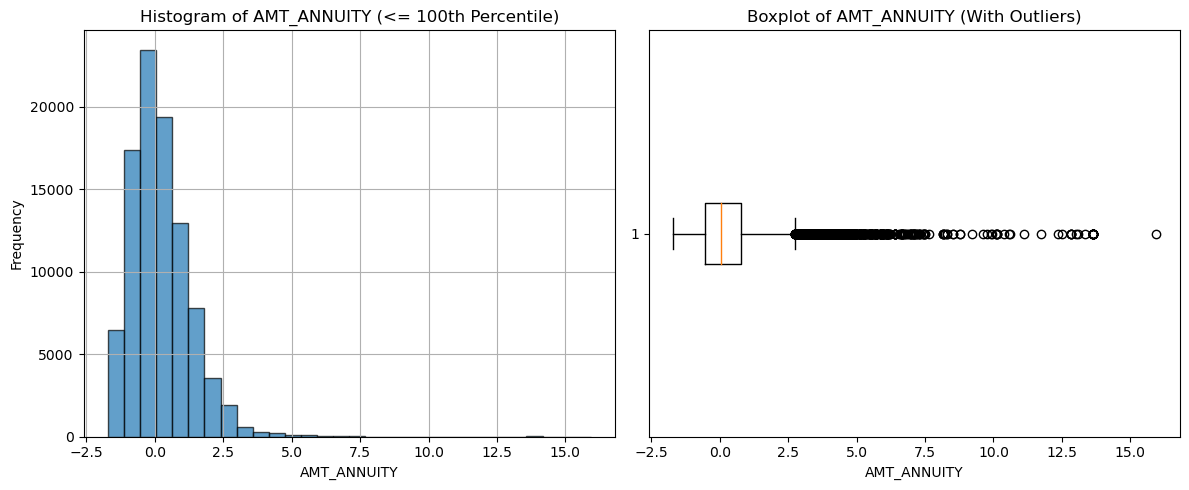

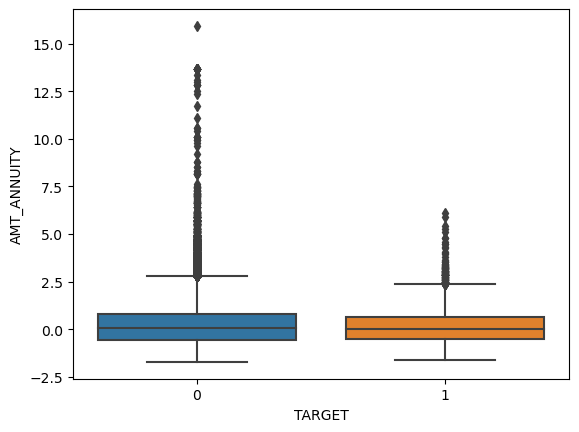

Percentile limit: 100th
Mean for target=0: 0.2204084831332387
Mean for target=1: 0.14143881794304253
t-statistic: 5.886691293509859, p-value: 3.953300929847888e-09
There is a significant difference between the groups. 

Normality Assessment for AMT_ANNUITY (<= 99th Percentile):
Jarque-Bera Statistic: 6230.3939, p-value: 0.0000
Skewness: 0.6321
Kurtosis: 3.0429
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



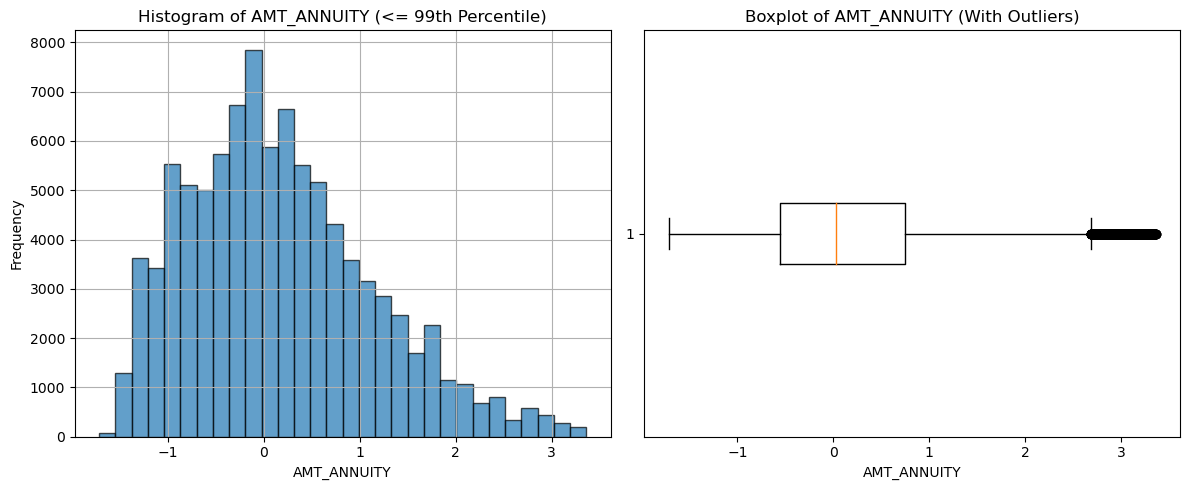

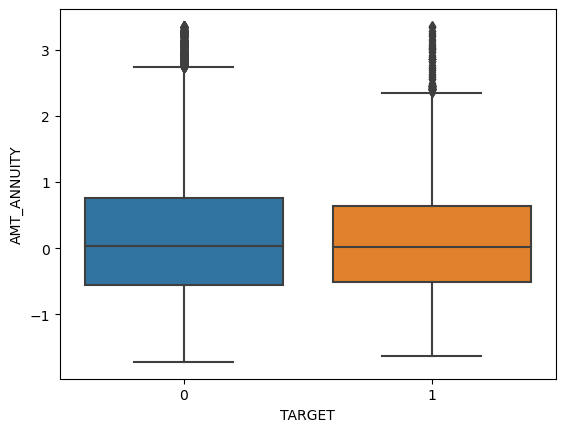

Percentile limit: 99th
Mean for target=0: 0.1705548238659709
Mean for target=1: 0.12821250408604085
t-statistic: 3.542546141666909, p-value: 0.00039647705366347905
There is a significant difference between the groups. 

Normality Assessment for AMT_ANNUITY (<= 75th Percentile):
Jarque-Bera Statistic: 3090.1187, p-value: 0.0000
Skewness: -0.1428
Kurtosis: 2.0175
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



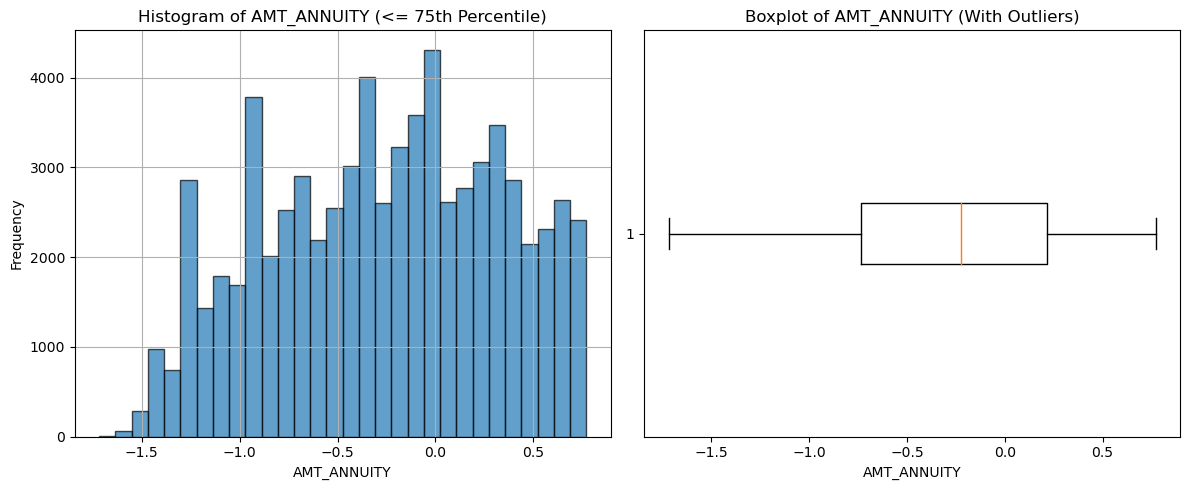

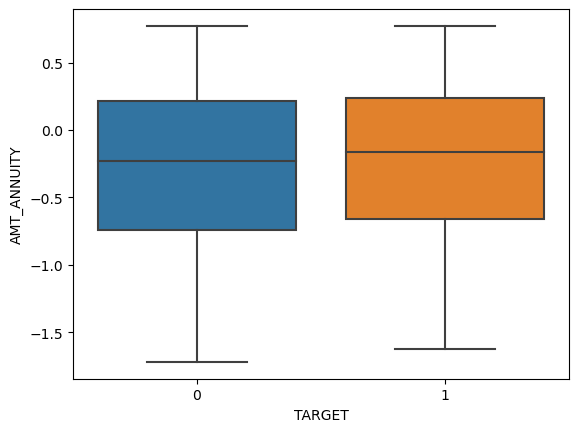

Percentile limit: 75th
Mean for target=0: -0.26826174842874606
Mean for target=1: -0.21917437887643393
t-statistic: -5.97616457855344, p-value: 2.2953986489124855e-09
There is a significant difference between the groups. 

Normality Assessment for AMT_ANNUITY (<= 50th Percentile):
Jarque-Bera Statistic: 2798.1874, p-value: 0.0000
Skewness: -0.2824
Kurtosis: 1.9495
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



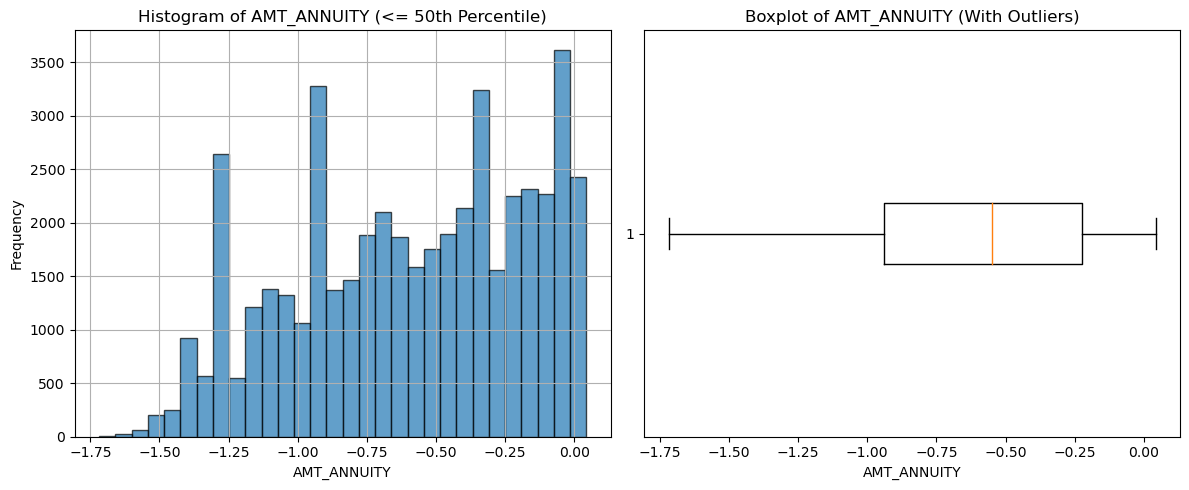

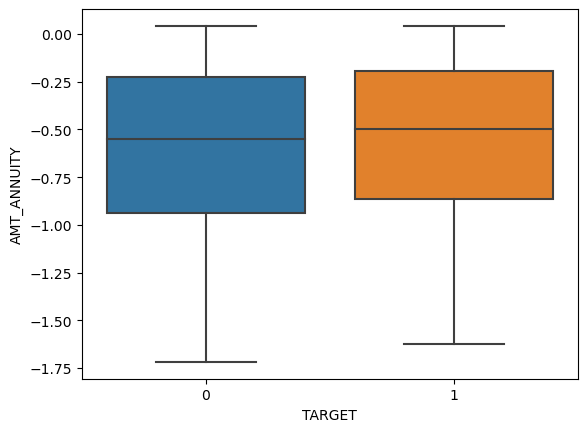

Percentile limit: 50th
Mean for target=0: -0.5968236504443013
Mean for target=1: -0.5537624617637202
t-statistic: -5.931961563436271, p-value: 3.014162246307198e-09
There is a significant difference between the groups. 

Normality Assessment for AMT_ANNUITY (<= 25th Percentile):
Jarque-Bera Statistic: 1121.4668, p-value: 0.0000
Skewness: -0.2862
Kurtosis: 2.0997
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



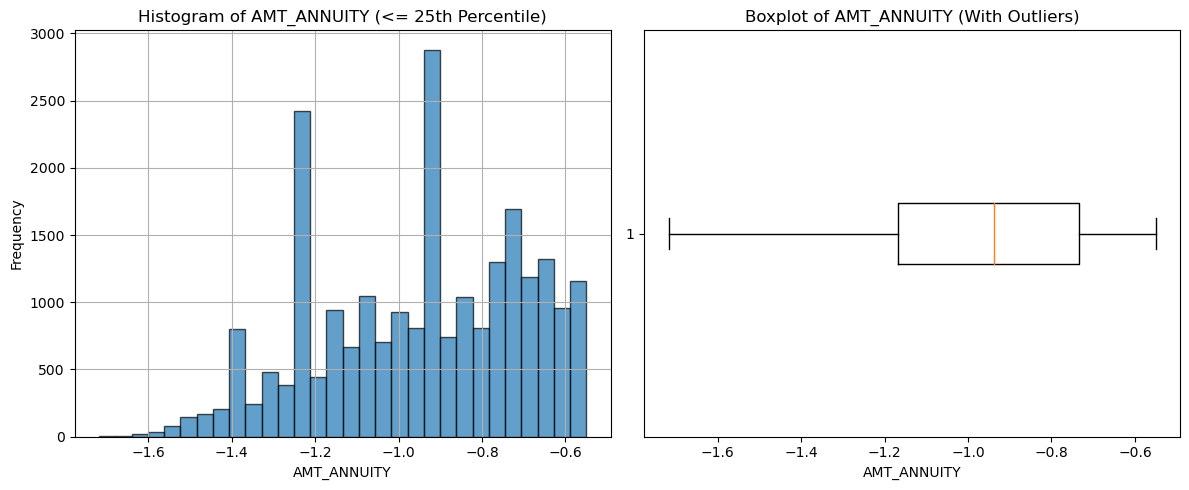

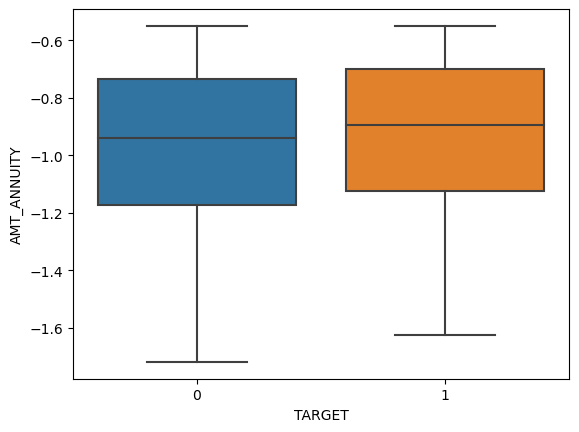

Percentile limit: 25th
Mean for target=0: -0.9551250300256509
Mean for target=1: -0.9203044959853153
t-statistic: -5.5161001591403265, p-value: 3.502337009766839e-08
There is a significant difference between the groups. 



In [19]:


numerical_analysis(application_train_cleaned, 'AMT_ANNUITY', "TARGET", 100)
numerical_analysis(application_train_cleaned, 'AMT_ANNUITY', "TARGET", 99)
numerical_analysis(application_train_cleaned, 'AMT_ANNUITY', "TARGET", 75)
numerical_analysis(application_train_cleaned, 'AMT_ANNUITY', "TARGET", 50)
numerical_analysis(application_train_cleaned, 'AMT_ANNUITY', "TARGET", 25)

## Observations:

### Skew Analysis:
- The normality assessments reveal that **AMT_ANNUITY** is **not normally distributed** across all percentiles, reflecting the pattern seen with income and credit. Annuities are derived from loan amounts and incomes, so it's natural to see a **positive skew** here—most people have smaller or moderate annuities, with a few outliers having significantly higher ones.
- As we move from the 100th to the 90th percentile, the **skewness reduces**, indicating fewer extreme values in the central part of the distribution. The **high kurtosis** in the upper percentile shows the presence of outliers, which become less prominent in lower percentiles.

### Relation to Target:
- A **significant relationship** is found between `AMT_ANNUITY` and loan repayment probability across all quartiles, indicating that annuity size plays a consistent role in influencing the likelihood of default.
.

### Interpretation:
- In the **lower quartile**, even though borrowers face financial challenges, their annuity amounts still play a role in determining repayment ability. This could reflect the thin margin for error in their financial situation, where any increase in annuity size can lead to greater strain.
- For those in the **upper quartile**, while they tend to have more financial stability, the size of their annuity still correlates with repayment behavior, perhaps due to a preference for maintaining a certain cash flow or lifestyle.
- In the **middle-to-upper range**, borrowers fall into a **financial gray zone**, where they are stable enough to handle moderate annuities but not immune to the pressures of higher payments. This group remains sensitive to fluctuations in annuity obligations, making them more likely to default when annuities increase.


In [ ]:
numerical_analysis(application_train_cleaned, 'AMT_GOODS_PRICE', "TARGET", 100)
numerical_analysis(application_train_cleaned, 'AMT_GOODS_PRICE', "TARGET", 99)
numerical_analysis(application_train_cleaned, 'AMT_GOODS_PRICE', "TARGET", 75)
numerical_analysis(application_train_cleaned, 'AMT_GOODS_PRICE', "TARGET", 50)
numerical_analysis(application_train_cleaned, 'AMT_GOODS_PRICE', "TARGET", 25)

### Observations:

**Skewness:**
Positively skewed across all percentiles, indicating that most goods are priced lower, with some high outliers.
The skew decreases as extreme values are removed, but the data remains non-normal across percentiles.
Relationship to Target:

**100th Percentile:**
Non-defaulters tend to have higher-priced goods compared to defaulters, and the difference is significant.

**Up to the 75th and 25th Percentiles:**
There is no significant difference in goods prices between defaulters and non-defaulters.

**50th Percentile:**
Defaulters tend to have higher-priced goods than non-defaulters, with a significant difference.

**Interpretation:**

In the lower to middle percentiles (up to the 50th), higher-priced goods are associated with a higher probability of default, suggesting that borrowers in these ranges may be overextending themselves financially. However when capping our data at the 75th and 25th percentiles, the price of goods seems less predictive of default, likely reflecting financial stability at the top and limited access to credit at the bottom.

### Key Takeaways from Univariate and Bivariate Analysis:

- **Nonlinearity of Relationships**: The relationship between features and loan repayment probability is non-linear, with varying influences across different percentiles.
  
- **Financial Gray Zone**: Borrowers around the median and upper quartiles are more sensitive to changes in loan amounts and obligations, indicating less financial resilience.

- **Overextension**: In the lower to median quartiles, higher-priced goods significantly increase default likelihood, suggesting overextension in these segments.

- **Impact of Outliers**: High outliers (100th percentile) skew the data, complicating interpretation and analysis.

- **Approaching Normality**: As extreme values are filtered out, the data becomes closer to normal, though skewness persists in upper percentiles.


c:\Users\david\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


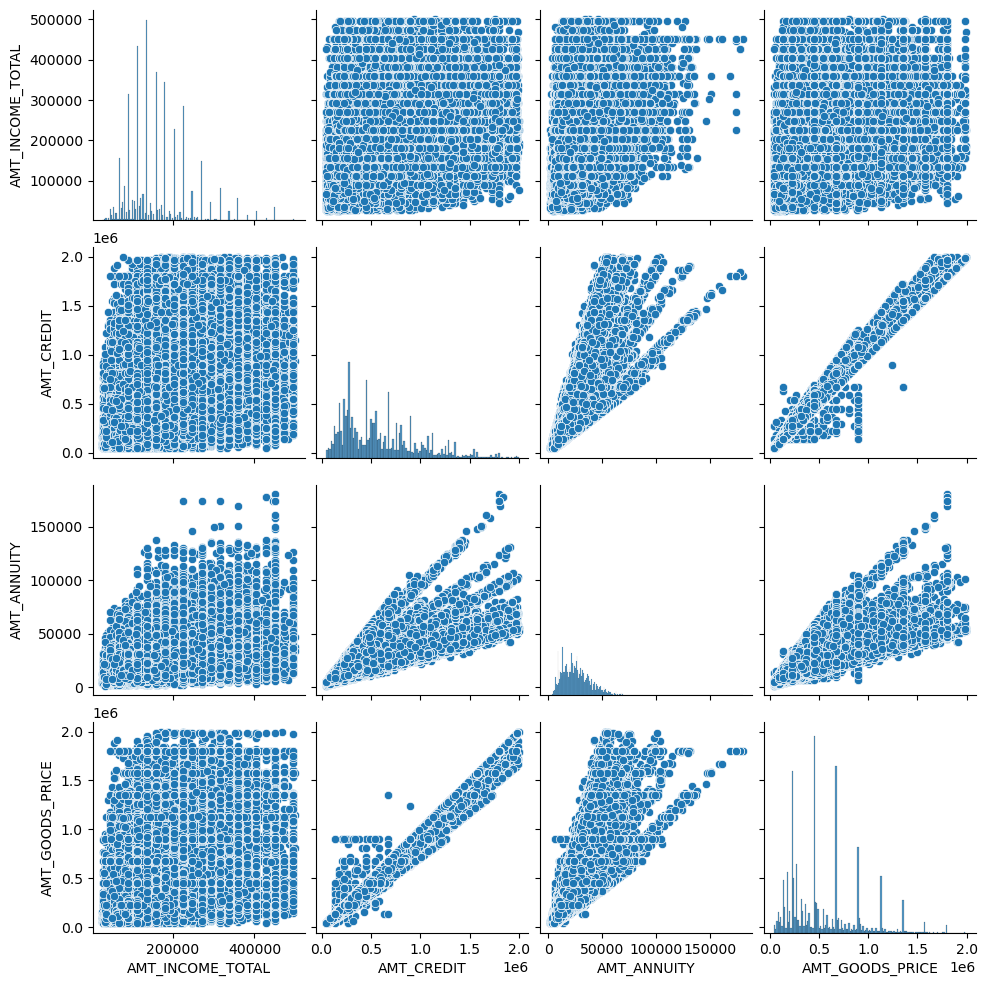

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the core numerical features you want to explore
selected_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Filter out outliers for better visualization
filtered_data = application_train[(application_train['AMT_INCOME_TOTAL'] < 500000) & 
                                  (application_train['AMT_CREDIT'] < 2000000)]

# Plot pairwise relationships with the filtered data
sns.pairplot(filtered_data[selected_features])
plt.show()


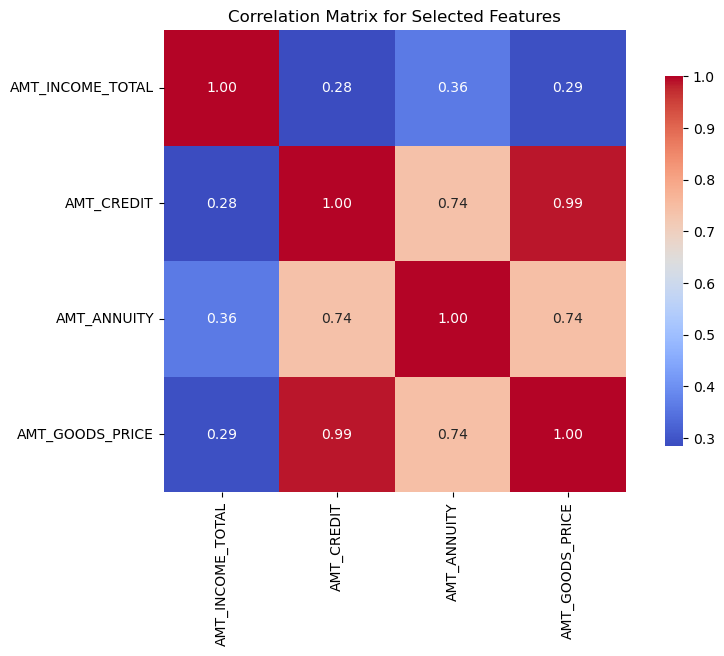

In [22]:
# Assuming application_train_cleaned is your DataFrame
selected_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Calculate the correlation matrix
correlation_matrix = application_train_cleaned[selected_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title
plt.title('Correlation Matrix for Selected Features')
plt.show()

1. **AMT_CREDIT vs AMT_ANNUITY**  
   Positive correlation: Larger loans lead to higher annuities. Spread indicates different loan terms or interest rates.  
   Insight: Variability in annuity reflects differing borrower profiles or financial conditions.

2. **AMT_CREDIT vs AMT_GOODS_PRICE**  
   Strong linear relationship: Loan amounts scale predictably with the price of goods.  
   Insight: Credit closely tied to asset value, typical in large asset financing.

3. **AMT_ANNUITY vs AMT_GOODS_PRICE**  
   Linear trend: Higher-priced goods result in higher annuities. Wider spread indicates influence of loan terms or interest rates.  
   Insight: Annuity variation reflects diverse financial agreements.

4. **AMT_INCOME_TOTAL vs Other Features**  
   Weak relationship: No strong correlation between income and loan size, annuity, or goods price.  
   Insight: Loan size is influenced by factors other than income, such as credit scores or collateral.


## Analyis of time related features

In [23]:
# Select columns that start with 'DAYS'
days_columns = [col for col in application_train_cleaned.columns if col.startswith('DAYS')]
# Apply absolute value to each of those columns
application_train_cleaned[days_columns] = application_train_cleaned[days_columns].abs()
application_train_cleaned[days_columns].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
2     0.689509       0.453299           0.206116         0.306869   
6     0.517645       0.473862           1.071033         1.573557   
7     0.644596       0.454884           0.110455         0.407568   
13    0.447068       0.473140           1.232832         1.269867   
15    1.674846       0.459896           0.423551         1.077349   

    DAYS_LAST_PHONE_CHANGE  
2                 0.178831  
6                 0.724644  
7                 0.129584  
13                1.159713  
15                0.045789

Normality Assessment for DAYS_BIRTH (<= 100th Percentile):
Jarque-Bera Statistic: 4663.3582, p-value: 0.0000
Skewness: 0.3560
Kurtosis: 2.1762
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



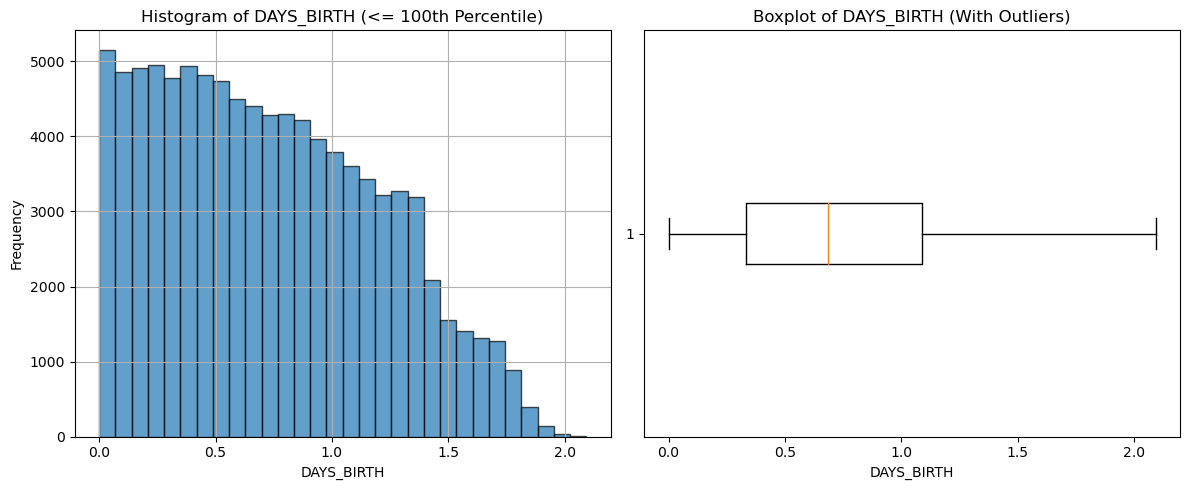

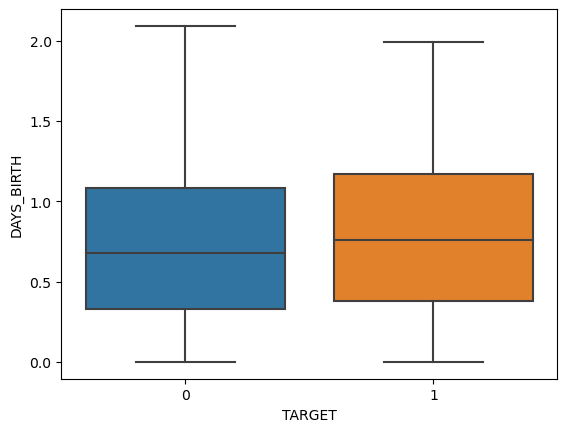

Percentile limit: 100th
Mean for target=0: 0.7267272733212043
Mean for target=1: 0.7897687516346651
t-statistic: -10.858112043685566, p-value: 1.8943766228684018e-27
There is a significant difference between the groups. 



In [24]:

numerical_analysis(application_train_cleaned, "DAYS_BIRTH", "TARGET", 100)


Normality Assessment for DAYS_EMPLOYED (<= 95th Percentile):
Jarque-Bera Statistic: 14280.6348, p-value: 0.0000
Skewness: 0.9696
Kurtosis: 3.2473
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



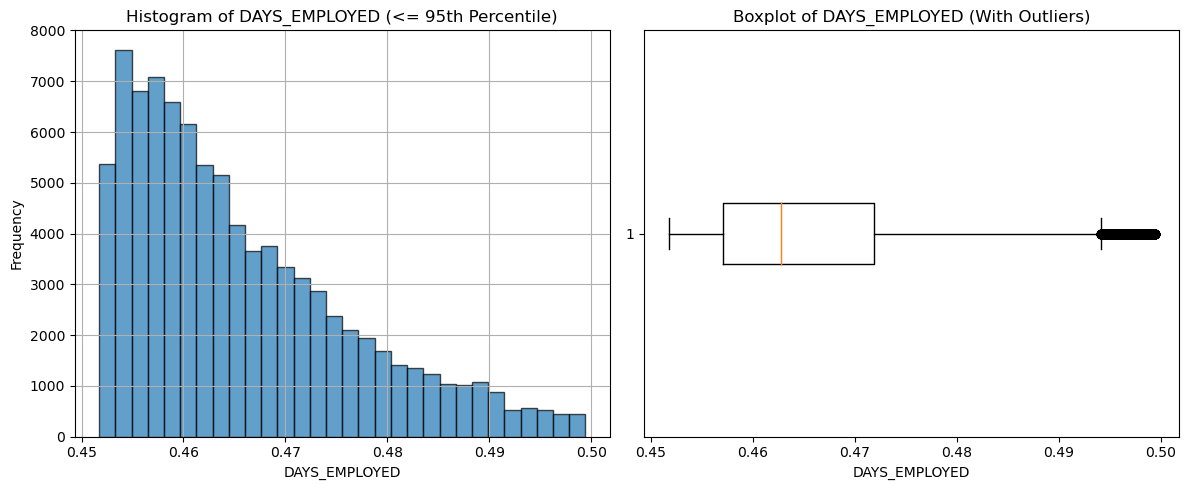

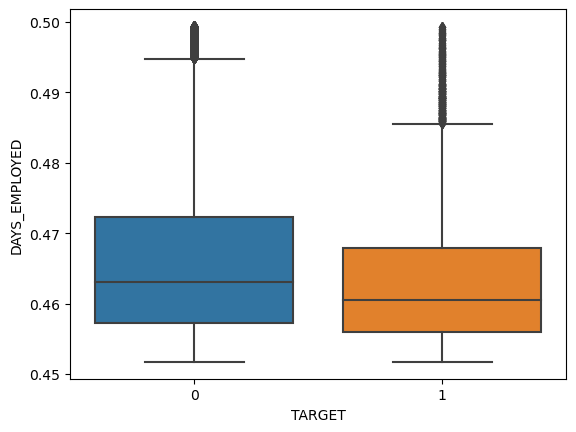

Percentile limit: 95th
Mean for target=0: 0.4658570199743652
Mean for target=1: 0.4633144987779036
t-statistic: 18.806790461622946, p-value: 9.426396859553239e-79
There is a significant difference between the groups. 



In [25]:
# Define the threshold for outliers
threshold = 50000

# Drop the rows where DAYS_EMPLOYED is greater than the threshold
application_train_cleaned = application_train_cleaned[application_train_cleaned["DAYS_EMPLOYED"] <= threshold]
# this was neccesary as there was a misinput in the data which suggested an indiviudal had been working hard since 400BC  massively skewing the graphs

numerical_analysis(application_train_cleaned, "DAYS_EMPLOYED", "TARGET", 95)


Normality Assessment for DAYS_REGISTRATION (<= 100th Percentile):
Jarque-Bera Statistic: 4905.6579, p-value: 0.0000
Skewness: 0.5136
Kurtosis: 3.4385
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



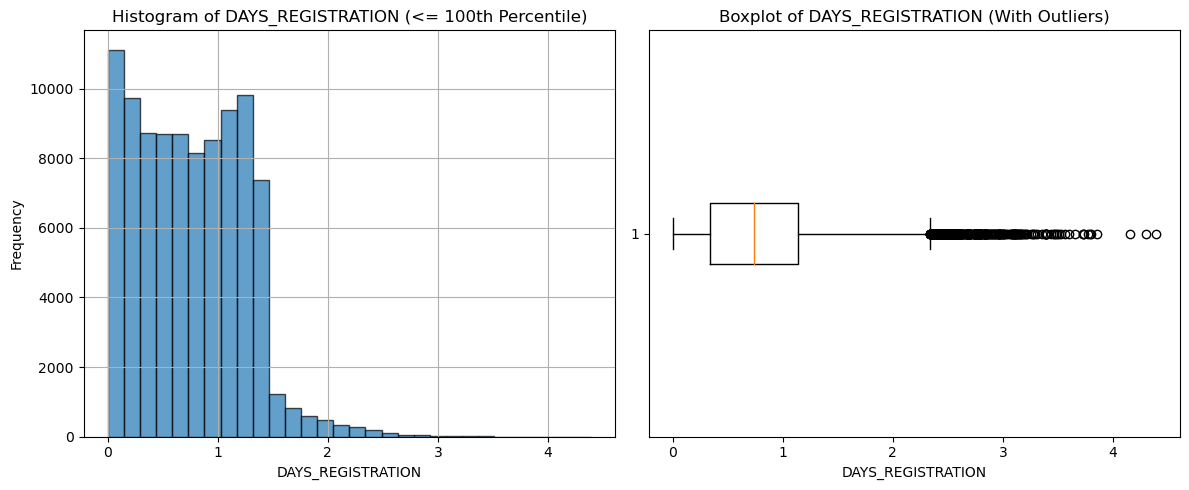

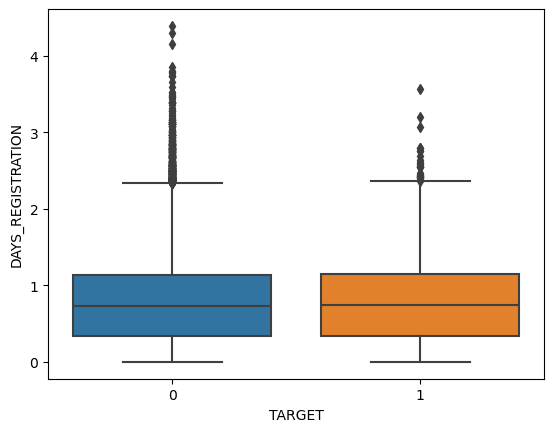

Percentile limit: 100th
Mean for target=0: 0.7571099329065528
Mean for target=1: 0.7583040501518413
t-statistic: -0.19794832588571679, p-value: 0.8430859198373319
No significant difference between the groups. 



In [26]:

numerical_analysis(application_train_cleaned, "DAYS_REGISTRATION", "TARGET", 100)

Normality Assessment for DAYS_ID_PUBLISH (<= 100th Percentile):
Jarque-Bera Statistic: 2891.7135, p-value: 0.0000
Skewness: 0.2254
Kurtosis: 2.2706
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



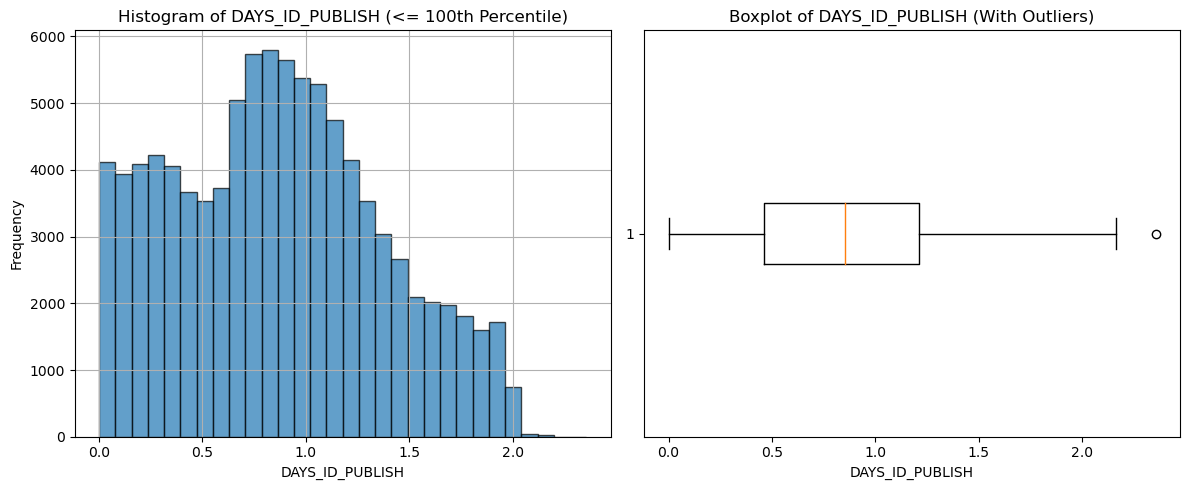

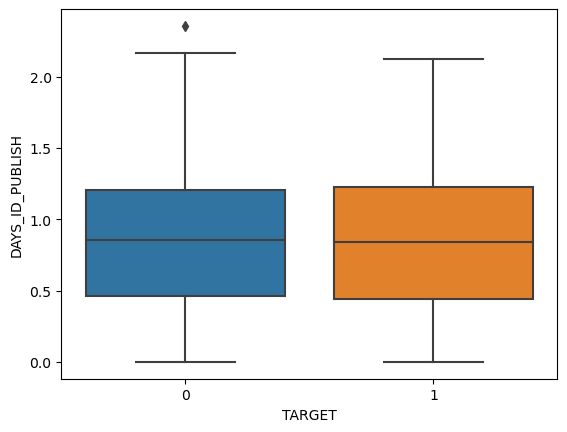

Percentile limit: 100th
Mean for target=0: 0.8683868301542763
Mean for target=1: 0.8664474203426806
t-statistic: 0.3116521632847737, p-value: 0.7553055748373134
No significant difference between the groups. 



In [27]:

numerical_analysis(application_train_cleaned, "DAYS_ID_PUBLISH", "TARGET", 100)

Normality Assessment for DAYS_LAST_PHONE_CHANGE (<= 100th Percentile):
Jarque-Bera Statistic: 29675.1380, p-value: 0.0000
Skewness: 1.0591
Kurtosis: 4.7488
Conclusion: The data is likely not normally distributed (reject null hypothesis). 



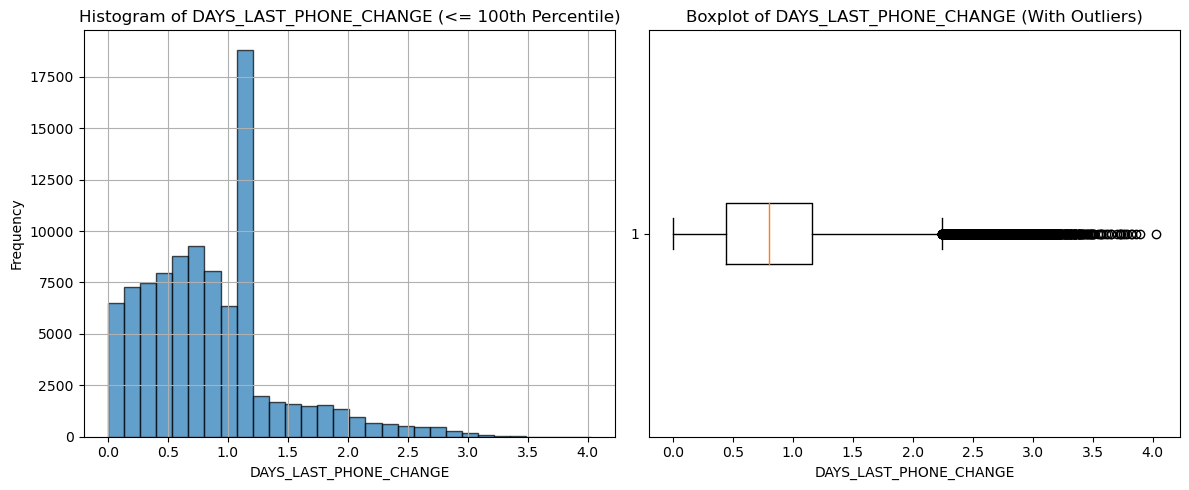

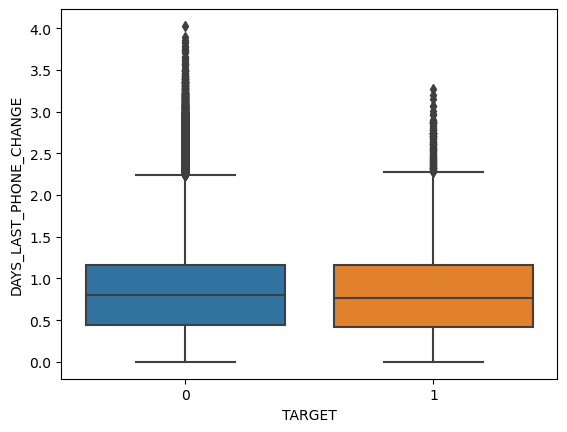

Percentile limit: 100th
Mean for target=0: 0.8645877466227126
Mean for target=1: 0.8015463151875035
t-statistic: 9.068831160580888, p-value: 1.2252676381764925e-19
There is a significant difference between the groups. 



In [28]:
# Replace zeros in 'DAYS_LAST_PHONE_CHANGE' with its median value
application_train_cleaned['DAYS_LAST_PHONE_CHANGE'].replace(0, application_train_cleaned['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)
#this had no missing values in the original dataframe I think it's likely these were replaced with zero, hence i will be replacing them with the median
numerical_analysis(application_train_cleaned, "DAYS_LAST_PHONE_CHANGE", "TARGET", 100)

### Analysis of Time-Related Features

The analysis of various time-related features reveals consistent trends regarding loan repayment behavior. In general, non-defaulters tend to exhibit:

- **Longer durations** in various aspects of their lives, such as employment and registration periods.
- A **higher mean** in features related to their time-related history, suggesting stability and reliability.
- **Significant differences** when compared to defaulters, indicating that longer time frames in these contexts are associated with lower default rates.

These trends suggest that stability and a longer history in employment, registration, and contact details correlate positively with an applicant's likelihood to repay loans, suggesting that these features are informative of an applicants character, reinforcing the importance of these features in assessing credit risk.



## Analysis of Property Descriptors with target

In [29]:
def count_flags(df):
    """Counts the occurrences of 1s and 0s in the flag columns of the DataFrame."""
    flag_columns = [col for col in df.columns if col.startswith('FLAG_')]  # Identify flag columns
    flag_counts = {}

    for col in flag_columns:
        counts = df[col].value_counts()  # Count 1s and 0s
        flag_counts[col] = counts

    return flag_counts

# Example usage
flag_counts = count_flags(application_train_cleaned)

# Display the counts for each flag column
for flag_col, counts in flag_counts.items():
    print(f"Counts for {flag_col}:")
    print(counts)
    print()


Counts for FLAG_OWN_CAR:
FLAG_OWN_CAR
Y    94399
Name: count, dtype: int64

Counts for FLAG_OWN_REALTY:
FLAG_OWN_REALTY
1    64619
0    29780
Name: count, dtype: int64

Counts for FLAG_MOBIL:
FLAG_MOBIL
1    94399
Name: count, dtype: int64

Counts for FLAG_EMP_PHONE:
FLAG_EMP_PHONE
1    94383
0       16
Name: count, dtype: int64

Counts for FLAG_WORK_PHONE:
FLAG_WORK_PHONE
0    72886
1    21513
Name: count, dtype: int64

Counts for FLAG_CONT_MOBILE:
FLAG_CONT_MOBILE
1    94174
0      225
Name: count, dtype: int64

Counts for FLAG_PHONE:
FLAG_PHONE
0    68659
1    25740
Name: count, dtype: int64

Counts for FLAG_EMAIL:
FLAG_EMAIL
0    87720
1     6679
Name: count, dtype: int64

Counts for FLAG_DOCUMENT_2:
FLAG_DOCUMENT_2
0    94395
1        4
Name: count, dtype: int64

Counts for FLAG_DOCUMENT_3:
FLAG_DOCUMENT_3
1    64989
0    29410
Name: count, dtype: int64

Counts for FLAG_DOCUMENT_4:
FLAG_DOCUMENT_4
0    94392
1        7
Name: count, dtype: int64

Counts for FLAG_DOCUMENT_5:
FLAG_DO

Running bivariate analysis for APARTMENTS_AVG


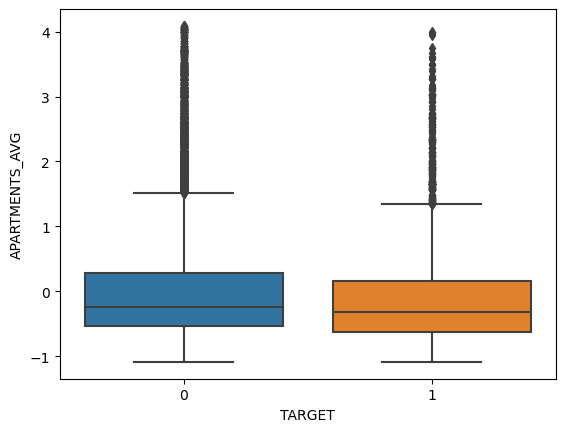

Percentile limit: 99th
Mean for target=0: -0.01263809891870455
Mean for target=1: -0.09643341737084019
t-statistic: 4.9782024972316234, p-value: 6.441745666332662e-07
There is a significant difference between the groups. 

Running bivariate analysis for BASEMENTAREA_AVG


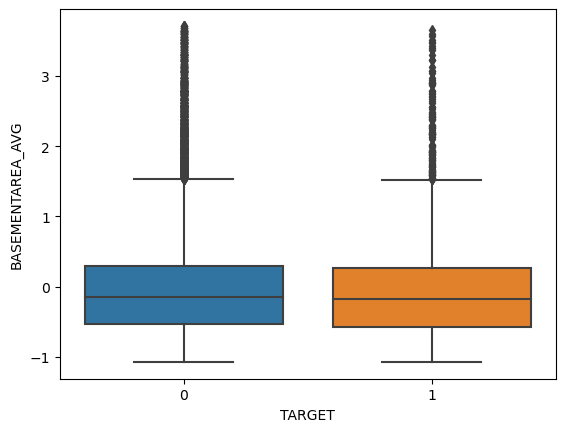

Percentile limit: 99th
Mean for target=0: -0.030074776698615455
Mean for target=1: -0.07916466943616306
t-statistic: 2.890125533941057, p-value: 0.003853090229677963
There is a significant difference between the groups. 

Running bivariate analysis for YEARS_BEGINEXPLUATATION_AVG


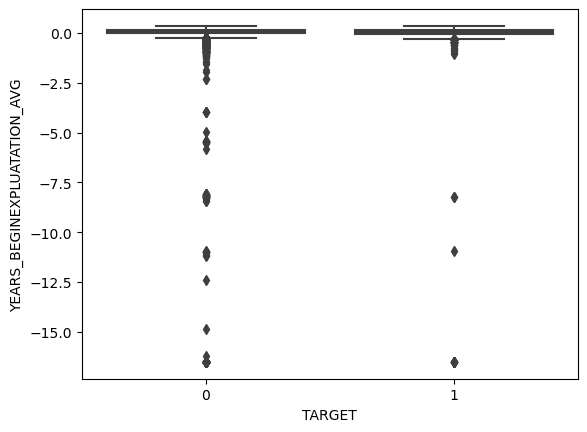

Percentile limit: 99th
Mean for target=0: 0.006219552099309295
Mean for target=1: -0.008874547203276054
t-statistic: 0.7909236576962269, p-value: 0.428992598657679
No significant difference between the groups. 

Running bivariate analysis for YEARS_BUILD_AVG


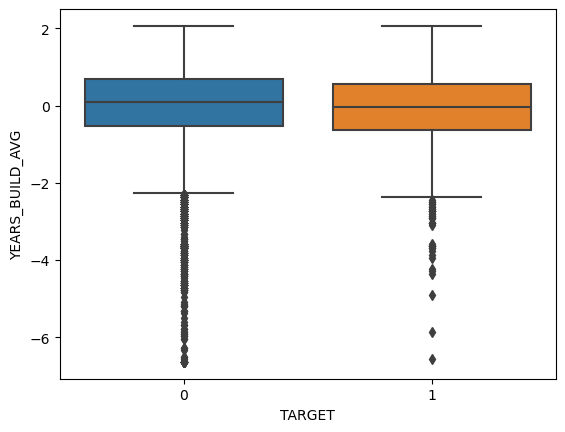

Percentile limit: 99th
Mean for target=0: 0.05281679617279667
Mean for target=1: -0.05133110627910162
t-statistic: 4.406193638163844, p-value: 1.0556048165324406e-05
There is a significant difference between the groups. 

Running bivariate analysis for COMMONAREA_AVG


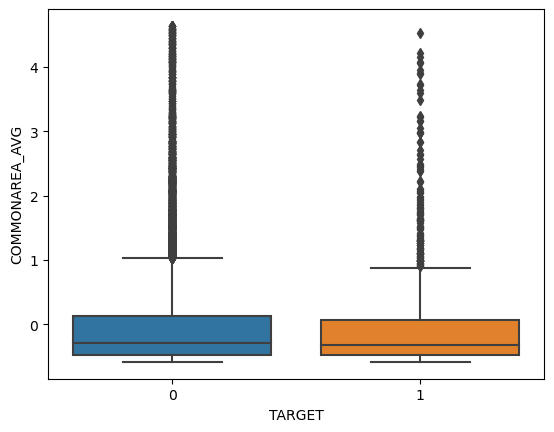

Percentile limit: 99th
Mean for target=0: -0.02924451590402871
Mean for target=1: -0.08064133686725924
t-statistic: 2.8521134664875536, p-value: 0.0043461955113128494
There is a significant difference between the groups. 

Running bivariate analysis for ELEVATORS_AVG


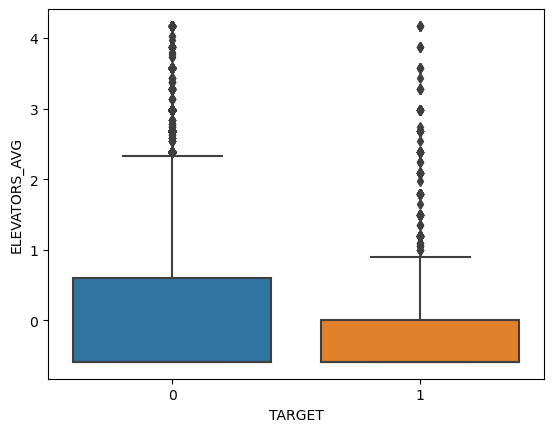

Percentile limit: 99th
Mean for target=0: 0.019255364718904534
Mean for target=1: -0.10286106080522081
t-statistic: 6.658019613145187, p-value: 2.8091535144655175e-11
There is a significant difference between the groups. 

Running bivariate analysis for ENTRANCES_AVG


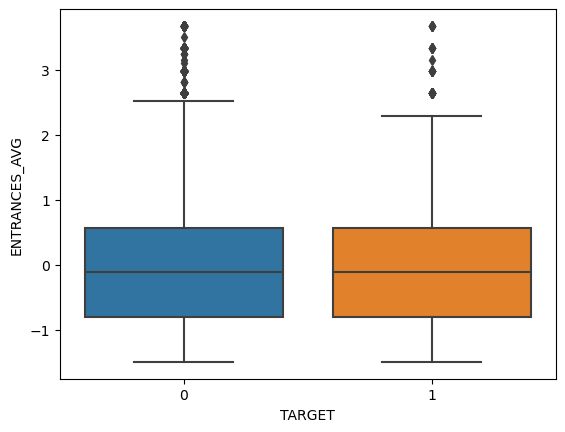

Percentile limit: 99th
Mean for target=0: -0.03370083398308581
Mean for target=1: -0.06248763958103126
t-statistic: 1.7537582539744223, p-value: 0.0794787882973138
No significant difference between the groups. 

Running bivariate analysis for FLOORSMAX_AVG


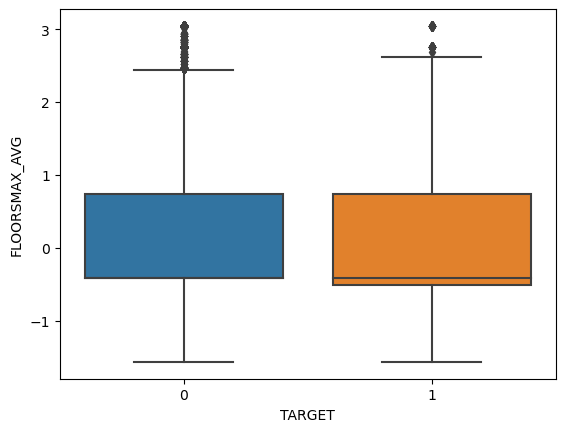

Percentile limit: 99th
Mean for target=0: 0.03999381042038486
Mean for target=1: -0.12899730665304815
t-statistic: 9.157844519970709, p-value: 5.508861526761717e-20
There is a significant difference between the groups. 

Running bivariate analysis for FLOORSMIN_AVG


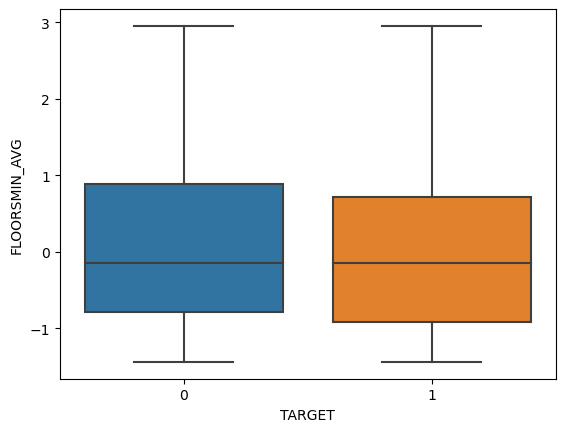

Percentile limit: 99th
Mean for target=0: 0.031367857406007685
Mean for target=1: -0.1131587698078276
t-statistic: 6.212079870516256, p-value: 5.298889146913589e-10
There is a significant difference between the groups. 

Running bivariate analysis for LANDAREA_AVG


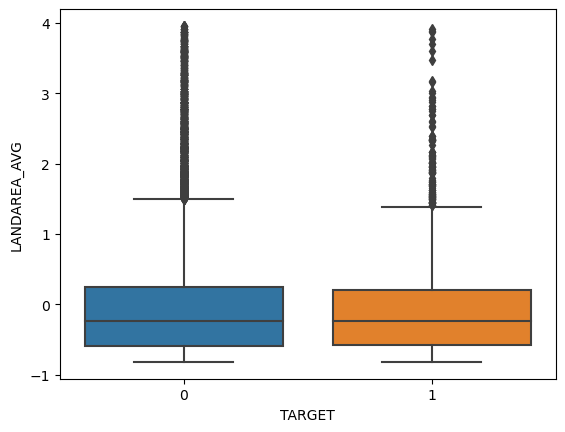

Percentile limit: 99th
Mean for target=0: -0.04838949628069413
Mean for target=1: -0.07144072032711742
t-statistic: 1.426618395206925, p-value: 0.15369847356839306
No significant difference between the groups. 

Running bivariate analysis for LIVINGAPARTMENTS_AVG


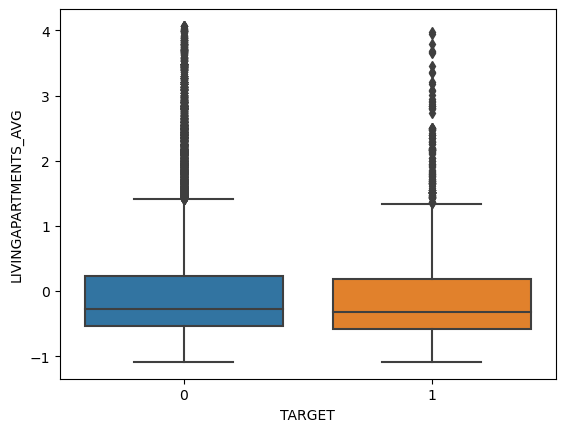

Percentile limit: 99th
Mean for target=0: -0.01590477162732995
Mean for target=1: -0.09565959845529183
t-statistic: 3.916733054365573, p-value: 8.996341337995922e-05
There is a significant difference between the groups. 

Running bivariate analysis for LIVINGAREA_AVG


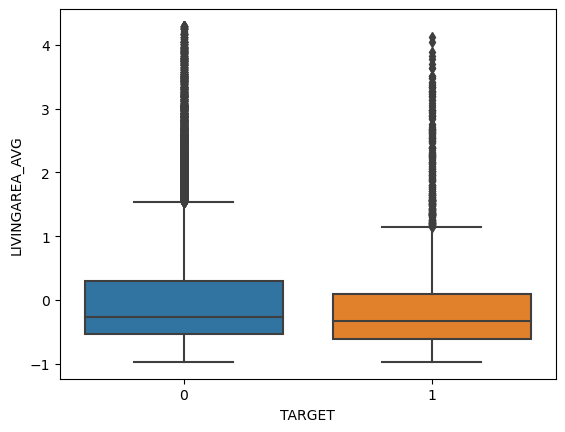

Percentile limit: 99th
Mean for target=0: 0.004433777195979368
Mean for target=1: -0.10236969662409978
t-statistic: 6.364359139852964, p-value: 1.9799479411543372e-10
There is a significant difference between the groups. 



In [30]:
# property descriptors:
# List of columns to loop through
columns = [
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ELEVATORS_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG'
]



for col in columns:
    # Filter the DataFrame to include only rows where the flag column is 1
    filtered_data = application_train_cleaned[application_train_cleaned[f'FLAG_{col}'] == 1]
    
    if not filtered_data.empty:  # Check if the filtered DataFrame is not empty
        print(f"Running bivariate analysis for {col}")
        bivariate_analysis(filtered_data, col, 'TARGET', percentile=99)
    else:
        print(f"No valid data for {col} to run bivariate analysis.")

### Analysis of Property Descriptors and Loan Default

In the subset of data where property descriptor information is available, our analysis indicates that non-defaulters tend to purchase larger properties, including features such as:

- **Larger Basements**: Non-defaulters often have larger average basement areas, which may reflect the overall size and value of the property.
- **Greater Living Area**: The average living space is also larger among non-defaulters, suggesting a correlation between property size and financial stability.
- **Expanded Common Areas**: Non-defaulters possess more communal spaces, which could be indicative of higher-quality housing options.

#### Potential Reasonings:
1. **Financial Stability**: Borrowers who can afford larger properties may have better financial health, contributing to their ability to meet loan repayments.
2. **Property Value**: Larger properties may have higher market values, providing more collateral for the loan and less risk for lenders.
3. **Lifestyle Choices**: The choice to invest in larger living spaces might reflect a stable lifestyle, reducing the likelihood of default.

This insight underscores the importance of considering property features in assessing loan applications and predicting repayment behavior.


# to dos #

Turn ages into positive years

categorical visualisation and analysis for application_train
prior to encoding

EDA for Credit_Card_Balance.csv
EDA for bureua.csv



Scale everything numerical




save cleaned data


pipelines for data processing and cleaning and feature creation and encoding, and scaling
apply pipeelines on the new shit and old shit

Data suitable for ML models
compare baseline vs feature engineered performance and feature importances

Reduce/Create New features as neccessary

Keep re-testing performance 

Once we're satisfied with features hyperparameter tuning

Saved model


Dockerise?

Get vizes?



**feature engineering**

Segmented Features:
Middle-of-the-Road Indicator: Create a binary feature that indicates whether an applicant's AMT_INCOME_TOTAL or AMT_CREDIT falls within the "financial gray zone" (e.g., between the 40th and 60th percentiles).
Outlier Indicator: Develop a feature to flag outliers based on the 100th percentile of relevant features. This could help in understanding the impact of extreme values on default predictions

Polynomial Terms: Generate polynomial features for key variables (e.g., AMT_CREDIT, AMT_INCOME_TOTAL) to account for nonlinear relationships and better model the complex interactions present in the data

Ratio Features:
Debt Ratios: Calculate ratios, such as AMT_ANNUITY / AMT_INCOME_TOTAL or AMT_CREDIT / AMT_INCOME_TOTAL, to assess the burden of debt relative to income, particularly for borrowers in the financial gray zone.


possibly group columns like flags condense down to num_docs




In [31]:
application_train_cleaned.to_csv('application_train_cleaned.csv', index=False)
